# Project information

### Team: 4
### Project: 1
### Dataset: Mimic-iii
### Team member
- Julio Real Rojas
- Aqib Nisar
- Shwetha Vedavinayagam
- Pham Thien Phuc Nguyen

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency ,ttest_ind, f_oneway, shapiro, pointbiserialr, zscore, kendalltau, spearmanr, mannwhitneyu, kruskal,wilcoxon
from statsmodels.graphics.gofplots import qqplot
import itertools
import math

#to display all the rows/columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Import dataset Full data set

In [ ]:
file_path = '/content/full_dataset_with_prediction_a.csv'
df_full = pd.read_csv(file_path)
df_full.head()

Age  Gender  Uncomplicated Hypertension  Complicated Hypertension  \
0   65       1                           1                         0   
1   24       0                           0                         0   
2   76       1                           1                         0   
3   53       1                           0                         0   
4   36       1                           1                         0   

   Uncomplicated Diabetes  Complicated Diabetes  Malignancy  \
0                       1                     0           0   
1                       0                     0           0   
2                       1                     0           0   
3                       0                     0           1   
4                       1                     0           0   

   Hematologic Disease  Metastasis  Peripheral Vascular Disease  \
0                    0           0                            0   
1                    1           0                            0   
2                    0           0                            0   
3                    0           0                            0   
4                    0           0                            0   

   Hypothyroidism  Chronic Heart Failure  Stroke  Liver Disease  SAPS II  \
0               0                      0       0              0       67   
1               0                      0       0              0       19   
2               0                      0       0              0       42   
3               0                      0       0              1       29   
4               0                      0       0              0       28   

   SOFA  OASIS  Sepsis  Any Organ Failure  Severe Respiratory Failure  \
0    12     41       0                  0                           0   
1     1     35       0                  1                           0   
2     4     30       0                  0                           0   
3     9     19       0                  0                           0   
4     4     42       1                  1                           0   

   Severe Coagulation Failure  Severe Liver Failure  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     0   
4                           0                     0   

   Severe Cardiovascular Failure  Severe Central Nervous System Failure  \
0                              0                                      1   
1                              0                                      0   
2                              0                                      0   
3                              0                                      0   
4                              0                                      0   

   Severe Renal Failure  Respiratory Dysfunction  Cardiovascular Dysfunction  \
0                     0                        0                           0   
1                     0                        1                           0   
2                     0                        0                           0   
3                     0                        0                           0   
4                     0                        0                           0   

   Renal Dysfunction  Hematologic Dysfunction  Metabolic Dysfunction  \
0                  0                        0                      0   
1                  0                        0                      0   
2                  0                        0                      0   
3                  0                        0                      0   
4                  1                        0                      0   

   Neurologic Dysfunction  Max Heart Rate  Min Heart Rate  Mean Heart Rate  \
0                       0            87.0            60.0        71.466667   
1                       0           129.

## Change the Value of 'Gender' Variable

In [ ]:
value_map = {'M': 1, 'F': 0} # '0' for female and '1' for Male
df['Gender'] = df['Gender'].replace(value_map)

In [ ]:
df_t.head()

Age  Gender  Uncomplicated Hypertension  Complicated Hypertension  \
0   65       1                           1                         0   
1   76       1                           1                         0   
2   53       1                           0                         0   
3   42       1                           1                         0   
4   77       1                           1                         0   

   Uncomplicated Diabetes  Complicated Diabetes  Malignancy  \
0                       1                     0           0   
1                       1                     0           0   
2                       0                     0           1   
3                       0                     0           0   
4                       0                     0           0   

   Hematologic Disease  Metastasis  Peripheral Vascular Disease  \
0                    0           0                            0   
1                    0           0                            0   
2                    0           0                            0   
3                    0           0                            1   
4                    0           0                            0   

   Hypothyroidism  Chronic Heart Failure  Stroke  Liver Disease  SAPS II  \
0               0                      0       0              0       67   
1               0                      0       0              0       42   
2               0                      0       0              1       29   
3               0                      0       0              0       24   
4               0                      1       0              0       39   

   SOFA  OASIS  Sepsis  Any Organ Failure  Severe Respiratory Failure  \
0    12     41       0                  0                           0   
1     4     30       0                  0                           0   
2     9     19       0                  0                           0   
3     4     23       0                  0                           0   
4     5     31       0                  0                           0   

   Severe Coagulation Failure  Severe Liver Failure  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     0   
4                           0                     0   

   Severe Cardiovascular Failure  Severe Central Nervous System Failure  \
0                              0                                      1   
1                              0                                      0   
2                              0                                      0   
3                              0                                      0   
4                              0                                      0   

   Severe Renal Failure  Respiratory Dysfunction  Cardiovascular Dysfunction  \
0                     0                        0                           0   
1                     0                        0                           0   
2                     0                        0                           0   
3                     0                        0                           0   
4                     0                        0                           0   

   Renal Dysfunction  Hematologic Dysfunction  Metabolic Dysfunction  \
0                  0                        0                      0   
1                  0                        0                      0   
2                  0                        0                      0   
3                  0                        0                      0   
4                  0                        0                      0   

   Neurologic Dysfunction  Max Heart Rate  Min Heart Rate  Mean Heart Rate  \
0                       0            87.0            60.0        71.466667   
1                       0            80.

# Divide dataset into 6 different datasets of true and fasle values for comparison

In [ ]:
df_true_pos = df_full[(df_full['Predicted'] == 1) & (df_full['Hospital Mortality'] == 1)] # to extract true positive observations
df_false_pos = df_full[(df_full['Predicted'] == 1) & (df_full['Hospital Mortality'] == 0)] # to extract false positive observations
df_true_neg = df_full[(df_full['Predicted'] == 0) & (df_full['Hospital Mortality'] == 0)] # to extract true negative observations
df_false_neg = df_full[(df_full['Predicted'] == 0) & (df_full['Hospital Mortality'] == 1)] # to extract false negatibe observations
df_true_values = df_full[((df_full['Predicted'] == 1) & (df_full['Hospital Mortality'] == 1)) | ((df_full['Predicted'] == 0) & (df_full['Hospital Mortality'] == 0))] # to extract true positive and true negative observations
df_false_values = df_full[((df_full['Predicted'] == 1) & (df_full['Hospital Mortality'] == 0)) | ((df_full['Predicted'] == 0) & (df_full['Hospital Mortality'] == 1))] # to extract false positive and false negative observations


# Dimentions

In [ ]:
df_true_pos.shape

(606, 66)

In [ ]:
df_false_pos.shape

(195, 66)

In [ ]:
df_true_neg.shape

(542, 66)

In [ ]:
df_false_neg.shape

(131, 66)

In [ ]:
df_true_values.shape

(1148, 66)

In [ ]:
df_false_values.shape

(326, 66)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
file_path = 'fullpredicted.csv'
df_full = pd.read_csv(file_path)

cm = confusion_matrix(df_full['Actual'], df_full['Predicted'])


# Convert confusion matrix to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:")
print(cm_df)
sns.heatmap(cm_df, annot=True,cmap="OrRd",fmt=',d')

FileNotFoundError: [Errno 2] No such file or directory: 'fullpredicted.csv'

# Box Plots True Positive vs False Positive

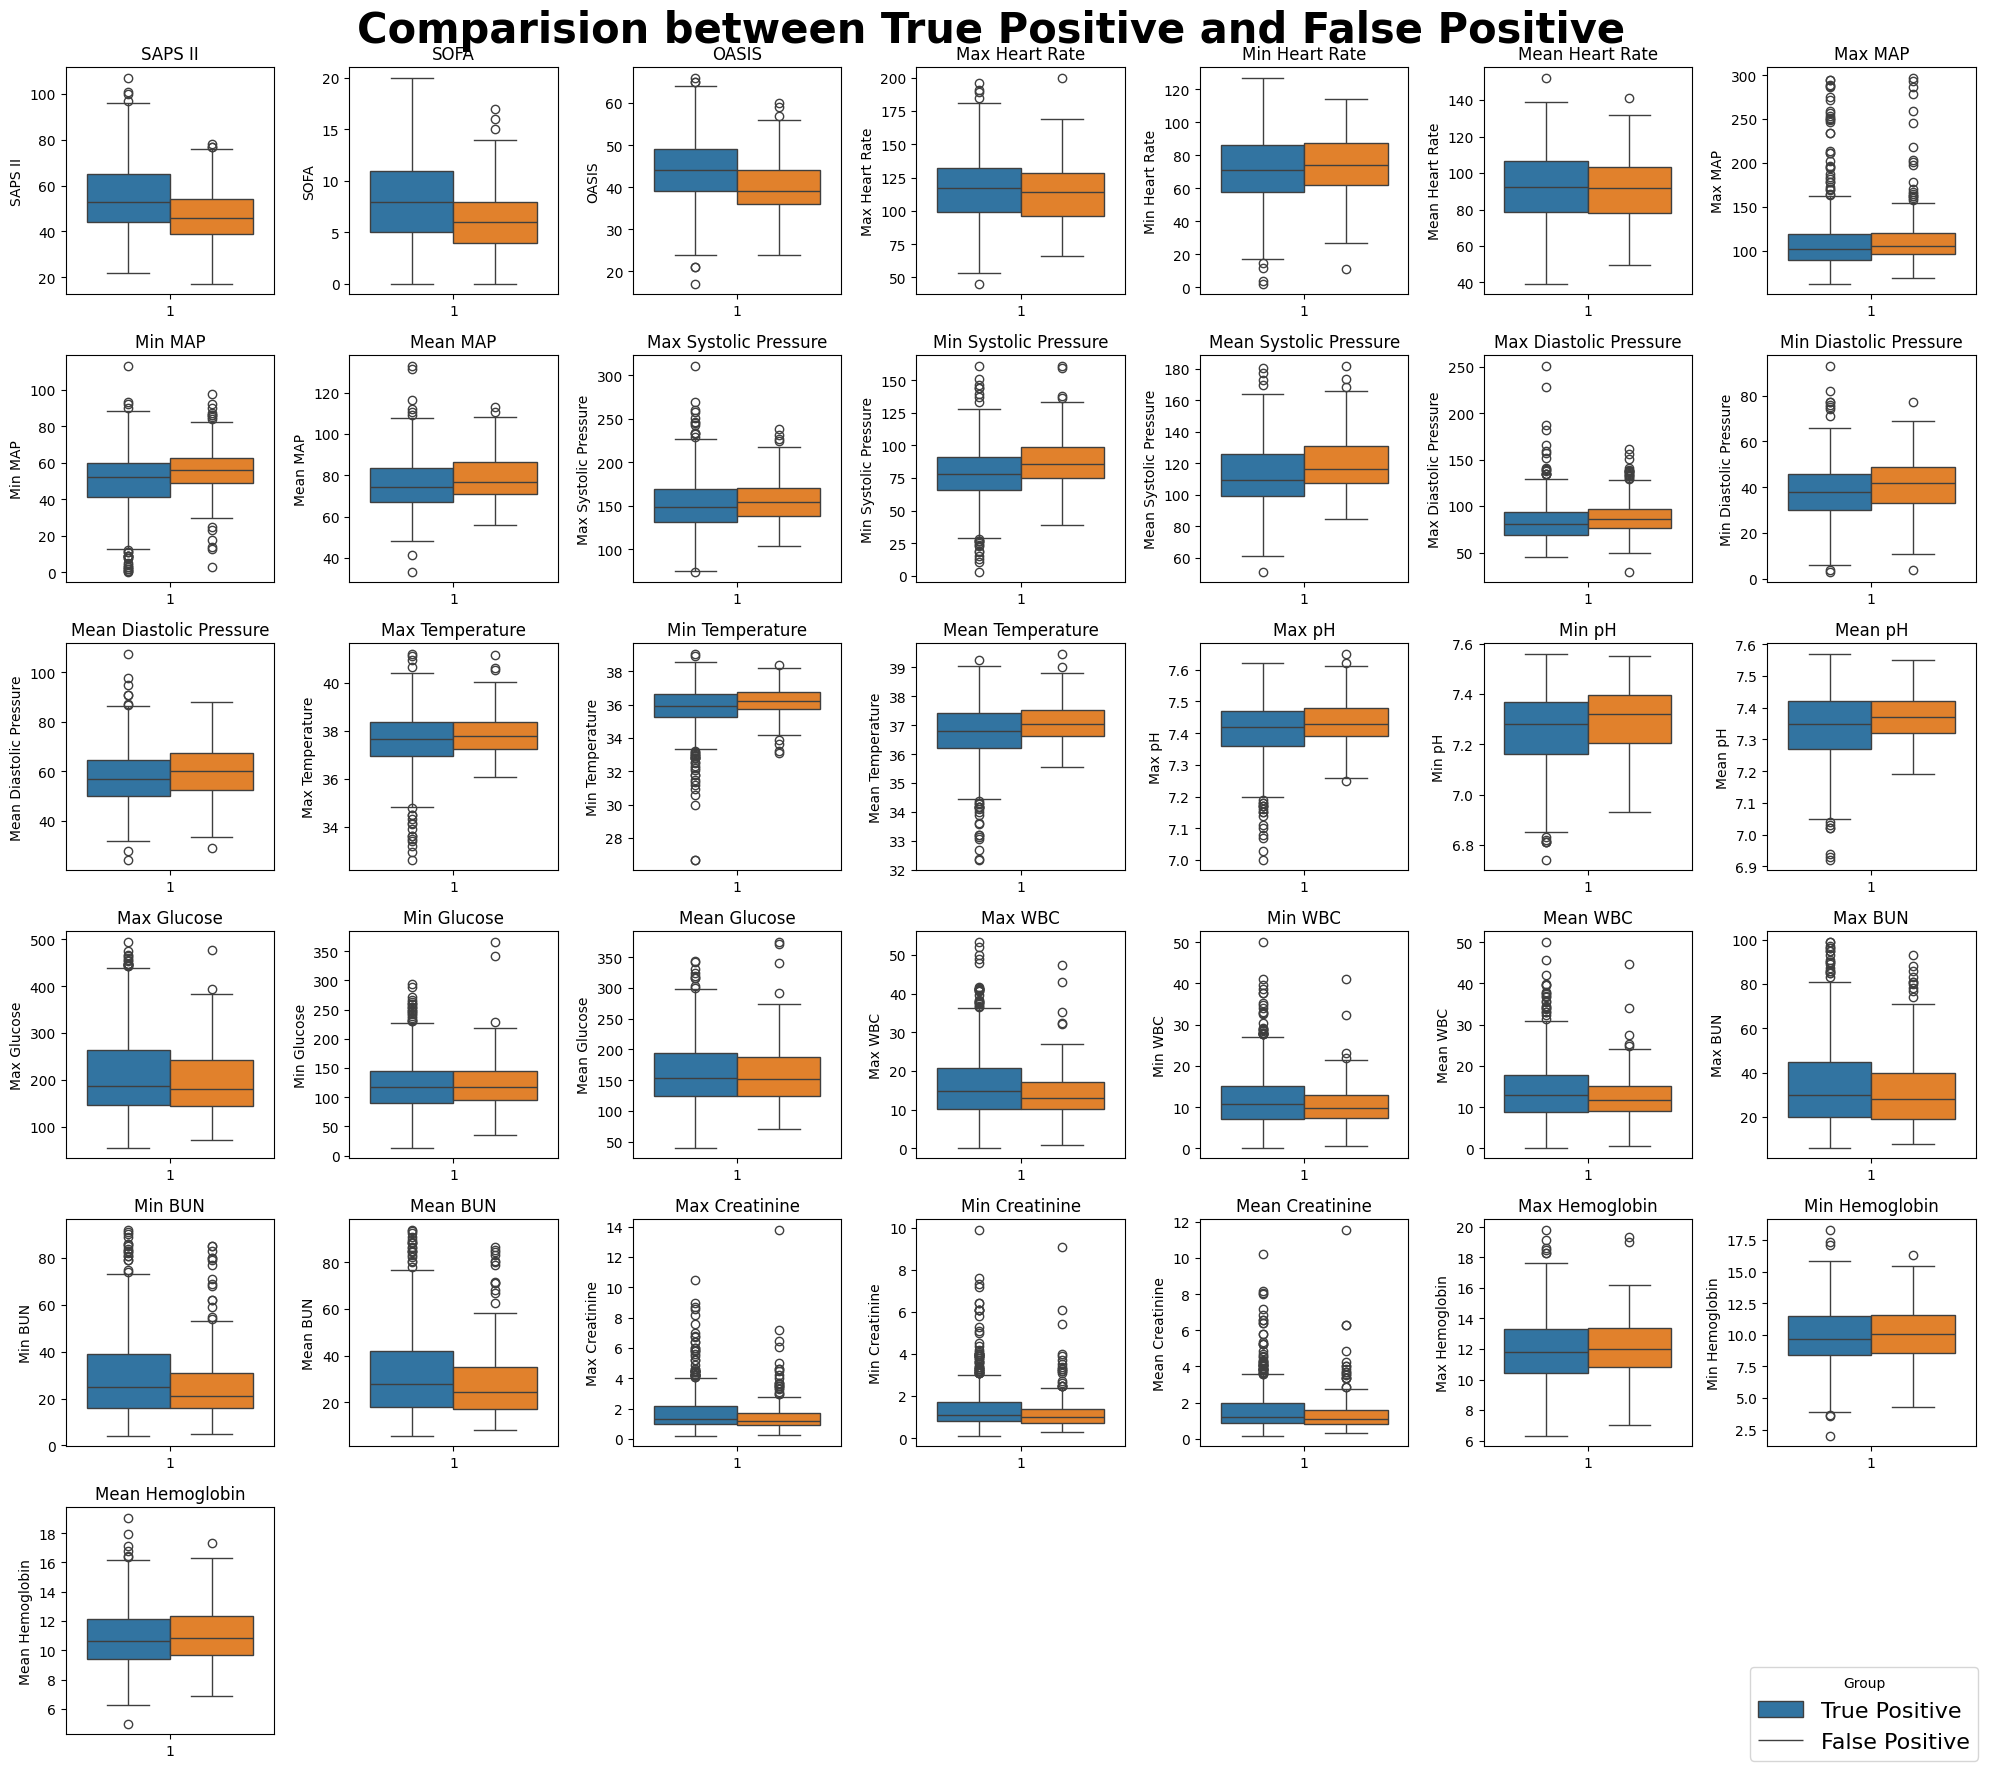

In [ ]:
df_concat = pd.concat([df_true_pos, df_false_pos], keys=['True Positive', 'False Positive'], names=['Group'])

# Define the box_plot function
def box_plot(var, ax):
    sns.boxplot(x='Predicted', y=var, hue='Group', data=df_concat.reset_index(), ax=ax)
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel(var)
    ax.legend().remove()

# List of continuous variables
continuous_var = ["SAPS II", "SOFA", "OASIS","Max Heart Rate", "Min Heart Rate", "Mean Heart Rate", "Max MAP", "Min MAP", "Mean MAP", "Max Systolic Pressure", "Min Systolic Pressure", "Mean Systolic Pressure", "Max Diastolic Pressure", "Min Diastolic Pressure", "Mean Diastolic Pressure", "Max Temperature", "Min Temperature", "Mean Temperature", "Max pH", "Min pH", "Mean pH", "Max Glucose", "Min Glucose", "Mean Glucose", "Max WBC", "Min WBC", "Mean WBC", "Max BUN", "Min BUN", "Mean BUN", "Max Creatinine", "Min Creatinine", "Mean Creatinine", "Max Hemoglobin", "Min Hemoglobin", "Mean Hemoglobin"]

# Calculate number of rows needed
num_rows = math.ceil(len(continuous_var) / 7)

# Create subplots
fig, axes = plt.subplots(num_rows, 7, figsize=(20, num_rows*3))
axes = axes.flatten()

# Iterate over continuous variables and plot in subplots
for i, var in enumerate(continuous_var):
    if i < len(axes):
        box_plot(var, axes[i])
    else:
        break

# Hide any remaining empty subplots
for ax in axes[len(continuous_var):]:
    ax.axis('off')

# Add a general legend
fig.legend(labels=['True Positive', 'False Positive'], loc='lower right', fontsize=16, title='Group')

# Add a general title for the entire scatter plot
plt.suptitle('Comparision between True Positive and False Positive', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.show()

# Shapiro Test for normality

In [ ]:
continous_var = ["Age","SAPS II", "SOFA", "OASIS","Max Heart Rate", "Min Heart Rate", "Mean Heart Rate", "Max MAP", "Min MAP", "Mean MAP", "Max Systolic Pressure", "Min Systolic Pressure", "Mean Systolic Pressure", "Max Diastolic Pressure", "Min Diastolic Pressure",
                 "Mean Diastolic Pressure", "Max Temperature", "Min Temperature", "Mean Temperature", "Max pH", "Min pH", "Mean pH", "Max Glucose", "Min Glucose", "Mean Glucose", "Max WBC", "Min WBC", "Mean WBC", "Max BUN", "Min BUN", "Mean BUN", "Max Creatinine", "Min Creatinine", "Mean Creatinine", "Max Hemoglobin", "Min Hemoglobin", "Mean Hemoglobin"]

for col in continous_var:
  statistic, p_value = shapiro(df_full[col])
  print("Shapiro-Wilk Test:")
  print("Test Statistic:", statistic)
  print("P-value:","{:.5f}".format(p_value))
  print()

Shapiro-Wilk Test:
Test Statistic: 0.9437509775161743
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.9738647937774658
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.9337024688720703
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.9931221008300781
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.9711896777153015
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.9920005202293396
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.986447811126709
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.7188106775283813
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.9546191096305847
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.970227062702179
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.9645466804504395
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.9810664653778076
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.9779439568519592
P-value: 0.00000

Shapiro-Wilk Test:
Test Statistic: 0.8706220984458923
P-value: 0.0

# Density Plots of True Positive and False Positive

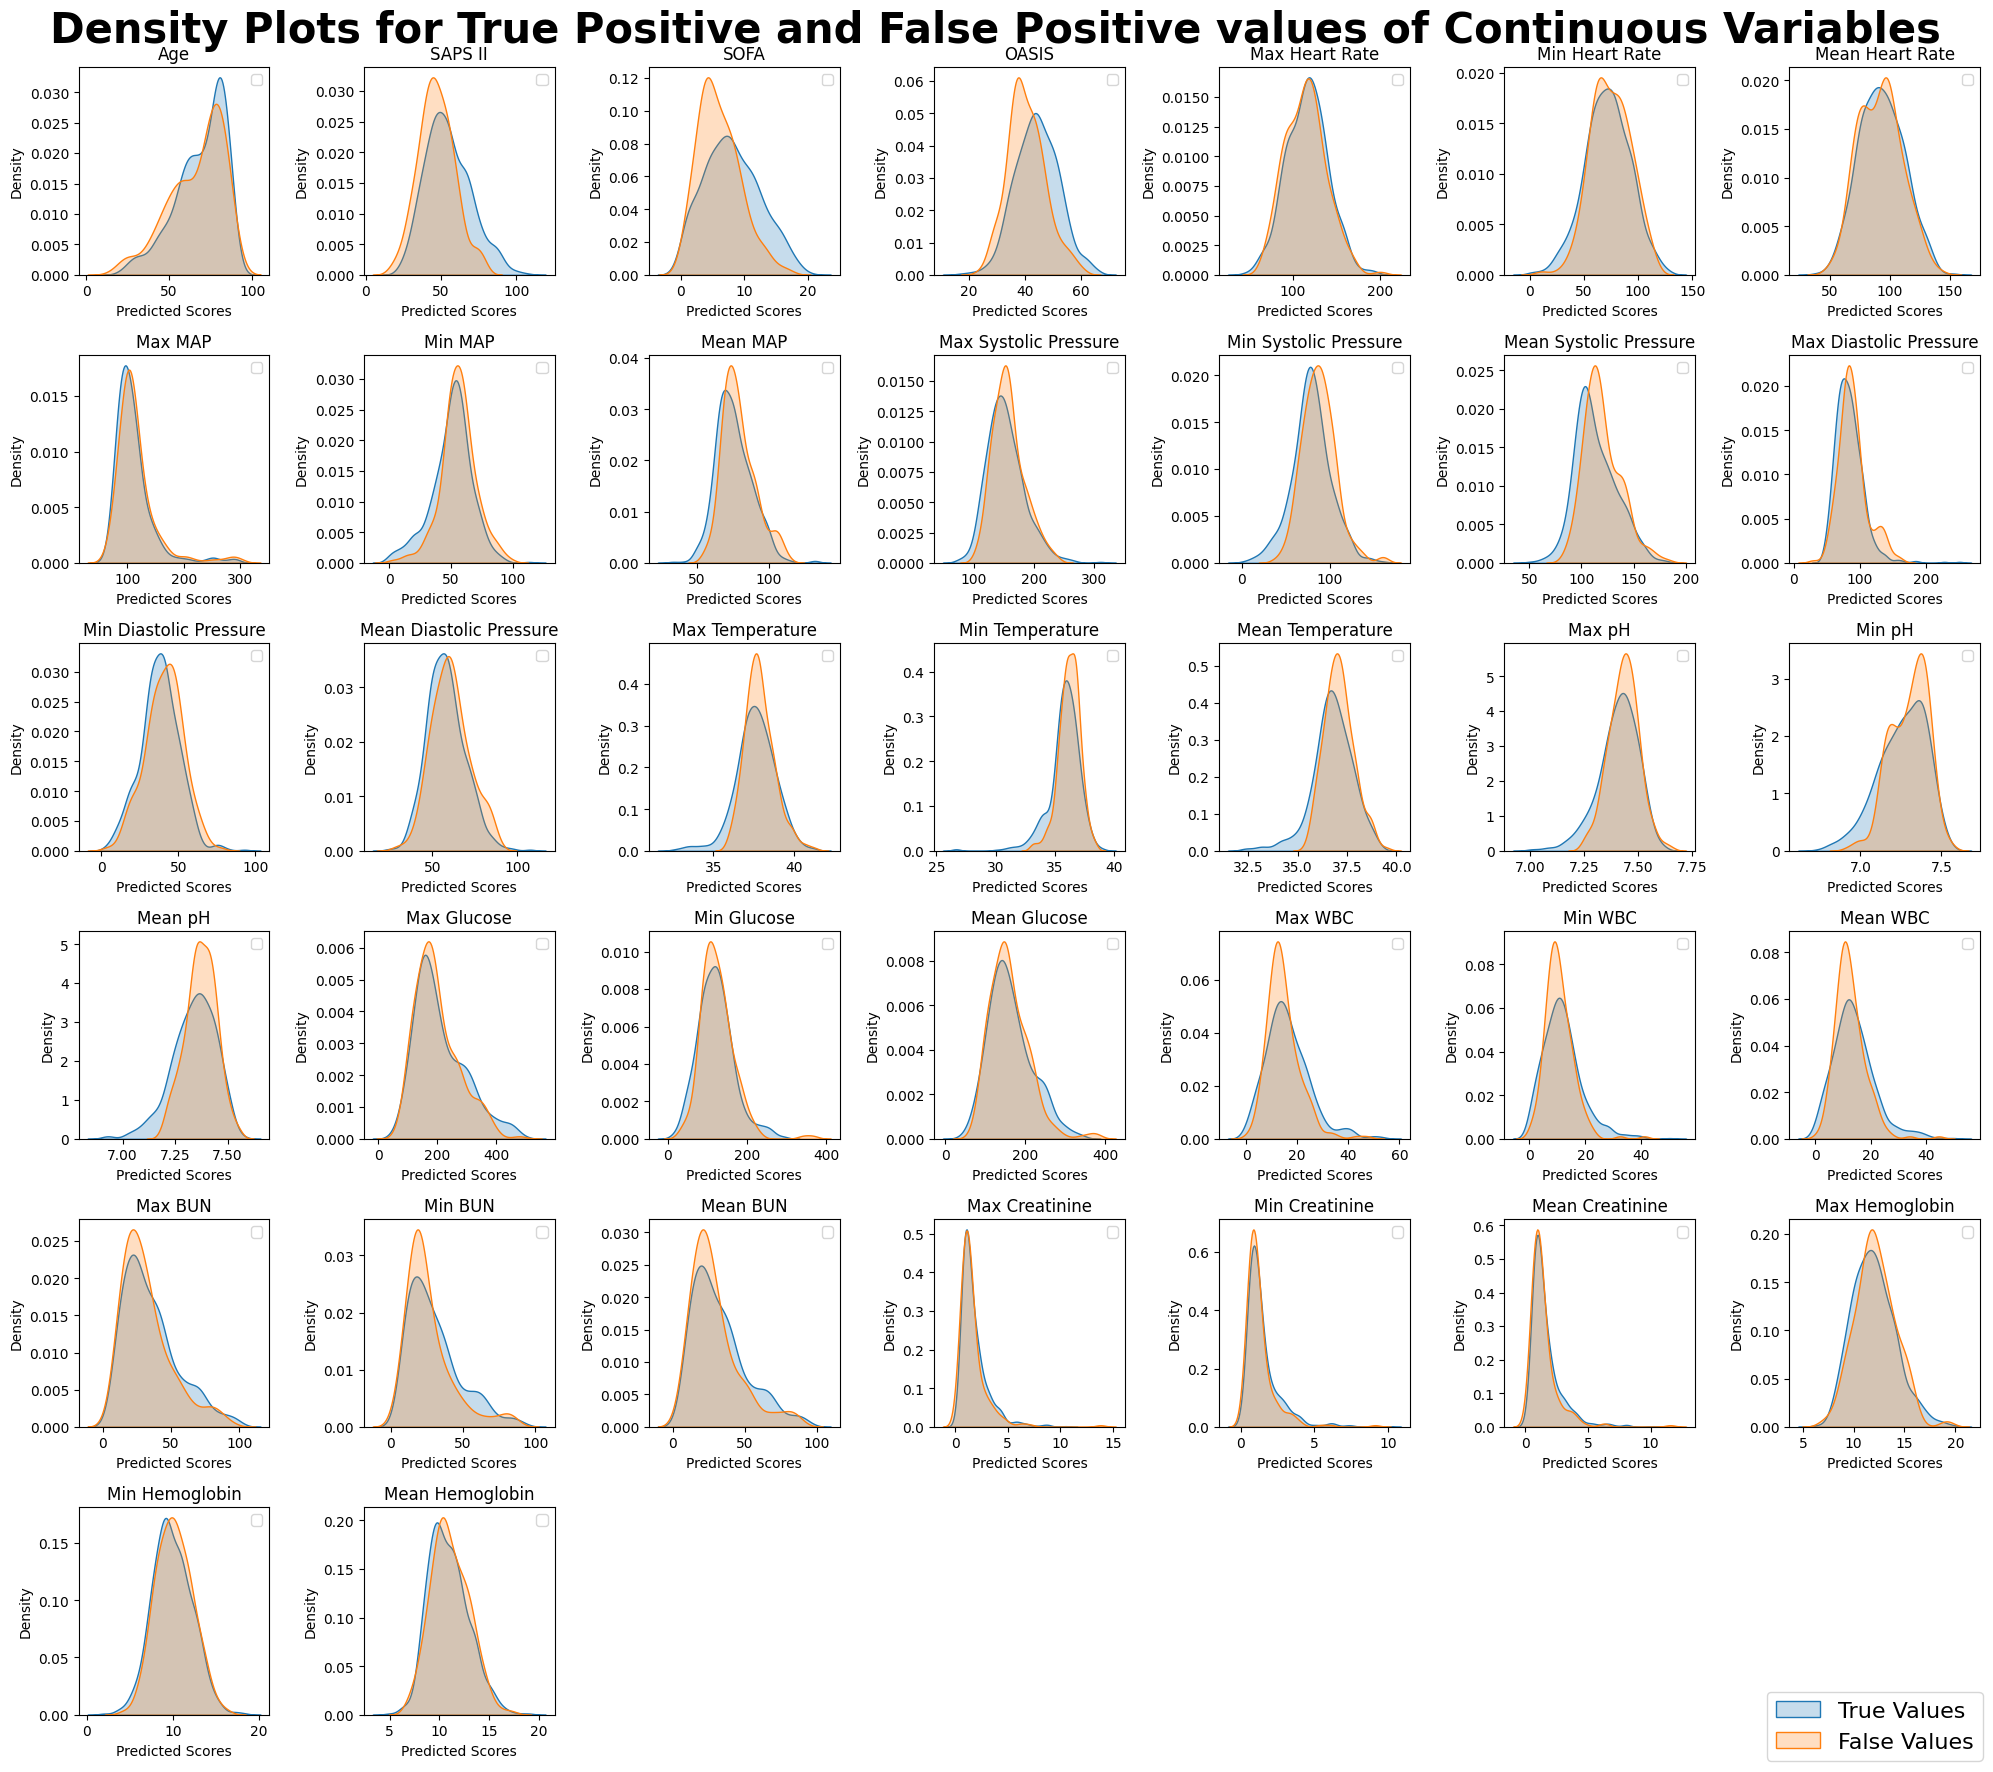

In [ ]:
def density_plot(x, df_true_pos, df_false_pos, ax):
    sns.kdeplot(df_true_pos[x], fill=True, ax=ax)
    sns.kdeplot(df_false_pos[x], fill=True, ax=ax)

    # Add labels and legend
    ax.set_title(f'{x}')
    ax.set_xlabel('Predicted Scores')
    ax.set_ylabel('Density')
    ax.legend()

# Calculate the number of rows needed based on the number of continuous variables
num_rows = (len(continous_var) + 7) // 7  # Ceiling division

# Create a figure and axis array with the specified number of rows and 6 columns
fig, axes = plt.subplots(num_rows, 7, figsize=(20, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the continuous variables and corresponding axes
for x, ax in zip(continous_var, axes):
    # If there are no more variables to plot, hide the axis
    if x is None:
        ax.axis('off')
        continue

    density_plot(x, df_true_pos, df_false_pos, ax)

# Hide any remaining empty subplots
for ax in axes[len(continous_var):]:
    ax.axis('off')

# Add a general legend for the entire scatter plot
plt.figlegend(labels=['True Values', 'False Values'], loc='lower right', fontsize=16)

# Add a general title for the entire scatter plot
plt.suptitle('Density Plots for True Positive and False Positive values of Continuous Variables', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.show()

# T-test for True Positive vs False Positive

P-value of Age: 0.05422
P-value of SAPS II: 0.00000
P-value of SOFA: 0.00000
P-value of OASIS: 0.00000
P-value of Max Heart Rate: 0.32121
P-value of Min Heart Rate: 0.08374
P-value of Mean Heart Rate: 0.37215
P-value of Max MAP: 0.08868
P-value of Min MAP: 0.00004
P-value of Mean MAP: 0.00055
P-value of Max Systolic Pressure: 0.06189
P-value of Min Systolic Pressure: 0.00000
P-value of Mean Systolic Pressure: 0.00007
P-value of Max Diastolic Pressure: 0.00336
P-value of Min Diastolic Pressure: 0.00442
P-value of Mean Diastolic Pressure: 0.00366
P-value of Max Temperature: 0.00900
P-value of Min Temperature: 0.00003
P-value of Mean Temperature: 0.00003
P-value of Max pH: 0.00043
P-value of Min pH: 0.00029
P-value of Mean pH: 0.00004
P-value of Max Glucose: 0.08275
P-value of Min Glucose: 0.27195
P-value of Mean Glucose: 0.51764
P-value of Max WBC: 0.01355
P-value of Min WBC: 0.02549
P-value of Mean WBC: 0.02050
P-value of Max BUN: 0.05387
P-value of Min BUN: 0.00996
P-value of Mean BUN:

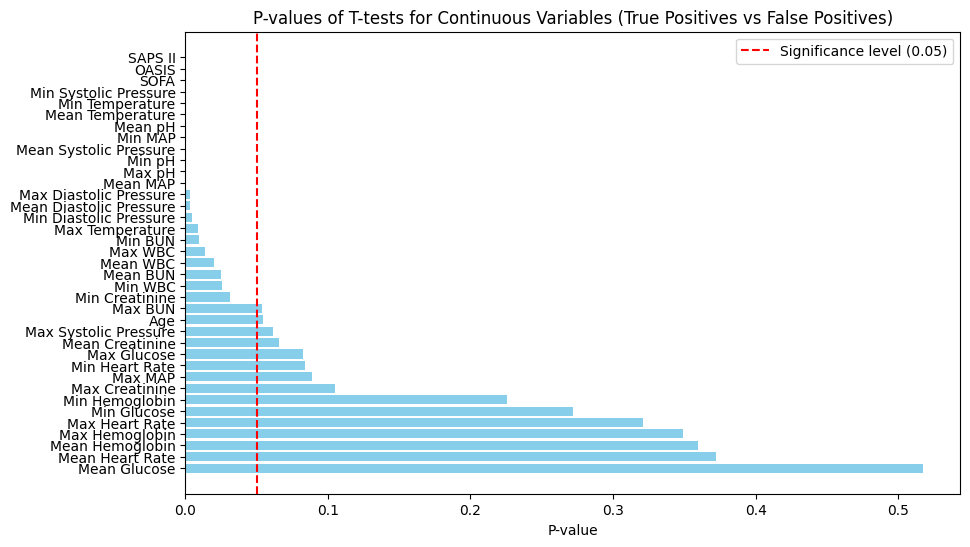

In [ ]:
# Extracting only continuous variables
df_continuous_var = ["Age","SAPS II", "SOFA", "OASIS","Max Heart Rate", "Min Heart Rate", "Mean Heart Rate", "Max MAP", "Min MAP", "Mean MAP", "Max Systolic Pressure", "Min Systolic Pressure", "Mean Systolic Pressure", "Max Diastolic Pressure", "Min Diastolic Pressure","Mean Diastolic Pressure", "Max Temperature", "Min Temperature", "Mean Temperature", "Max pH", "Min pH", "Mean pH", "Max Glucose", "Min Glucose", "Mean Glucose", "Max WBC", "Min WBC", "Mean WBC", "Max BUN", "Min BUN", "Mean BUN", "Max Creatinine", "Min Creatinine", "Mean Creatinine", "Max Hemoglobin", "Min Hemoglobin", "Mean Hemoglobin"]

variables = []
p_values = []

for column in df_continuous_var:
    true_pos = df_true_pos[column]
    false_pos = df_false_pos[column]
    t_statistic, p_value = ttest_ind(true_pos, false_pos)
    print(f"P-value of {column}: {p_value:.5f}")
    variables.append(column)
    p_values.append(p_value)

# Sort variables and p_values based on p_values
sorted_variables, sorted_p_values = zip(*sorted(zip(variables, p_values), key=lambda x: x[1], reverse=True))

# Plotting the p-values in a graph
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(sorted_variables)), sorted_p_values, color='skyblue')
plt.yticks(np.arange(len(sorted_variables)), sorted_variables)
plt.xlabel('P-value')
plt.title('P-values of T-tests for Continuous Variables (True Positives vs False Positives)')
plt.axvline(0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.legend()
plt.show()

# Mann Whitney U Test

P-value of Age: 0.07877
P-value of SAPS II: 0.00000
P-value of SOFA: 0.00000
P-value of OASIS: 0.00000
P-value of Max Heart Rate: 0.23041
P-value of Min Heart Rate: 0.10210
P-value of Mean Heart Rate: 0.37054
P-value of Max MAP: 0.02056
P-value of Min MAP: 0.00010
P-value of Mean MAP: 0.00029
P-value of Max Systolic Pressure: 0.01719
P-value of Min Systolic Pressure: 0.00000
P-value of Mean Systolic Pressure: 0.00001
P-value of Max Diastolic Pressure: 0.00107
P-value of Min Diastolic Pressure: 0.00196
P-value of Mean Diastolic Pressure: 0.00271
P-value of Max Temperature: 0.02914
P-value of Min Temperature: 0.00003
P-value of Mean Temperature: 0.00014
P-value of Max pH: 0.00409
P-value of Min pH: 0.00161
P-value of Mean pH: 0.00034
P-value of Max Glucose: 0.24350
P-value of Min Glucose: 0.27919
P-value of Mean Glucose: 0.60837
P-value of Max WBC: 0.01624
P-value of Min WBC: 0.06511
P-value of Mean WBC: 0.03238
P-value of Max BUN: 0.06239
P-value of Min BUN: 0.00699
P-value of Mean BUN:

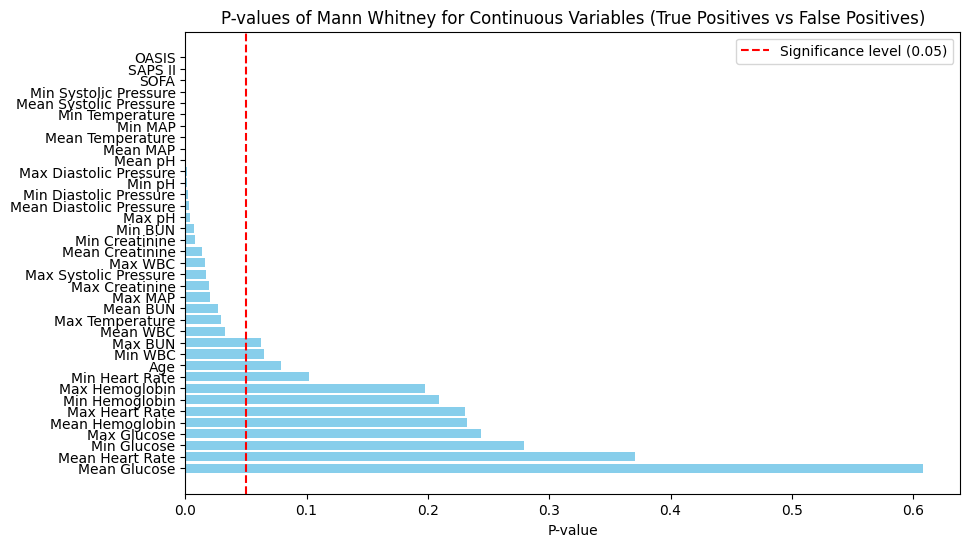

In [ ]:
variables = []
p_values = []
df_continuous_var = ["Age","SAPS II", "SOFA", "OASIS","Max Heart Rate", "Min Heart Rate", "Mean Heart Rate", "Max MAP", "Min MAP", "Mean MAP", "Max Systolic Pressure", "Min Systolic Pressure", "Mean Systolic Pressure", "Max Diastolic Pressure", "Min Diastolic Pressure","Mean Diastolic Pressure", "Max Temperature", "Min Temperature", "Mean Temperature", "Max pH", "Min pH", "Mean pH", "Max Glucose", "Min Glucose", "Mean Glucose", "Max WBC", "Min WBC", "Mean WBC", "Max BUN", "Min BUN", "Mean BUN", "Max Creatinine", "Min Creatinine", "Mean Creatinine", "Max Hemoglobin", "Min Hemoglobin", "Mean Hemoglobin"]

for col in df_continuous_var:
    true_pos = df_true_pos[col]
    false_pos = df_false_pos[col]
    stat, p_value = mannwhitneyu(true_pos, false_pos)
    print(f"P-value of {col}:", "{:.5f}".format(p_value))
    variables.append(col)
    p_values.append(p_value)

sorted_variables, sorted_p_values = zip(*sorted(zip(variables, p_values), key=lambda x: x[1], reverse=True))

# Plot the p-values
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(sorted_variables)), sorted_p_values, color='skyblue')
plt.yticks(np.arange(len(sorted_variables)), sorted_variables)
plt.xlabel('P-value')
plt.title('P-values of Mann Whitney for Continuous Variables (True Positives vs False Positives)')
plt.axvline(0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.legend()
plt.show()

# Box Plots True Negative vs False Negative

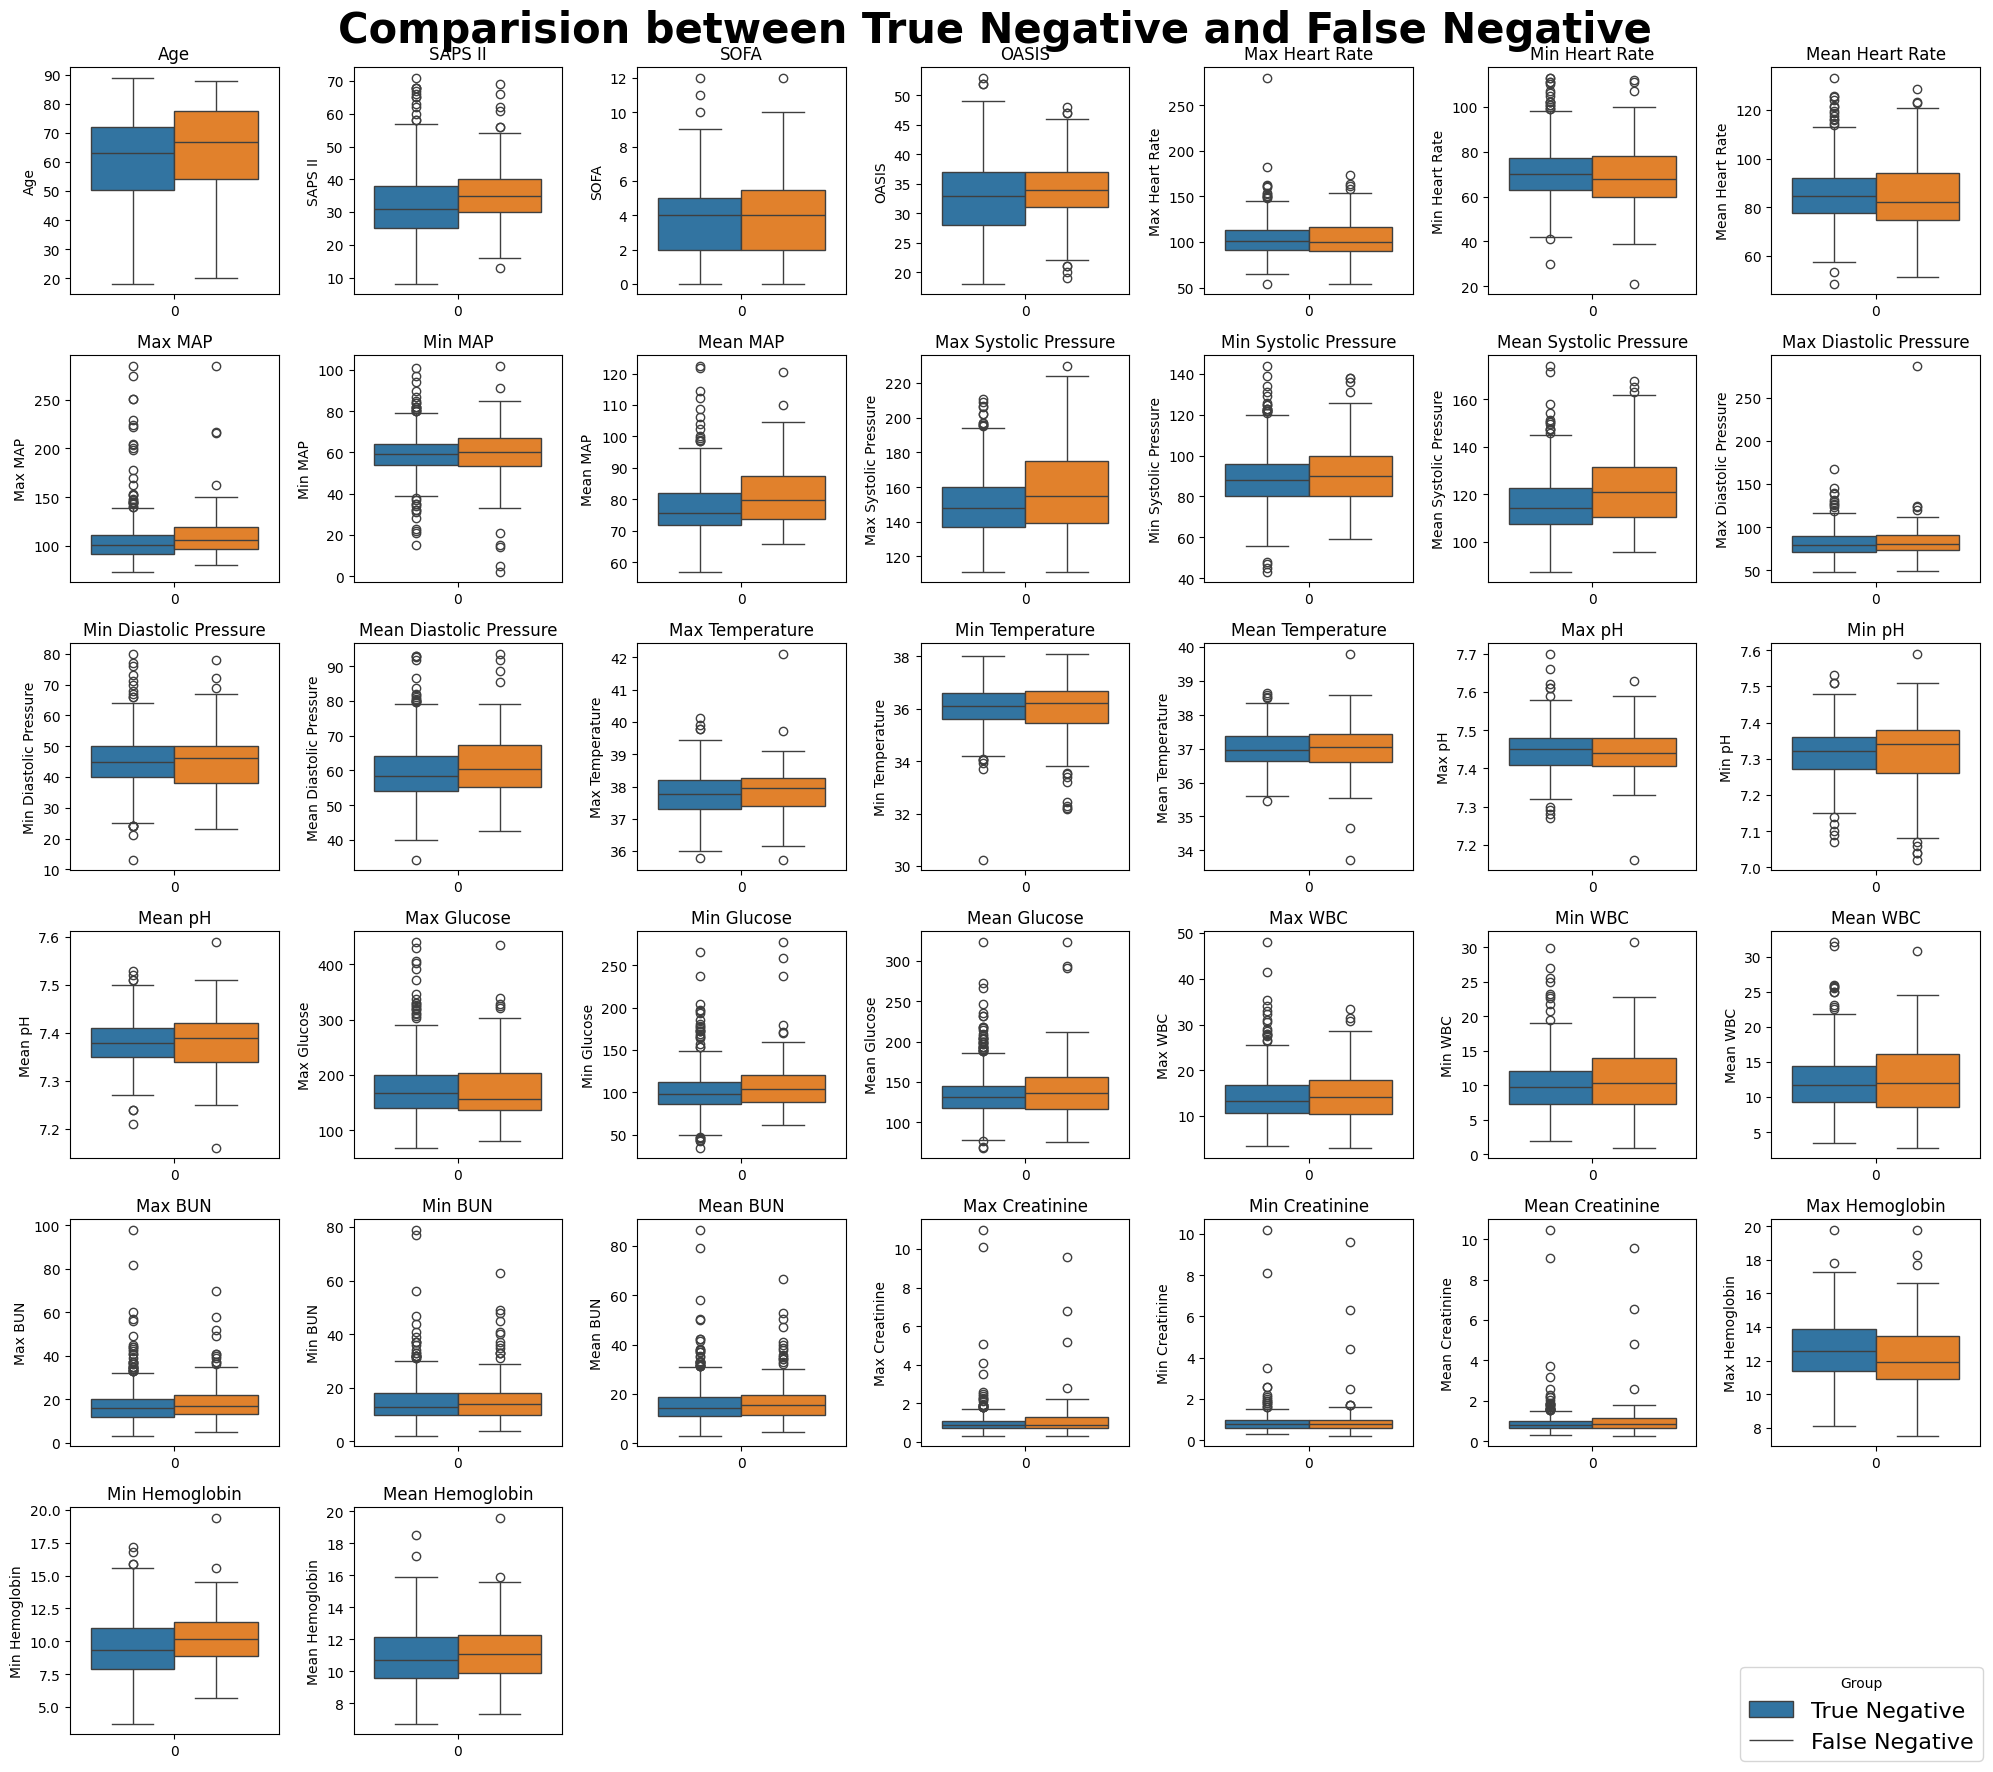

In [ ]:
df_concat = pd.concat([df_true_neg, df_false_neg], keys=['True Negative', 'False Negative'], names=['Group'])

# Define the box_plot function
def box_plot(var, ax):
    sns.boxplot(x='Predicted', y=var, hue='Group', data=df_concat.reset_index(), ax=ax)
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel(var)
    ax.legend().remove()

# List of continuous variables
continuous_var = ["Age","SAPS II", "SOFA", "OASIS","Max Heart Rate", "Min Heart Rate", "Mean Heart Rate", "Max MAP", "Min MAP", "Mean MAP", "Max Systolic Pressure", "Min Systolic Pressure", "Mean Systolic Pressure", "Max Diastolic Pressure", "Min Diastolic Pressure", "Mean Diastolic Pressure", "Max Temperature", "Min Temperature", "Mean Temperature", "Max pH", "Min pH", "Mean pH", "Max Glucose", "Min Glucose", "Mean Glucose", "Max WBC", "Min WBC", "Mean WBC", "Max BUN", "Min BUN", "Mean BUN", "Max Creatinine", "Min Creatinine", "Mean Creatinine", "Max Hemoglobin", "Min Hemoglobin", "Mean Hemoglobin"]

# Calculate number of rows needed
num_rows = math.ceil(len(continuous_var) / 7)

# Create subplots
fig, axes = plt.subplots(num_rows, 7, figsize=(20, num_rows*3))
axes = axes.flatten()

# Iterate over continuous variables and plot in subplots
for i, var in enumerate(continuous_var):
    if i < len(axes):
        box_plot(var, axes[i])
    else:
        break

# Hide any remaining empty subplots
for ax in axes[len(continuous_var):]:
    ax.axis('off')

# Add a general legend
fig.legend(labels=['True Negative', 'False Negative'], loc='lower right', fontsize=16, title='Group')

# Add a general title for the entire scatter plot
plt.suptitle('Comparision between True Negative and False Negative', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.show()

# Density Plots of True Negative and False Negative

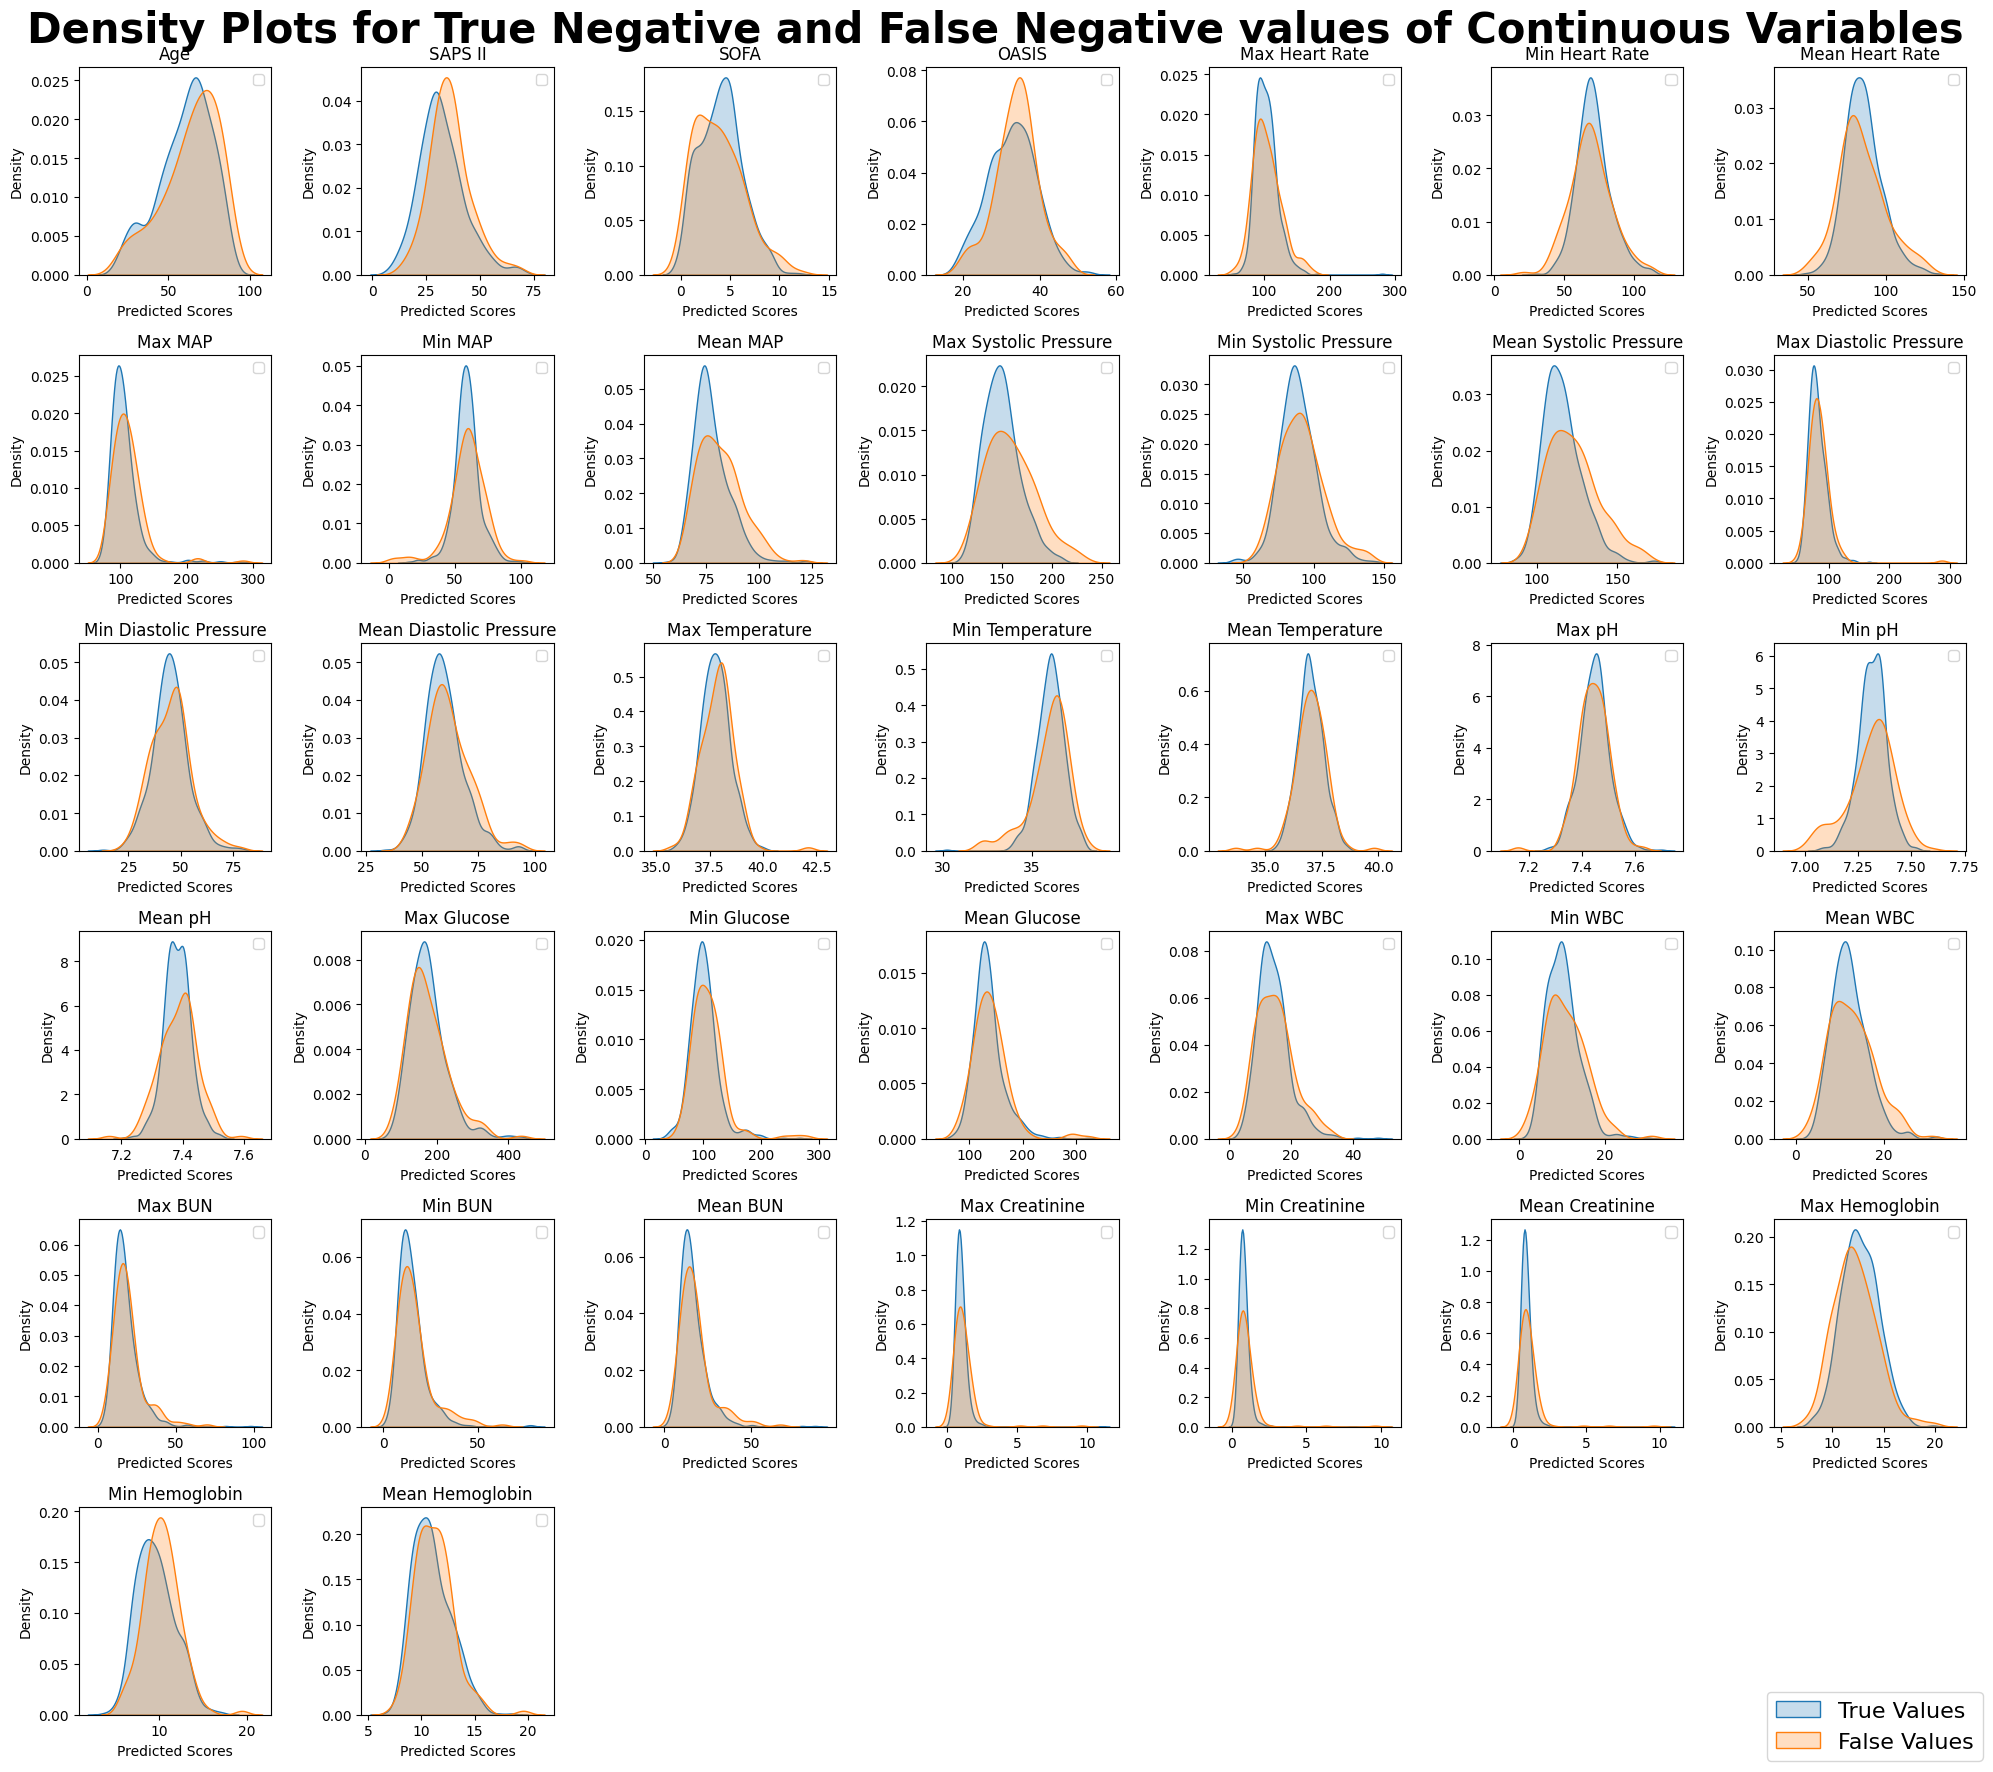

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def density_plot(x, df_true_neg, df_false_neg, ax):
    sns.kdeplot(df_true_neg[x], fill=True, ax=ax)
    sns.kdeplot(df_false_neg[x], fill=True, ax=ax)

    # Add labels and legend
    ax.set_title(f'{x}')
    ax.set_xlabel('Predicted Scores')
    ax.set_ylabel('Density')
    ax.legend()

# Calculate the number of rows needed based on the number of continuous variables
num_rows = (len(continous_var) + 7) // 7  # Ceiling division

# Create a figure and axis array with the specified number of rows and 8 columns
fig, axes = plt.subplots(num_rows, 7, figsize=(20, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the continuous variables and corresponding axes
for x, ax in zip(continous_var, axes):
    # If there are no more variables to plot, hide the axis
    if x is None:
        ax.axis('off')
        continue

    density_plot(x, df_true_neg, df_false_neg, ax)

# Hide any remaining empty subplots
for ax in axes[len(continous_var):]:
    ax.axis('off')

# Add a general legend for the entire scatter plot
plt.figlegend(labels=['True Values', 'False Values'], loc='lower right', fontsize=16)

# Add a general title for the entire scatter plot
plt.suptitle('Density Plots for True Negative and False Negative values of Continuous Variables', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.show()

# T-test for True Negative vs False Negative

P-value of Age: 0.03328
P-value of SAPS II: 0.00019
P-value of SOFA: 0.32780
P-value of OASIS: 0.04823
P-value of Max Heart Rate: 0.56985
P-value of Min Heart Rate: 0.14249
P-value of Mean Heart Rate: 0.46821
P-value of Max MAP: 0.02506
P-value of Min MAP: 0.87321
P-value of Mean MAP: 0.00000
P-value of Max Systolic Pressure: 0.00000
P-value of Min Systolic Pressure: 0.06807
P-value of Mean Systolic Pressure: 0.00000
P-value of Max Diastolic Pressure: 0.04111
P-value of Min Diastolic Pressure: 0.65160
P-value of Mean Diastolic Pressure: 0.01598
P-value of Max Temperature: 0.13346
P-value of Min Temperature: 0.34189
P-value of Mean Temperature: 0.82163
P-value of Max pH: 0.49452
P-value of Min pH: 0.48933
P-value of Mean pH: 0.41530
P-value of Max Glucose: 0.90527
P-value of Min Glucose: 0.00262
P-value of Mean Glucose: 0.21587
P-value of Max WBC: 0.32148
P-value of Min WBC: 0.07676
P-value of Mean WBC: 0.15066
P-value of Max BUN: 0.06567
P-value of Min BUN: 0.08726
P-value of Mean BUN:

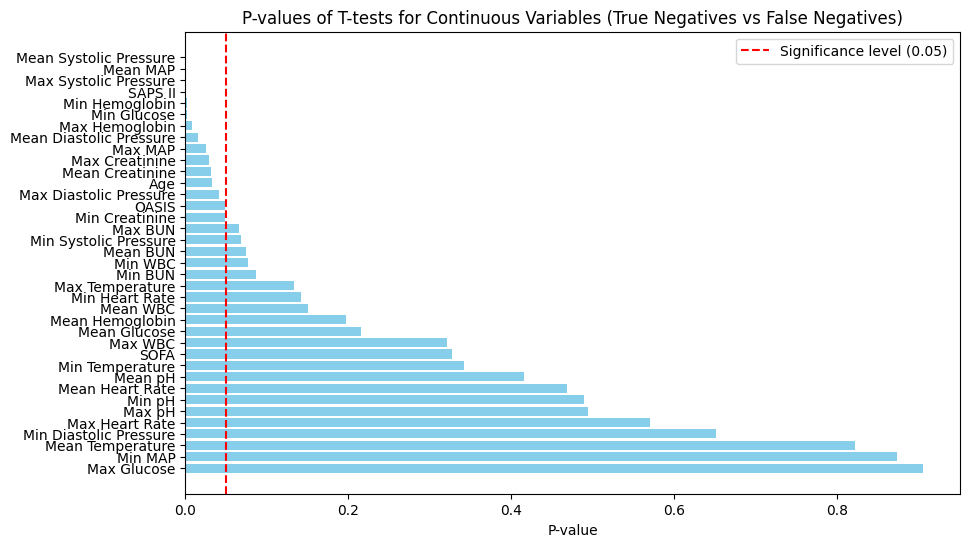

In [ ]:
# Extracting only continuous variables
df_continuous_var = ["Age","SAPS II", "SOFA", "OASIS","Max Heart Rate", "Min Heart Rate", "Mean Heart Rate", "Max MAP", "Min MAP", "Mean MAP", "Max Systolic Pressure", "Min Systolic Pressure", "Mean Systolic Pressure", "Max Diastolic Pressure", "Min Diastolic Pressure","Mean Diastolic Pressure", "Max Temperature", "Min Temperature", "Mean Temperature", "Max pH", "Min pH", "Mean pH", "Max Glucose", "Min Glucose", "Mean Glucose", "Max WBC", "Min WBC", "Mean WBC", "Max BUN", "Min BUN", "Mean BUN", "Max Creatinine", "Min Creatinine", "Mean Creatinine", "Max Hemoglobin", "Min Hemoglobin", "Mean Hemoglobin"]

variables = []
p_values = []

for column in df_continuous_var:
    true_neg = df_true_neg[column]
    false_neg = df_false_neg[column]
    t_statistic, p_value = ttest_ind(true_neg, false_neg)
    print(f"P-value of {column}: {p_value:.5f}")
    variables.append(column)
    p_values.append(p_value)

# Sort variables and p_values based on p_values
sorted_variables, sorted_p_values = zip(*sorted(zip(variables, p_values), key=lambda x: x[1], reverse=True))

# Plotting the p-values in a graph
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(sorted_variables)), sorted_p_values, color='skyblue')
plt.yticks(np.arange(len(sorted_variables)), sorted_variables)
plt.xlabel('P-value')
plt.title('P-values of T-tests for Continuous Variables (True Negatives vs False Negatives)')
plt.axvline(0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.legend()
plt.show()

# Boxplots of True values with False values

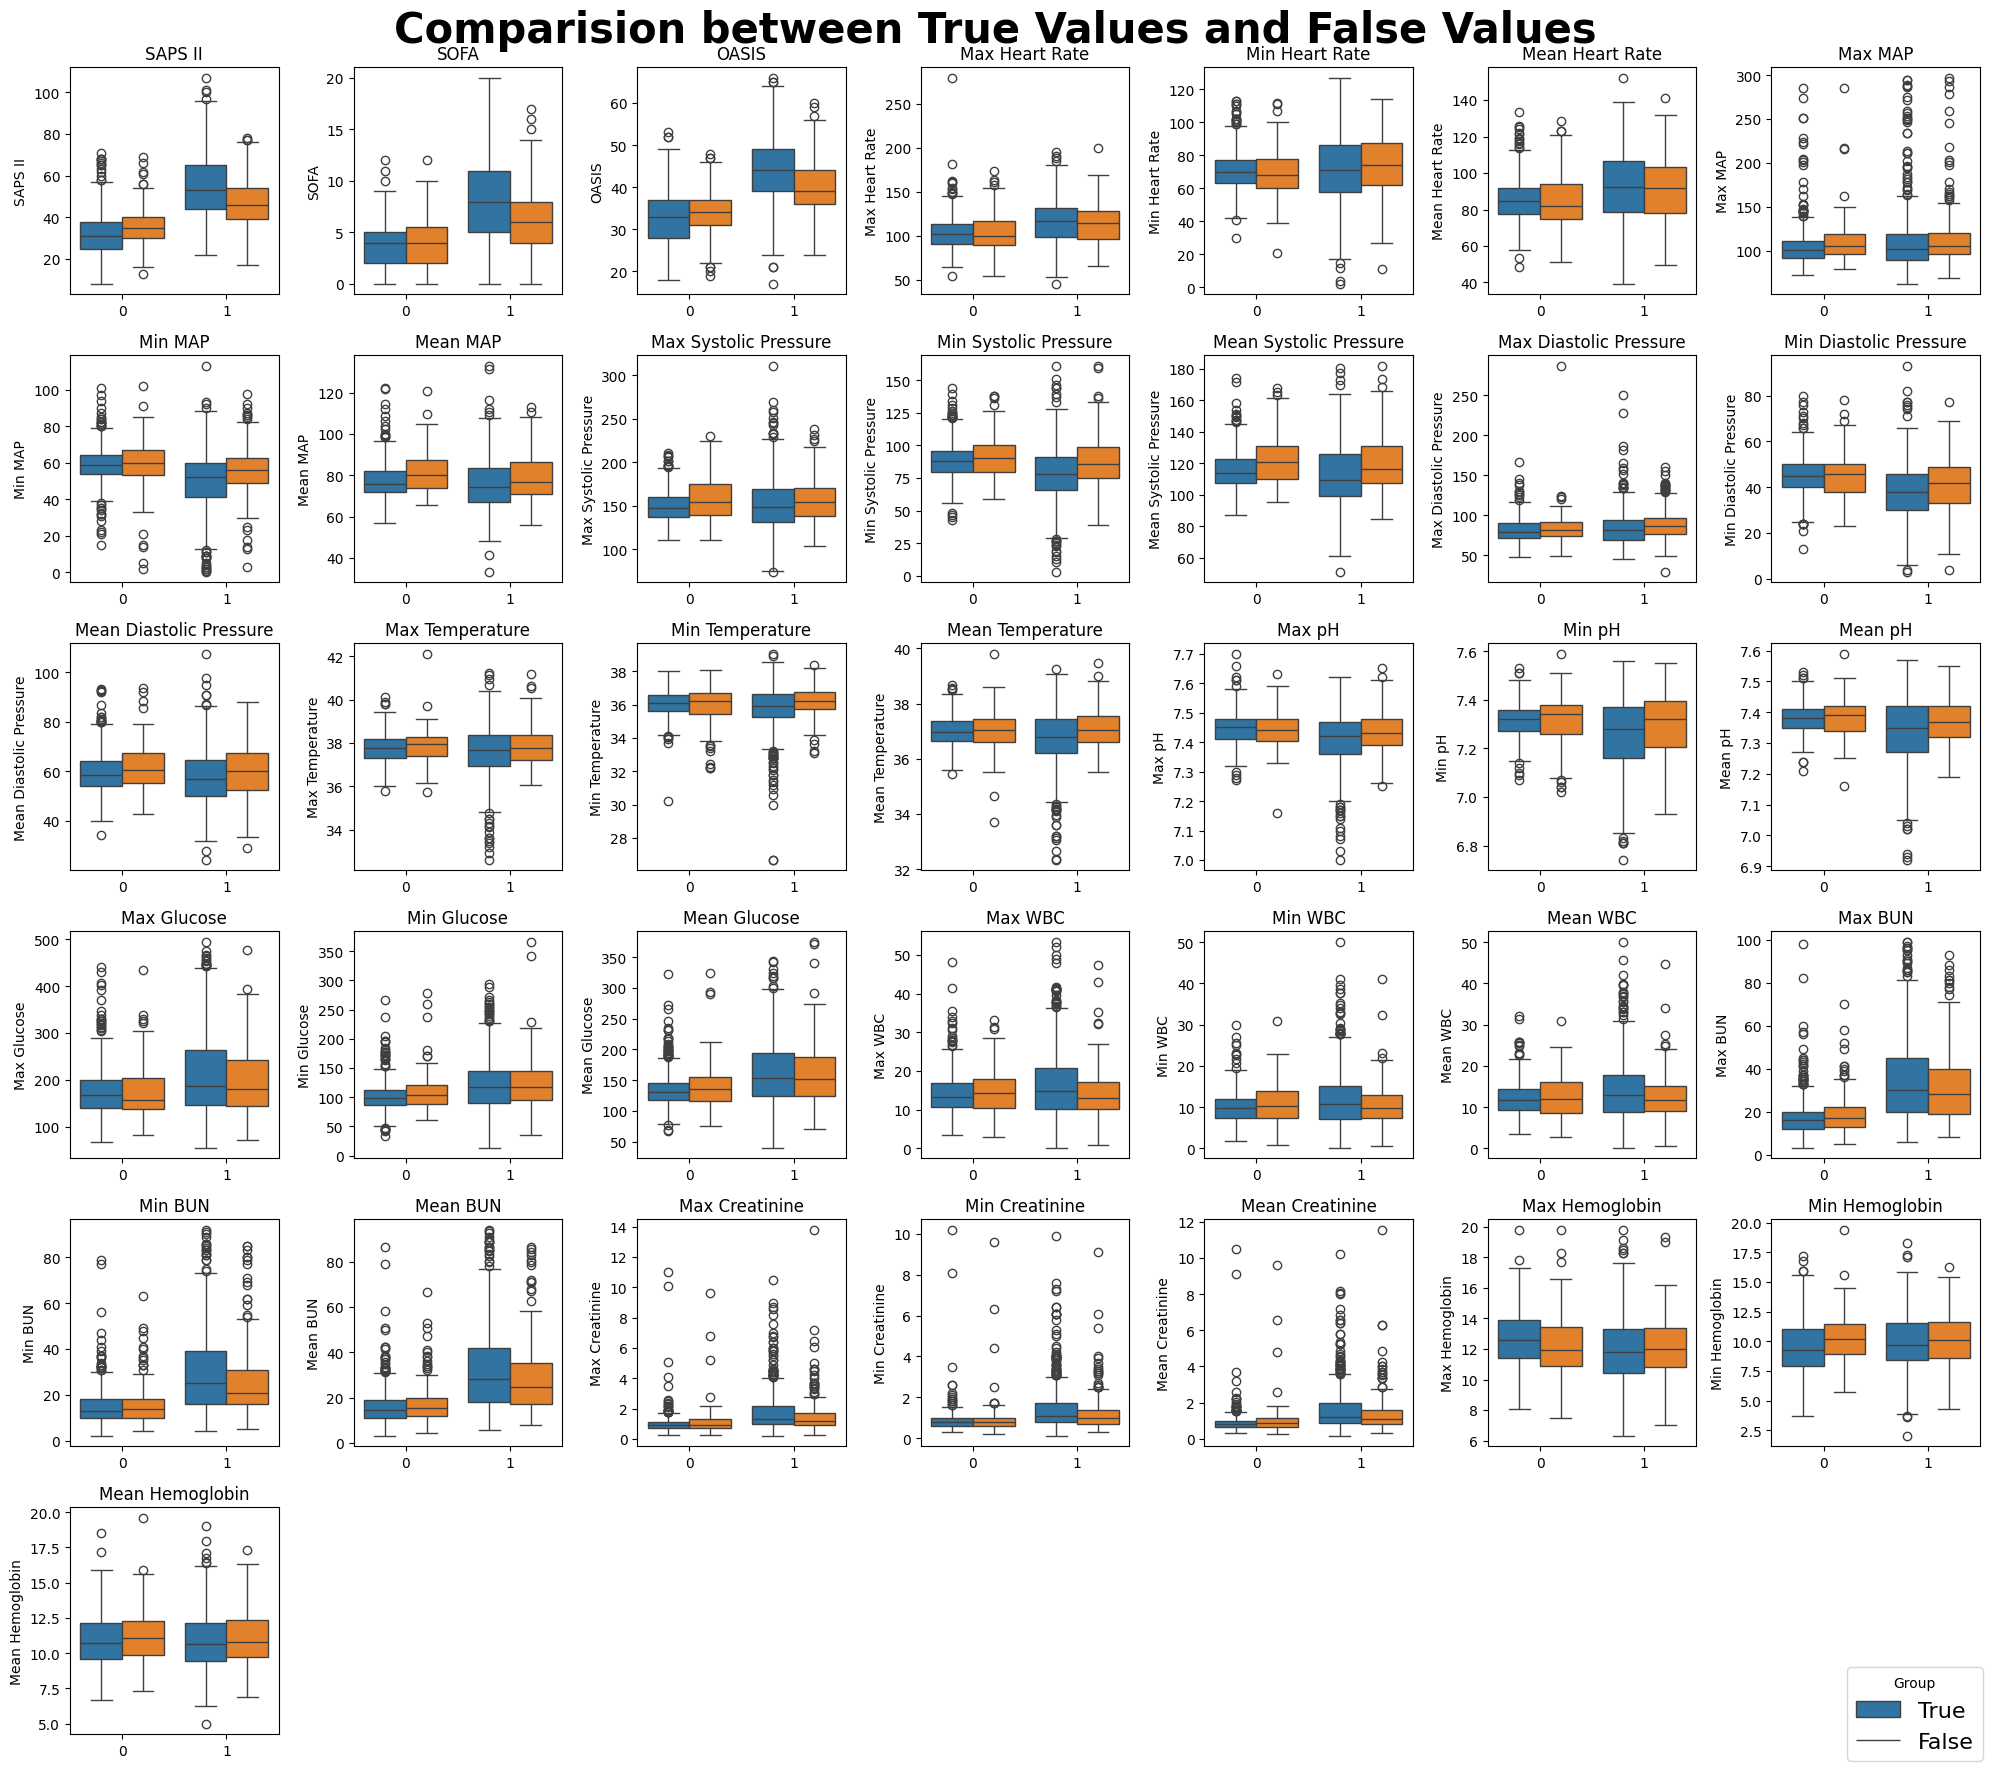

In [ ]:
df_concat = pd.concat([df_true_values, df_false_values], keys=['True', 'False'], names=['Group'])

# Define the box_plot function
def box_plot(var, ax):
    sns.boxplot(x='Predicted', y=var, hue='Group', data=df_concat.reset_index(), ax=ax)
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel(var)
    ax.legend().remove()

# List of continuous variables
continuous_var = ["SAPS II", "SOFA", "OASIS","Max Heart Rate", "Min Heart Rate", "Mean Heart Rate", "Max MAP", "Min MAP", "Mean MAP", "Max Systolic Pressure", "Min Systolic Pressure", "Mean Systolic Pressure", "Max Diastolic Pressure", "Min Diastolic Pressure", "Mean Diastolic Pressure", "Max Temperature", "Min Temperature", "Mean Temperature", "Max pH", "Min pH", "Mean pH", "Max Glucose", "Min Glucose", "Mean Glucose", "Max WBC", "Min WBC", "Mean WBC", "Max BUN", "Min BUN", "Mean BUN", "Max Creatinine", "Min Creatinine", "Mean Creatinine", "Max Hemoglobin", "Min Hemoglobin", "Mean Hemoglobin"]

# Calculate number of rows needed
num_rows = math.ceil(len(continuous_var) / 7)

# Create subplots
fig, axes = plt.subplots(num_rows, 7, figsize=(20, num_rows*3))
axes = axes.flatten()

# Iterate over continuous variables and plot in subplots
for i, var in enumerate(continuous_var):
    if i < len(axes):
        box_plot(var, axes[i])
    else:
        break

# Hide any remaining empty subplots
for ax in axes[len(continuous_var):]:
    ax.axis('off')

# Add a general legend
fig.legend(labels=['True', 'False'], loc='lower right', fontsize=16, title='Group')

# Add a general title for the entire scatter plot
plt.suptitle('Comparision between True Values and False Values', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.show()

# Density Plots of True values and False Values

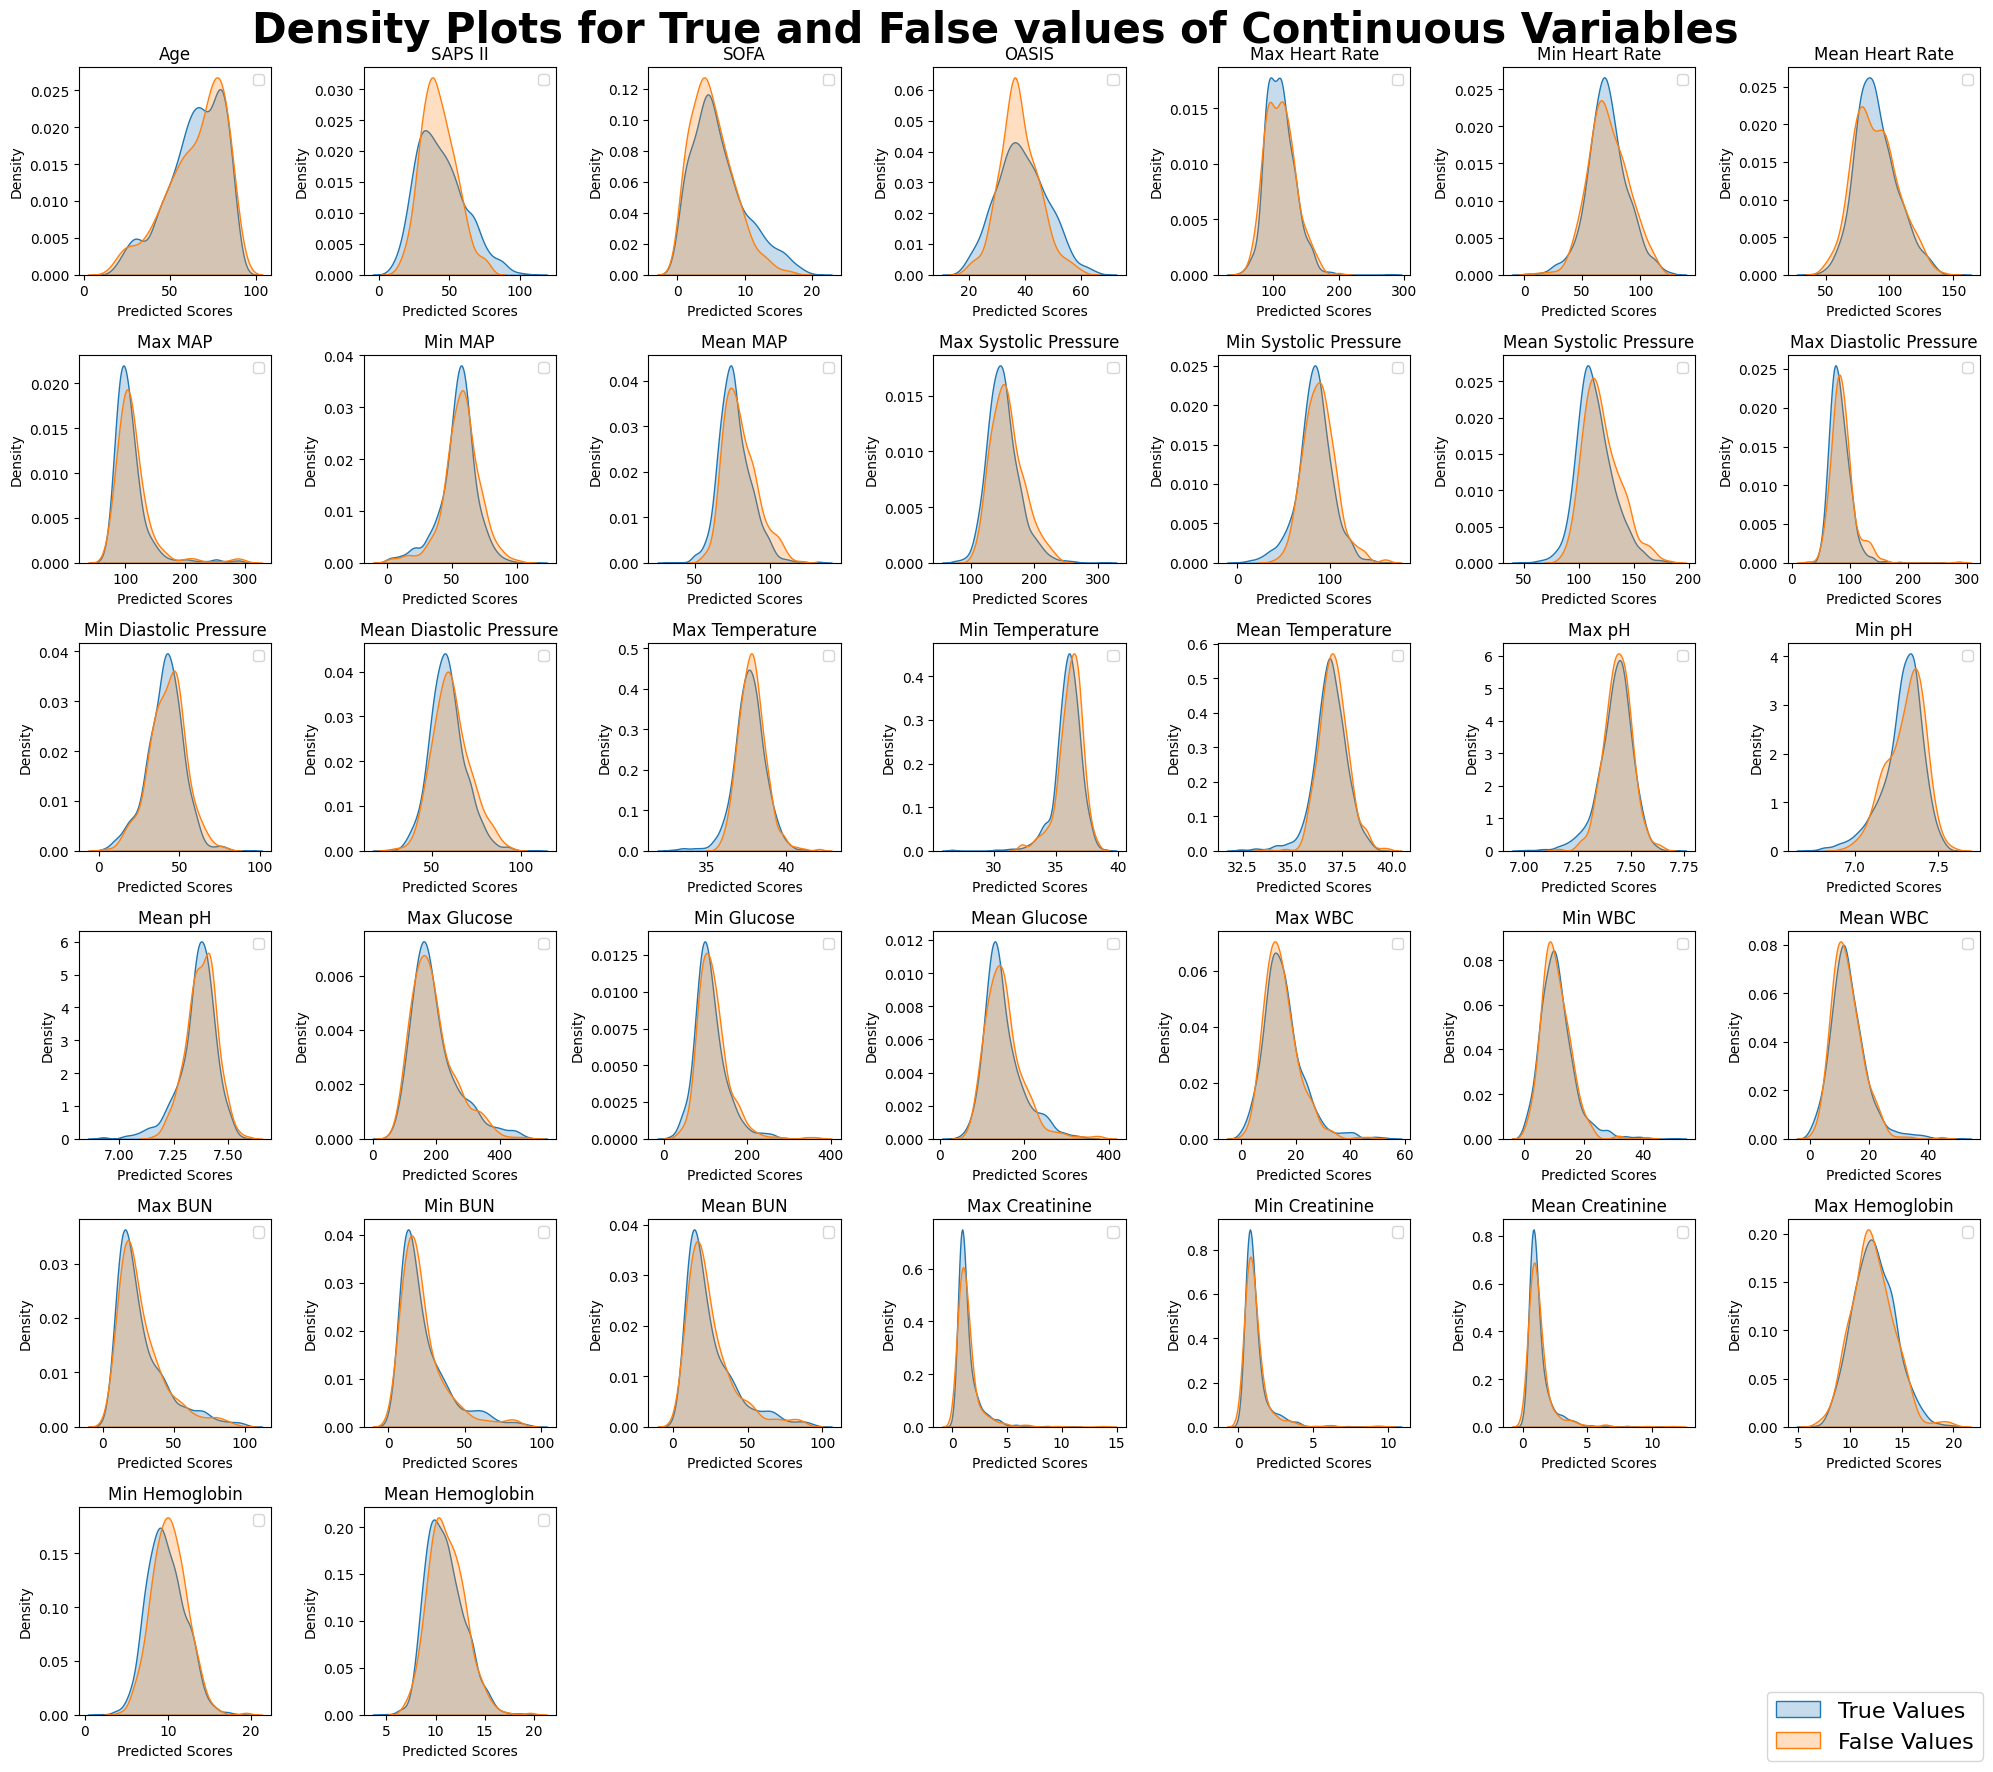

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def density_plot(x, df_true_values, df_false_values, ax):
    sns.kdeplot(df_true_values[x], fill=True, ax=ax)
    sns.kdeplot(df_false_values[x], fill=True, ax=ax)

    # Add labels and legend
    ax.set_title(f'{x}')
    ax.set_xlabel('Predicted Scores')
    ax.set_ylabel('Density')
    ax.legend()

# Calculate the number of rows needed based on the number of continuous variables
num_rows = (len(continous_var) + 6) // 7  # Ceiling division

# Create a figure and axis array with the specified number of rows and 8 columns
fig, axes = plt.subplots(num_rows, 7, figsize=(20, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the continuous variables and corresponding axes
for x, ax in zip(continous_var, axes):
    # If there are no more variables to plot, hide the axis
    if x is None:
        ax.axis('off')
        continue

    density_plot(x, df_true_values, df_false_values, ax)

# Hide any remaining empty subplots
for ax in axes[len(continous_var):]:
    ax.axis('off')

# Add a general legend for the entire scatter plot
plt.figlegend(labels=['True Values', 'False Values'], loc='lower right', fontsize=16)

# Add a general title for the entire scatter plot
plt.suptitle('Density Plots for True and False values of Continuous Variables', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.show()

# T-test for True values vs False values

In [ ]:
# Extracting only continuous variables
df_continuous_var = ["Age","SAPS II", "SOFA", "OASIS","Max Heart Rate", "Min Heart Rate", "Mean Heart Rate", "Max MAP", "Min MAP", "Mean MAP", "Max Systolic Pressure", "Min Systolic Pressure", "Mean Systolic Pressure", "Max Diastolic Pressure", "Min Diastolic Pressure","Mean Diastolic Pressure", "Max Temperature", "Min Temperature", "Mean Temperature", "Max pH", "Min pH", "Mean pH", "Max Glucose", "Min Glucose", "Mean Glucose", "Max WBC", "Min WBC", "Mean WBC", "Max BUN", "Min BUN", "Mean BUN", "Max Creatinine", "Min Creatinine", "Mean Creatinine", "Max Hemoglobin", "Min Hemoglobin", "Mean Hemoglobin"]

variables = []
p_values = []

for column in df_continuous_var:
    true_pos = df_true_values[column]
    false_pos = df_false_values[column]
    t_statistic, p_value = ttest_ind(true_pos, false_pos)
    print(f"P-value of {column}: {p_value:.5f}")
    variables.append(column)
    p_values.append(p_value)

# Sort variables and p_values based on p_values
sorted_variables, sorted_p_values = zip(*sorted(zip(variables, p_values), key=lambda x: x[1], reverse=True))

# Plotting the p-values in a graph
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(sorted_variables)), sorted_p_values, color='skyblue')
plt.yticks(np.arange(len(sorted_variables)), sorted_variables)
plt.xlabel('P-value')
plt.title('P-values of T-tests for Continuous Variables (True Values vs False Values)')
plt.axvline(0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.legend()
plt.show()

P-value of Age: 0.61497
P-value of SAPS II: 0.14265
P-value of SOFA: 0.00003
P-value of OASIS: 0.07948
P-value of Max Heart Rate: 0.93380
P-value of Min Heart Rate: 0.34607
P-value of Mean Heart Rate: 0.52893
P-value of Max MAP: 0.00511
P-value of Min MAP: 0.00296
P-value of Mean MAP: 0.00000
P-value of Max Systolic Pressure: 0.00005
P-value of Min Systolic Pressure: 0.00001
P-value of Mean Systolic Pressure: 0.00000
P-value of Max Diastolic Pressure: 0.00016
P-value of Min Diastolic Pressure: 0.04571
P-value of Mean Diastolic Pressure: 0.00031
P-value of Max Temperature: 0.00379
P-value of Min Temperature: 0.00248
P-value of Mean Temperature: 0.00026
P-value of Max pH: 0.02291
P-value of Min pH: 0.01006
P-value of Mean pH: 0.00031
P-value of Max Glucose: 0.33188
P-value of Min Glucose: 0.00437
P-value of Mean Glucose: 0.55742
P-value of Max WBC: 0.14600
P-value of Min WBC: 0.34880
P-value of Mean WBC: 0.23963
P-value of Max BUN: 0.97997
P-value of Min BUN: 0.51364
P-value of Mean BUN:

## Categorical - Mode

In [ ]:
# Get the mode of the Gender column in the True Positive group
mode_gender = df_concat.loc['True Positive', 'Complicated Diabetes'].mode()[0]

# Print the mode
print(mode_gender)

KeyError: 'True Positive'

In [ ]:
cat_variables = ['Gender','Uncomplicated Hypertension', 'Complicated Hypertension', 'Uncomplicated Diabetes',
                 'Complicated Diabetes', 'Malignancy', 'Hematologic Disease',
                 'Metastasis', 'Peripheral Vascular Disease', 'Hypothyroidism',
                 'Chronic Heart Failure', 'Stroke', 'Liver Disease','Sepsis', 'Any Organ Failure',
                 'Severe Respiratory Failure',
                 'Severe Coagulation Failure', 'Severe Liver Failure',
                 'Severe Cardiovascular Failure','Severe Central Nervous System Failure', 'Severe Renal Failure',
                 'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
                 'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction', 'Neurologic Dysfunction']
df_concat = pd.concat([df_t[df_t['Predicted'] == 1], df_fp], keys=['True Positive', 'False Positive'], names=['Group'])

for category in cat_variables:
  if df_concat.loc['True Positive', category].mode()[0] != df_concat.loc['False Positive', category].mode()[0]:
    print(f'There is the different in mode of {category}')
  print(f"Mode of {category} of True Positive: {df_concat.loc['True Positive', category].mode()[0]} - False Positive: {df_concat.loc['False Positive', category].mode()[0]}")

Mode of Gender of True Positive: 1 - False Positive: 1
Mode of Uncomplicated Hypertension of True Positive: 0 - False Positive: 0
Mode of Complicated Hypertension of True Positive: 0 - False Positive: 0
Mode of Uncomplicated Diabetes of True Positive: 0 - False Positive: 0
Mode of Complicated Diabetes of True Positive: 0 - False Positive: 0
Mode of Malignancy of True Positive: 0 - False Positive: 0
Mode of Hematologic Disease of True Positive: 0 - False Positive: 0
Mode of Metastasis of True Positive: 0 - False Positive: 0
Mode of Peripheral Vascular Disease of True Positive: 0 - False Positive: 0
Mode of Hypothyroidism of True Positive: 0 - False Positive: 0
Mode of Chronic Heart Failure of True Positive: 0 - False Positive: 0
Mode of Stroke of True Positive: 0 - False Positive: 0
Mode of Liver Disease of True Positive: 0 - False Positive: 0
Mode of Sepsis of True Positive: 0 - False Positive: 0
Mode of Any Organ Failure of True Positive: 1 - False Positive: 1
Mode of Severe Respirato

KeyError: 'False Positive'

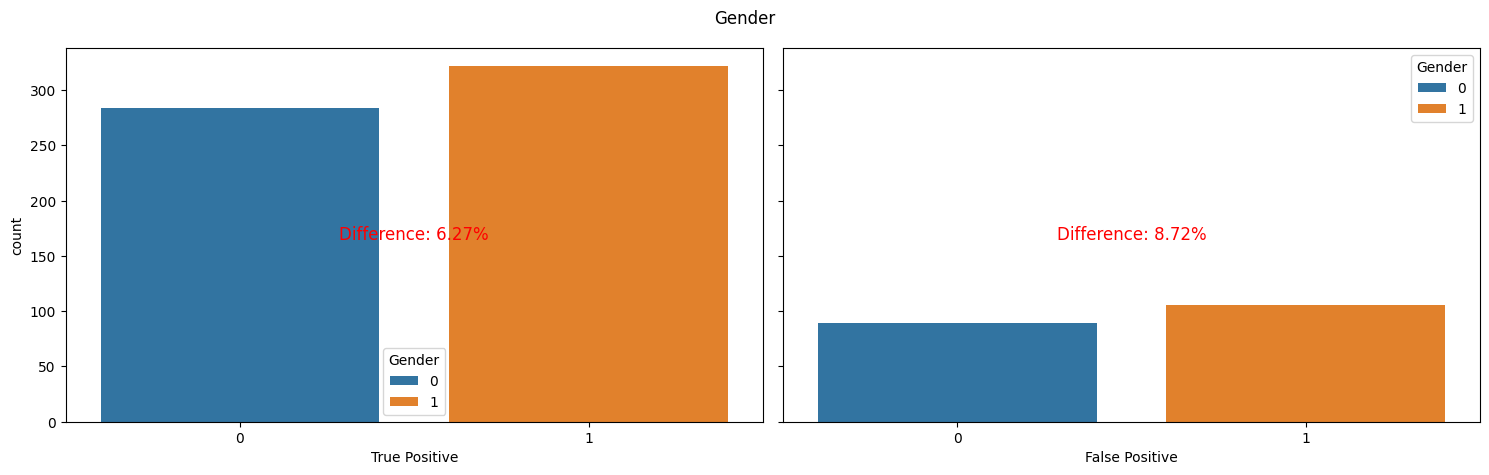

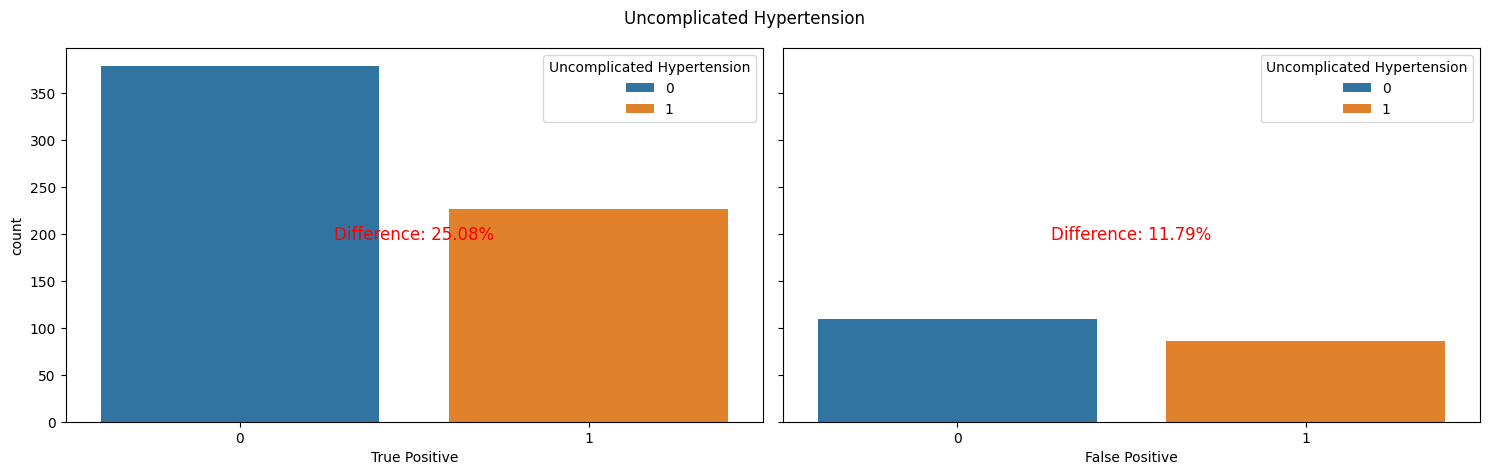

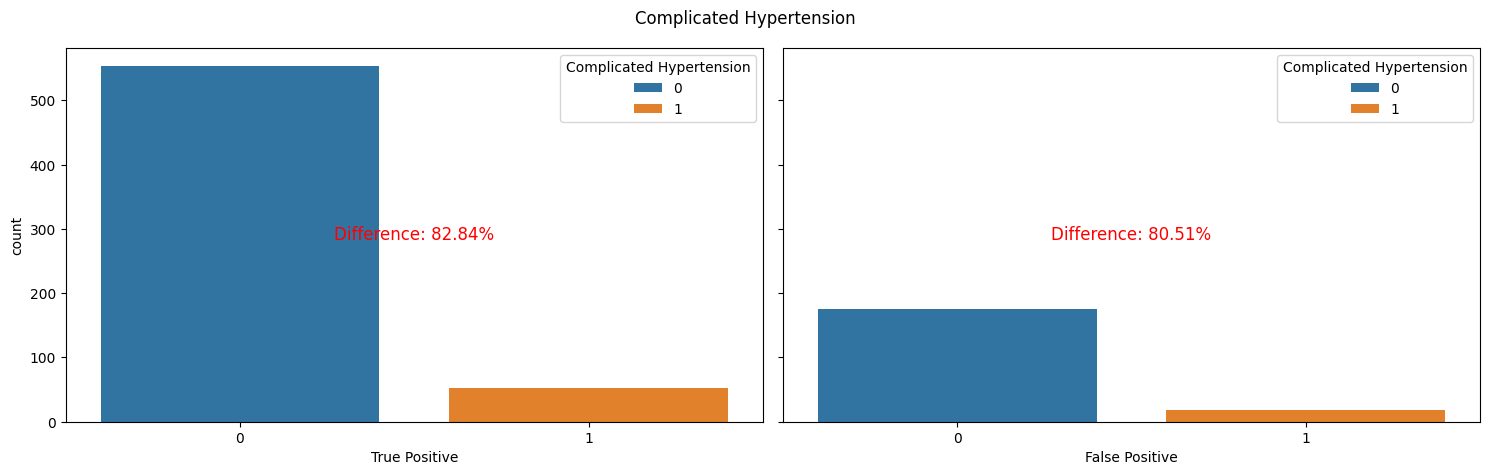

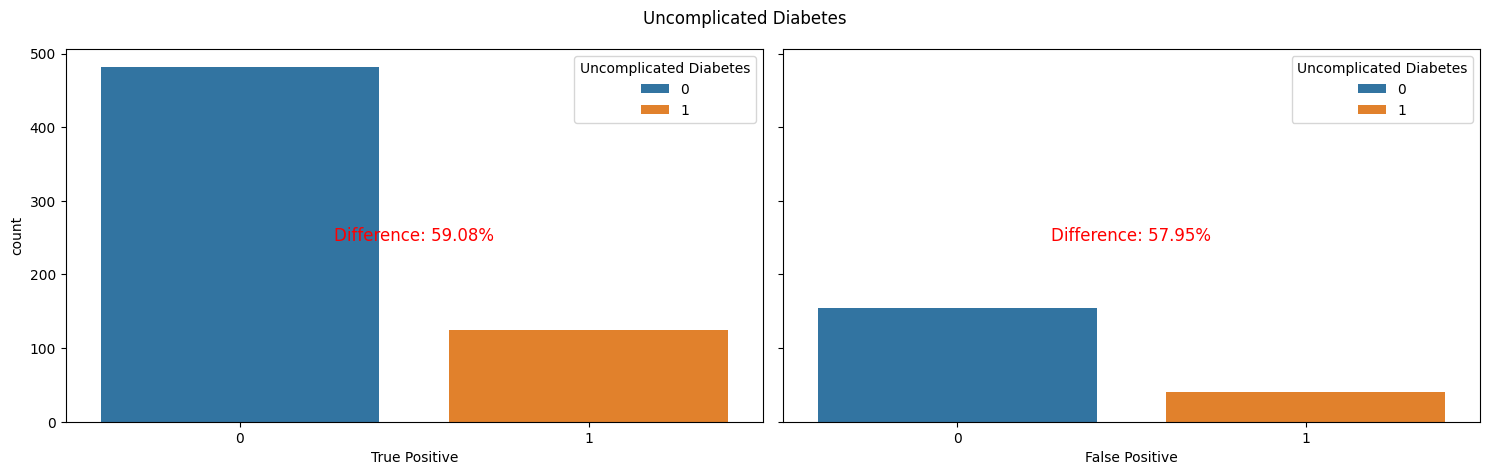

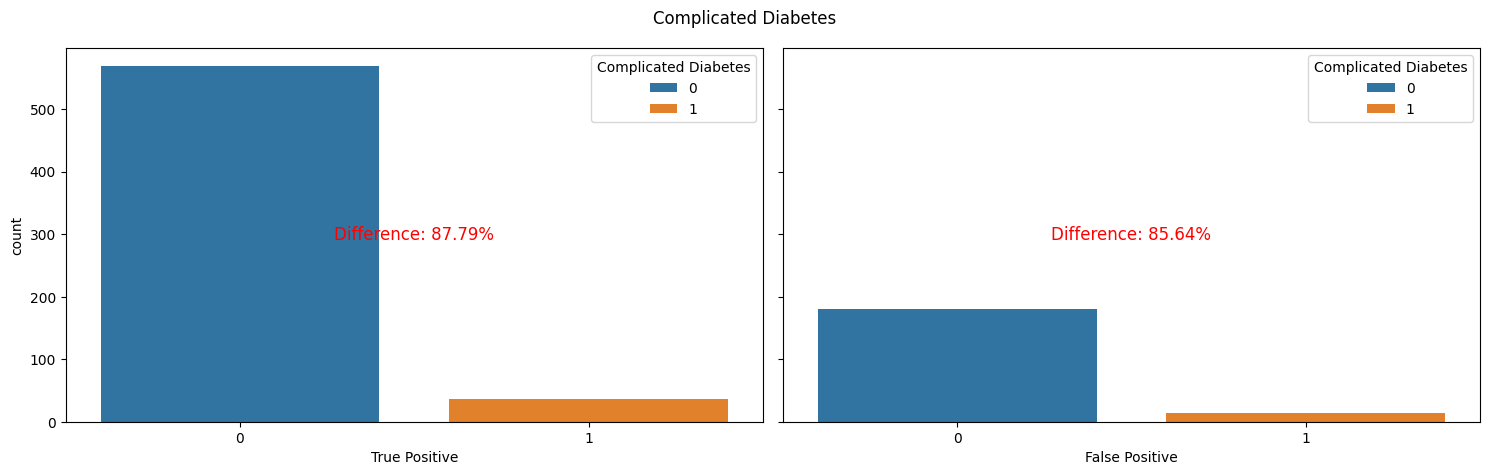

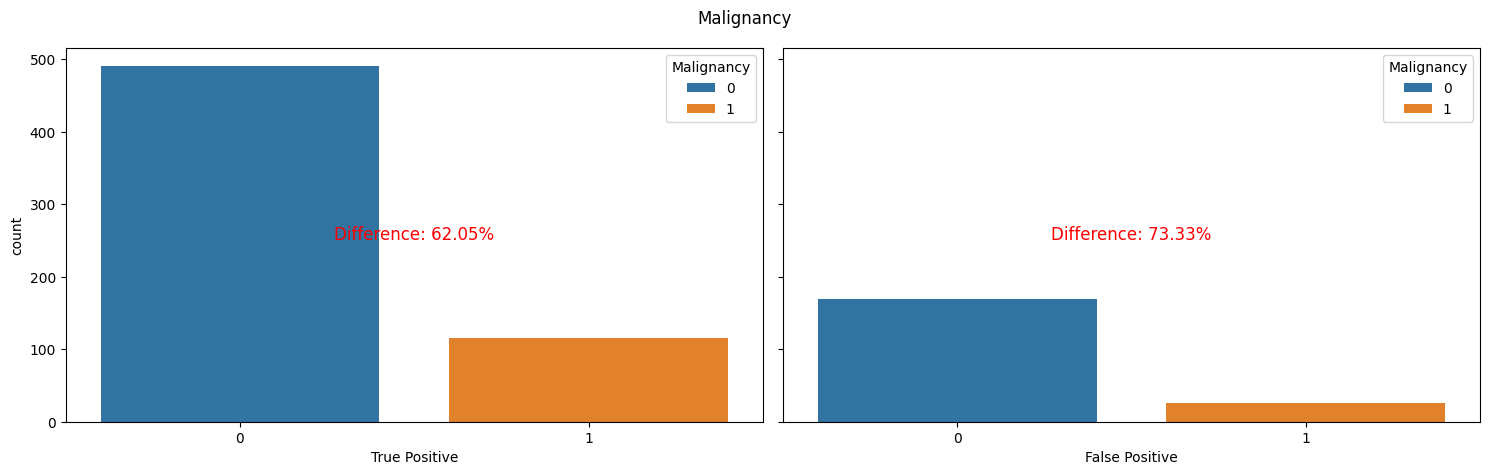

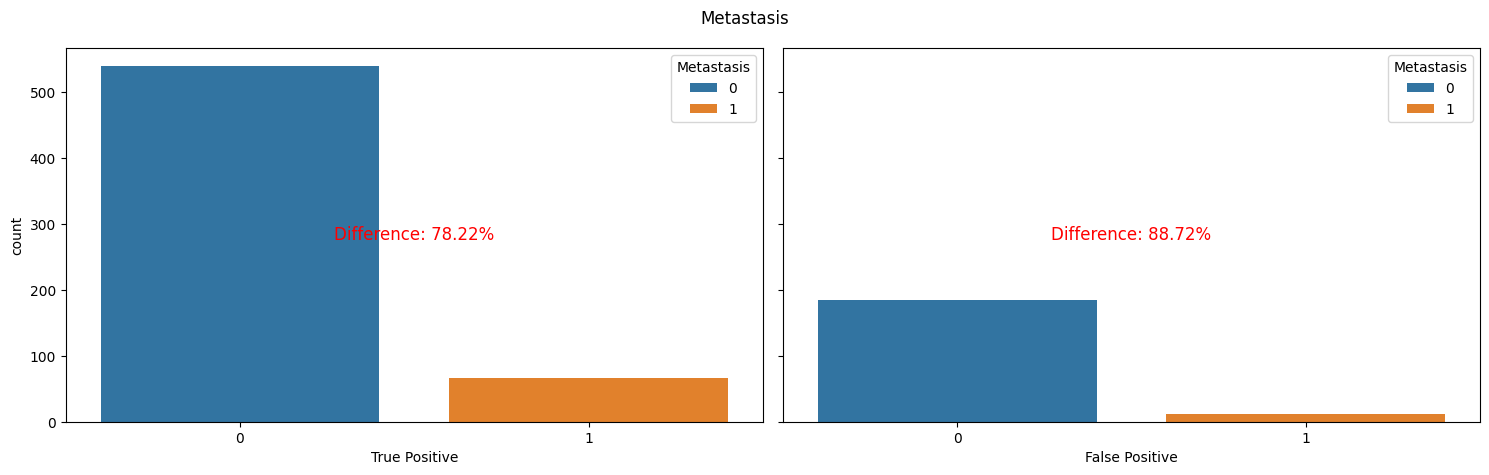

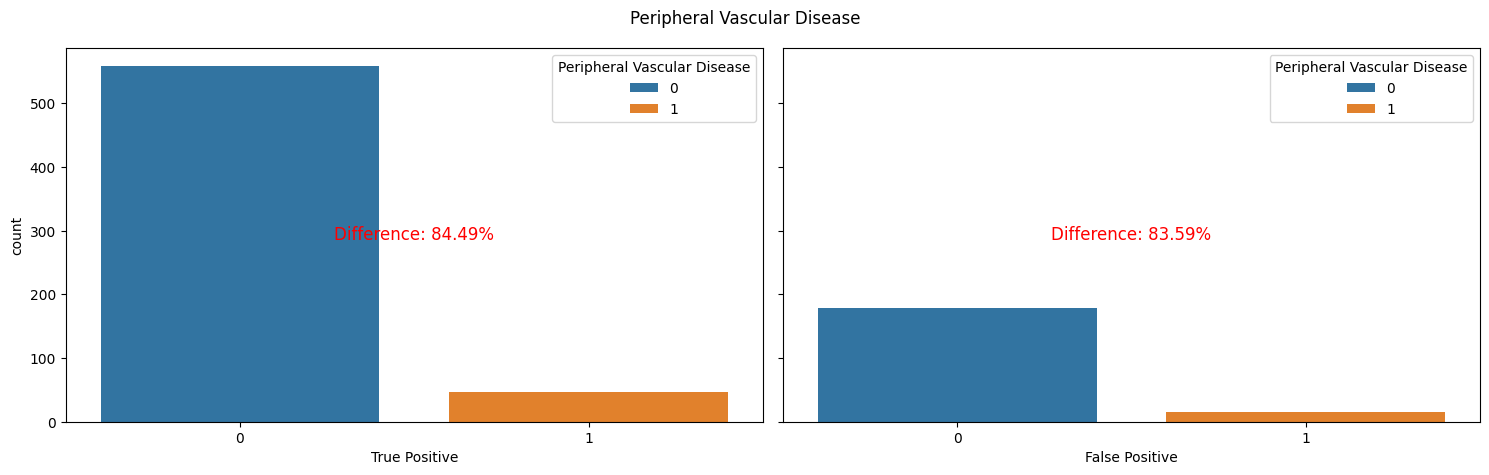

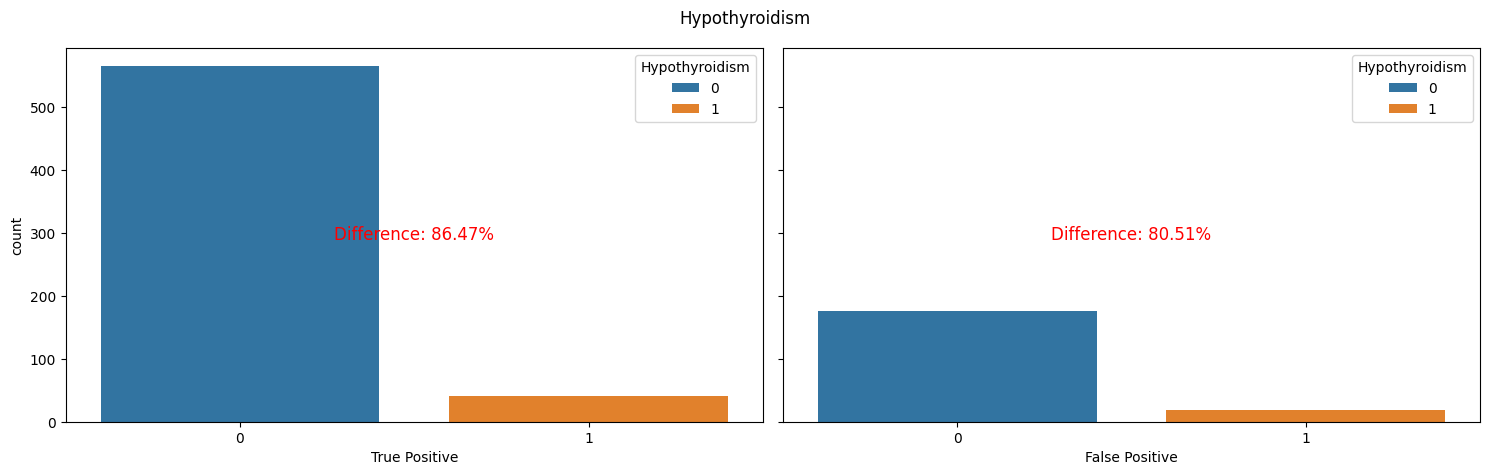

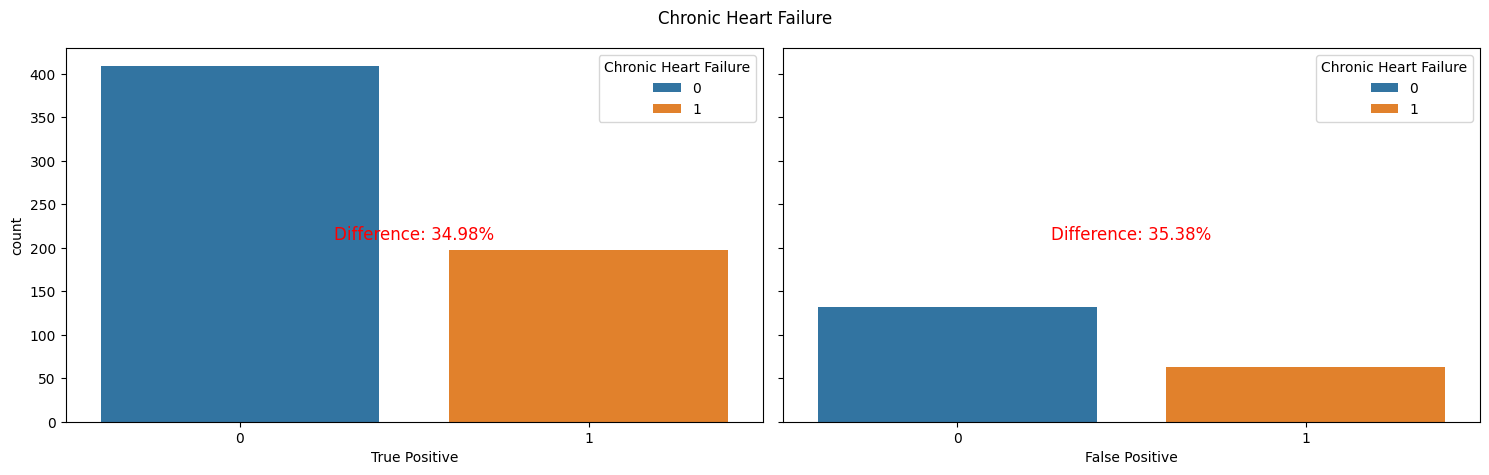

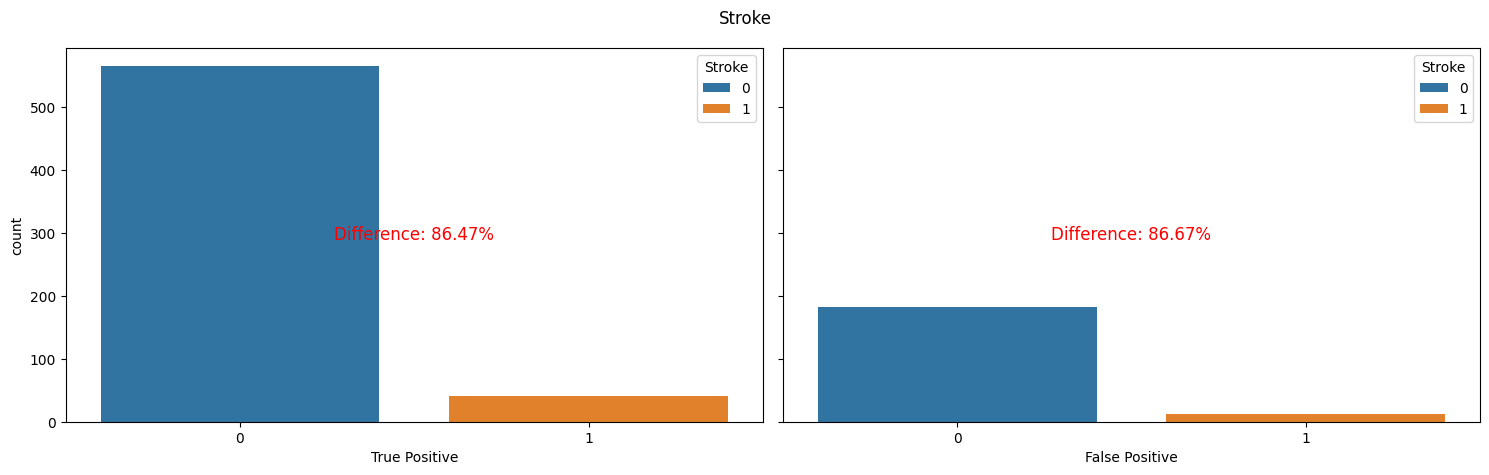

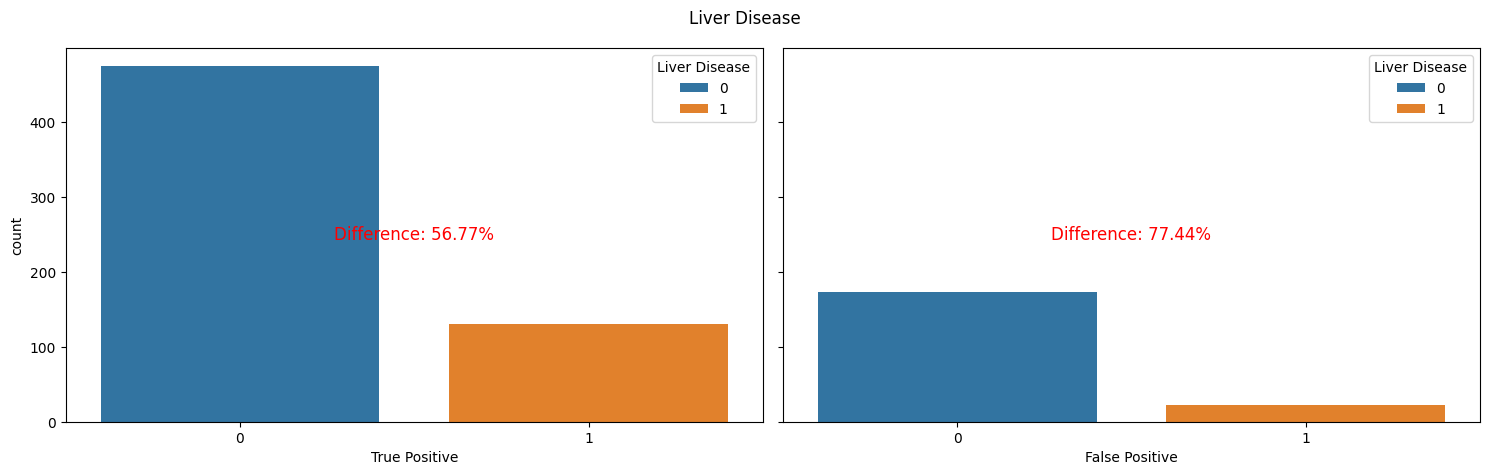

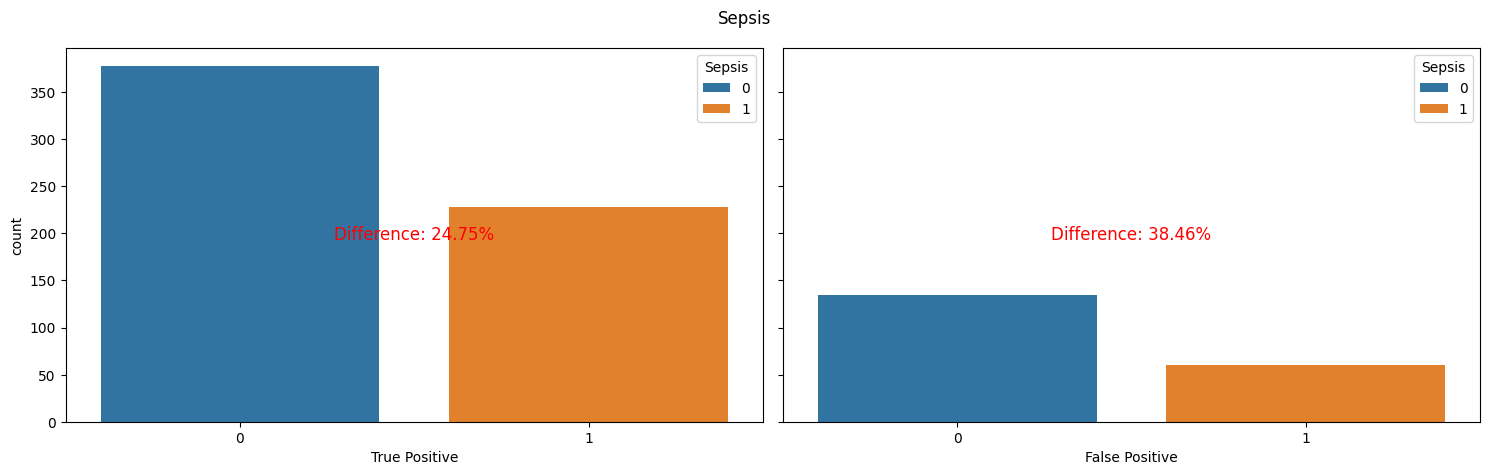

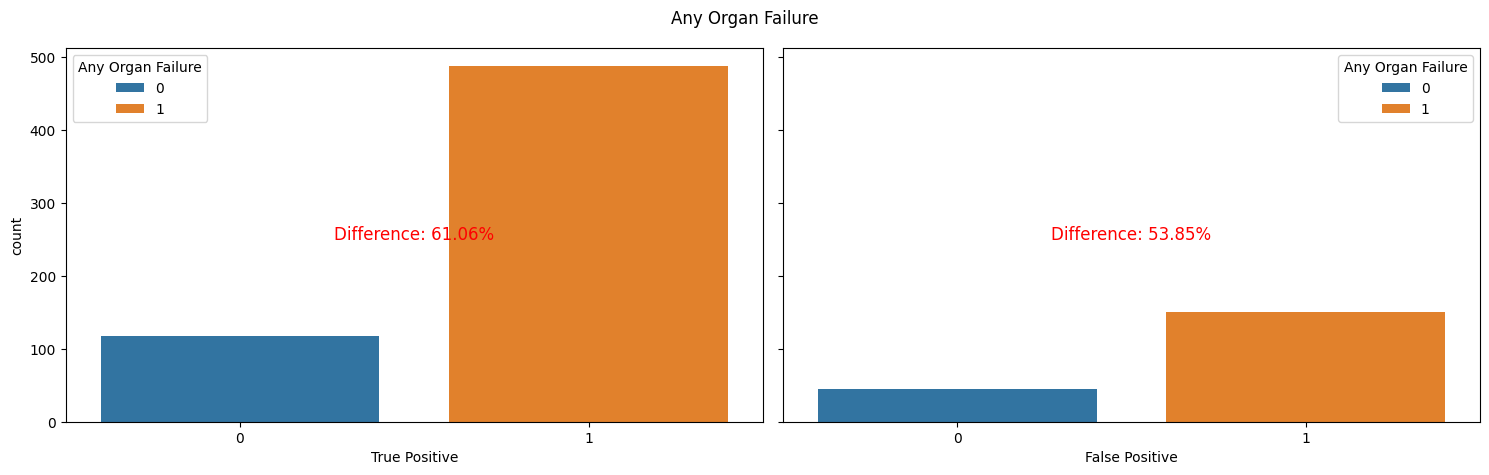

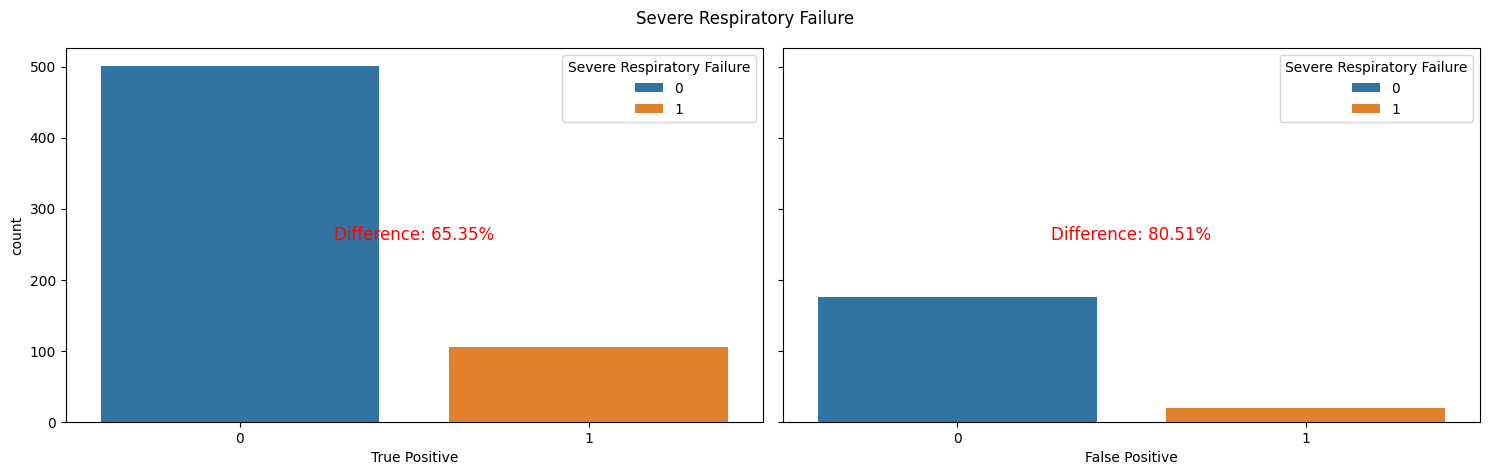

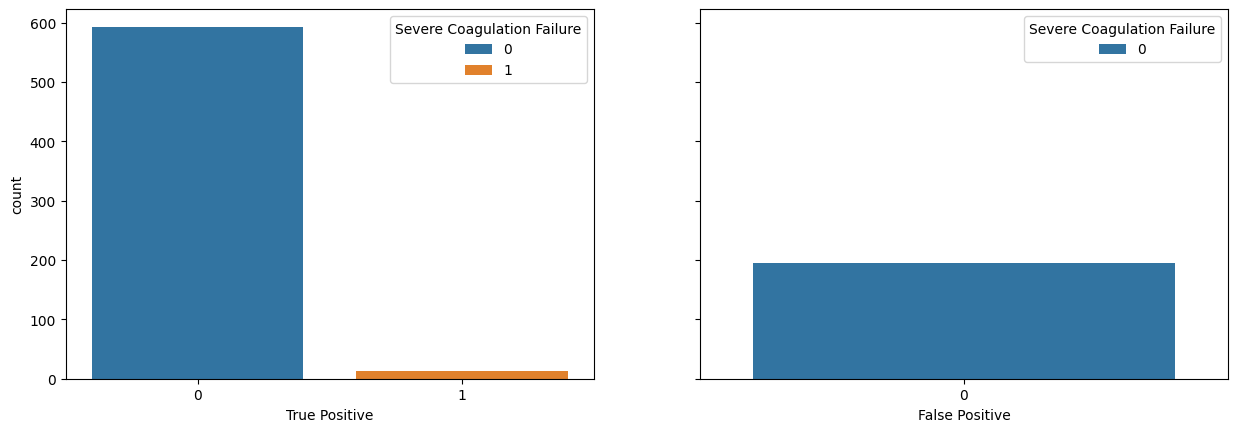

In [ ]:
cat_variables = ['Gender','Uncomplicated Hypertension', 'Complicated Hypertension', 'Uncomplicated Diabetes',
                 'Complicated Diabetes', 'Malignancy', 'Hematologic Disease',
                 'Metastasis', 'Peripheral Vascular Disease', 'Hypothyroidism',
                 'Chronic Heart Failure', 'Stroke', 'Liver Disease','Sepsis', 'Any Organ Failure',
                 'Severe Respiratory Failure',
                 'Severe Coagulation Failure', 'Severe Liver Failure',
                 'Severe Cardiovascular Failure','Severe Central Nervous System Failure', 'Severe Renal Failure',
                 'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
                 'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction', 'Neurologic Dysfunction']
df_concat = pd.concat([df_true_pos, df_false_pos], keys=['True Positive', 'False Positive'], names=['Group'])

for category in cat_variables:
    fig, ax = plt.subplots(1, 2, sharey=True)
    #set the figure size
    fig.set_figwidth(15)

    sns.countplot(data = df_concat.loc['True Positive'], x = category, hue = category, ax=ax[0])
    ax[0].set_xlabel('True Positive')
    sns.countplot(data = df_concat.loc['False Positive'], x = category, hue = category, ax=ax[1])
    ax[1].set_xlabel('False Positive')

    # Calculate percentages
    true_pos_count_0 = df_concat[df_concat[category] == 0].loc['True Positive'].shape[0]
    true_pos_count_1 = df_concat[df_concat[category] == 1].loc['True Positive'].shape[0]
    true_pos_total = df_concat.loc['True Positive'].shape[0]

    true_pos_percentage = (abs(true_pos_count_0 - true_pos_count_1) / true_pos_total) * 100

    flase_pos_count_0 = df_concat[df_concat[category] == 0].loc['False Positive'].shape[0]
    flase_pos_count_1 = df_concat[df_concat[category] == 1].loc['False Positive'].shape[0]
    flase_pos_total = df_concat.loc['False Positive'].shape[0]

    flase_pos_percentage = (abs(flase_pos_count_0 - flase_pos_count_1) / flase_pos_total) * 100

    # Annotate the plot with the percentage difference
    ax[0].text(0.5, 0.5, f'Difference: {true_pos_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes, fontsize=12, color='red')
    ax[1].text(0.5, 0.5, f'Difference: {flase_pos_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes, fontsize=12, color='red')

    plt.suptitle(category)

    plt.tight_layout()

KeyError: 'True Negative'

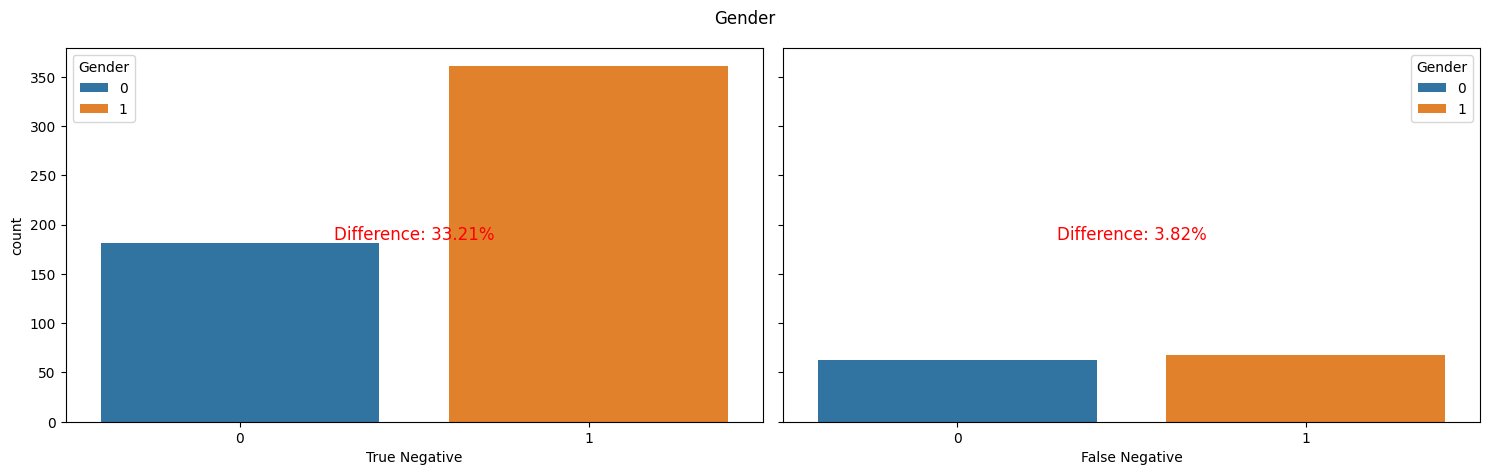

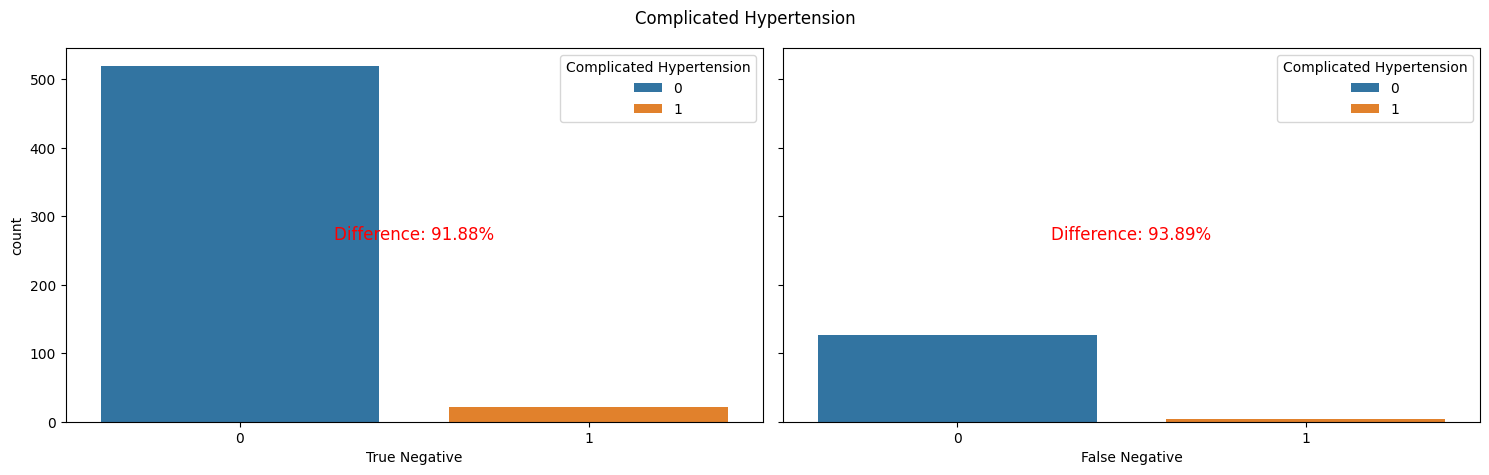

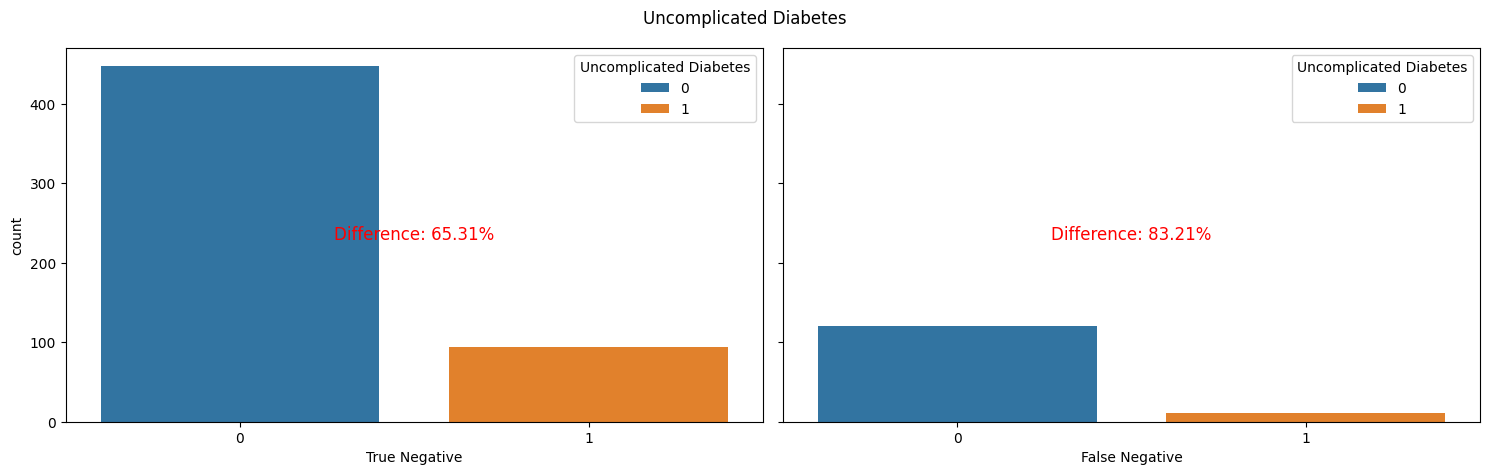

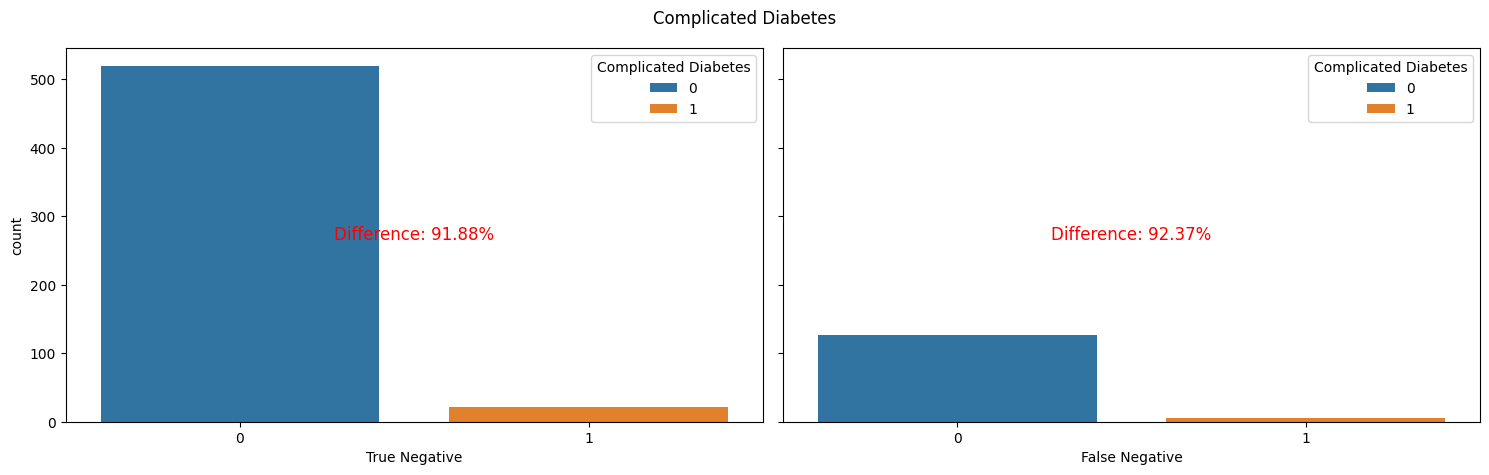

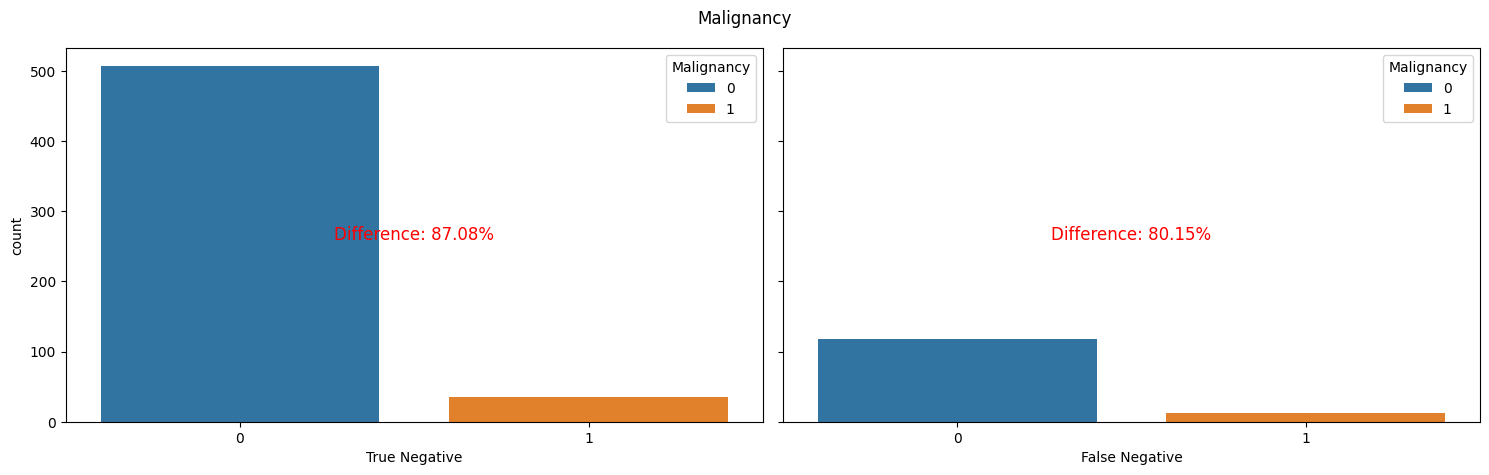

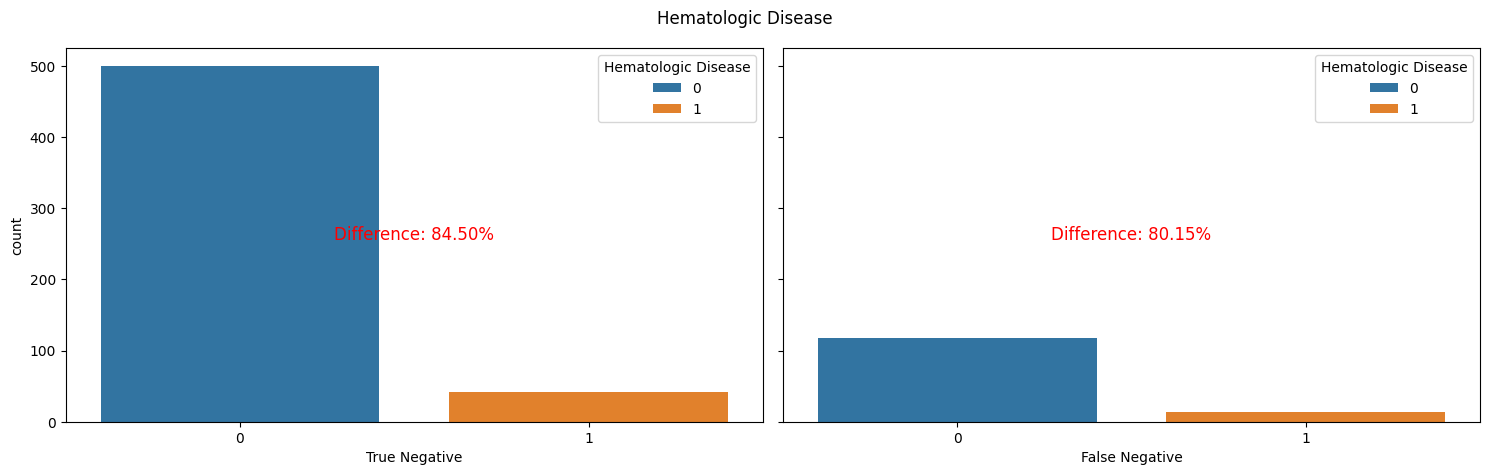

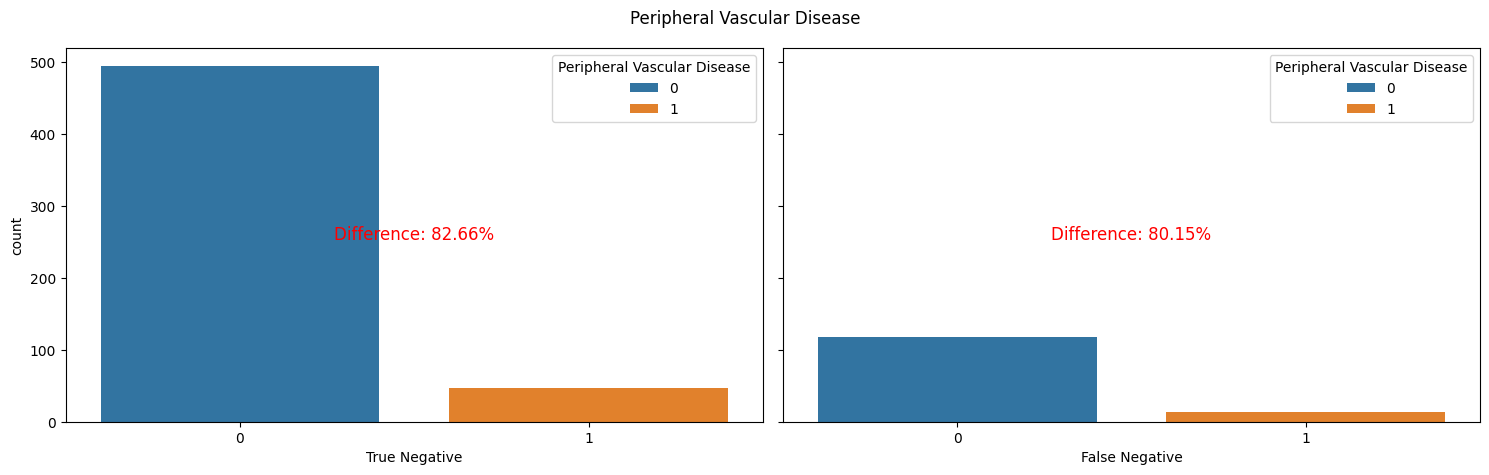

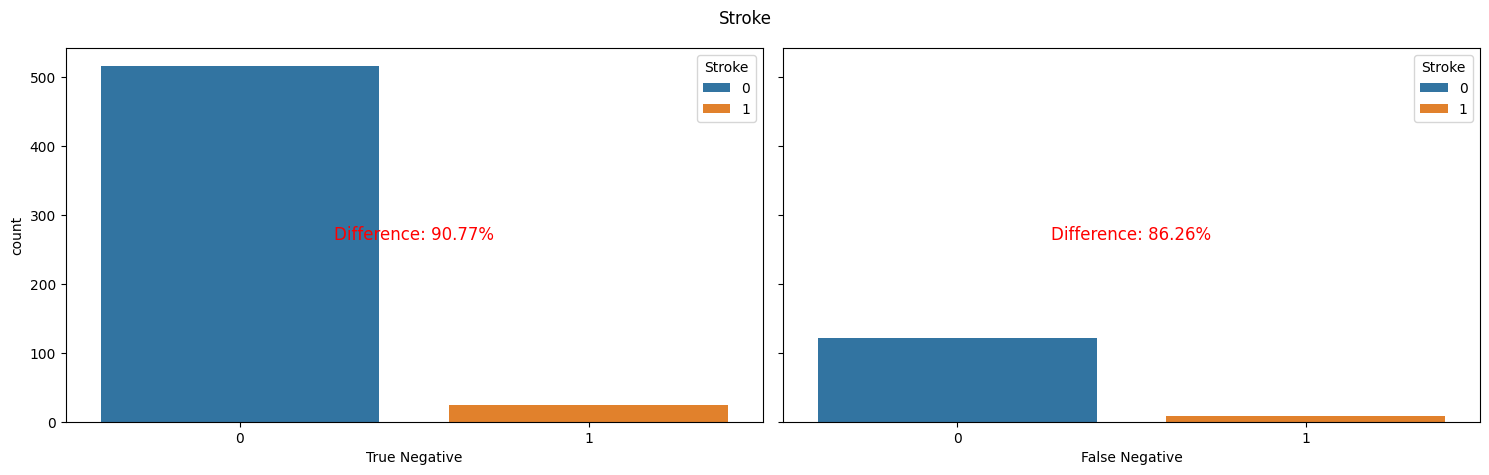

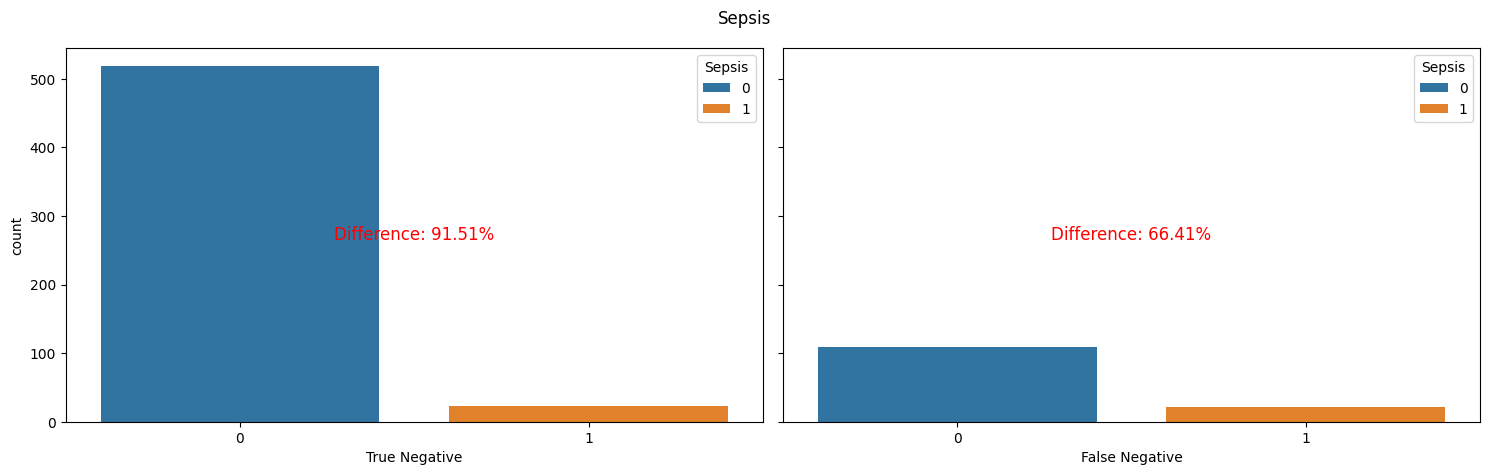

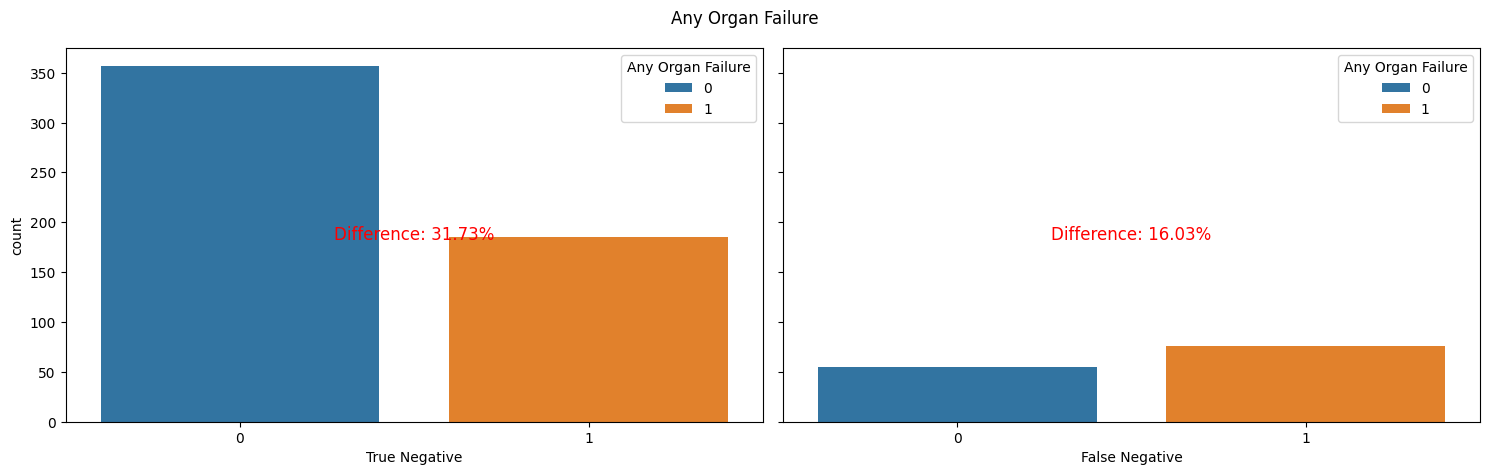

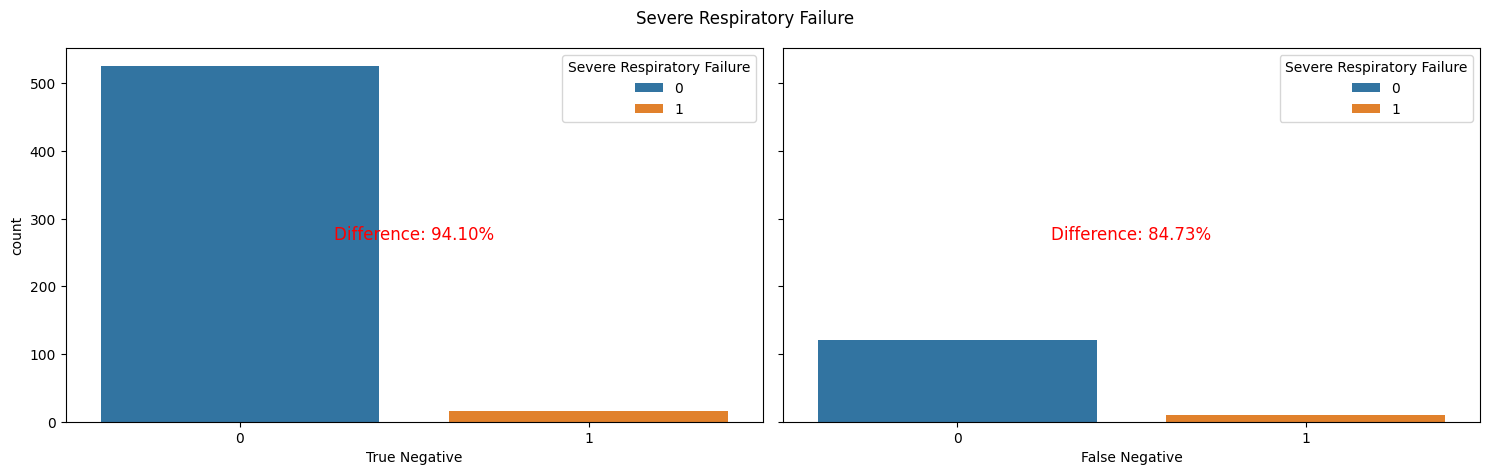

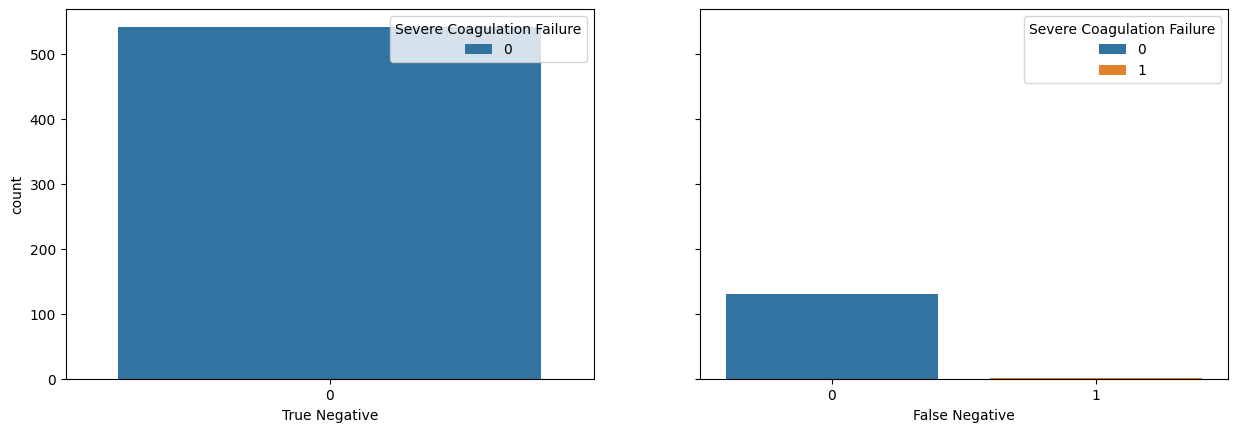

In [ ]:
cat_variables = ['Gender','Uncomplicated Hypertension', 'Complicated Hypertension', 'Uncomplicated Diabetes',
                 'Complicated Diabetes', 'Malignancy', 'Hematologic Disease',
                 'Metastasis', 'Peripheral Vascular Disease', 'Hypothyroidism',
                 'Chronic Heart Failure', 'Stroke', 'Liver Disease','Sepsis', 'Any Organ Failure',
                 'Severe Respiratory Failure',
                 'Severe Coagulation Failure', 'Severe Liver Failure',
                 'Severe Cardiovascular Failure','Severe Central Nervous System Failure', 'Severe Renal Failure',
                 'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
                 'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction', 'Neurologic Dysfunction']
df_concat = pd.concat([df_true_neg, df_false_neg], keys=['True Negative', 'False Negative'], names=['Group'])

for category in cat_variables:
    fig, ax = plt.subplots(1, 2, sharey=True)
    #set the figure size
    fig.set_figwidth(15)

    sns.countplot(data = df_concat.loc['True Negative'], x = category, hue = category, ax=ax[0])
    ax[0].set_xlabel('True Negative')
    sns.countplot(data = df_concat.loc['False Negative'], x = category, hue = category, ax=ax[1])
    ax[1].set_xlabel('False Negative')

    # Calculate percentages
    true_pos_count_0 = df_concat[df_concat[category] == 0].loc['True Negative'].shape[0]
    true_pos_count_1 = df_concat[df_concat[category] == 1].loc['True Negative'].shape[0]
    true_pos_total = df_concat.loc['True Negative'].shape[0]

    true_pos_percentage = (abs(true_pos_count_0 - true_pos_count_1) / true_pos_total) * 100

    flase_pos_count_0 = df_concat[df_concat[category] == 0].loc['False Negative'].shape[0]
    flase_pos_count_1 = df_concat[df_concat[category] == 1].loc['False Negative'].shape[0]
    flase_pos_total = df_concat.loc['False Negative'].shape[0]

    flase_pos_percentage = (abs(flase_pos_count_0 - flase_pos_count_1) / flase_pos_total) * 100

    # Annotate the plot with the percentage difference
    ax[0].text(0.5, 0.5, f'Difference: {true_pos_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes, fontsize=12, color='red')
    ax[1].text(0.5, 0.5, f'Difference: {flase_pos_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes, fontsize=12, color='red')

    plt.suptitle(category)

    plt.tight_layout()

<ipython-input-88-345a9b7a41d2>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, sharey=True)


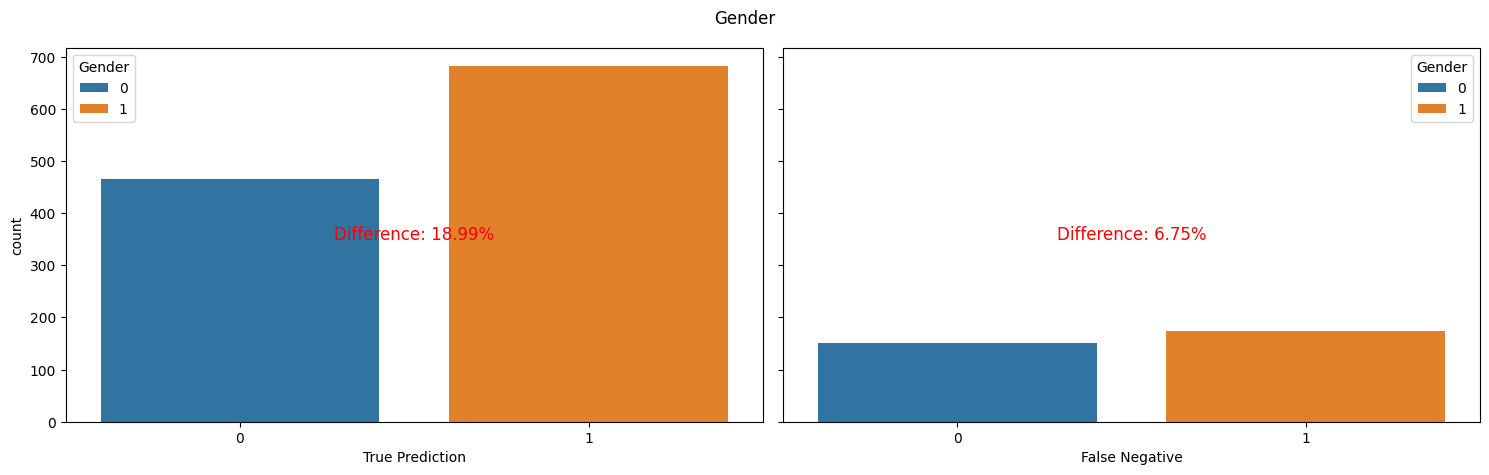

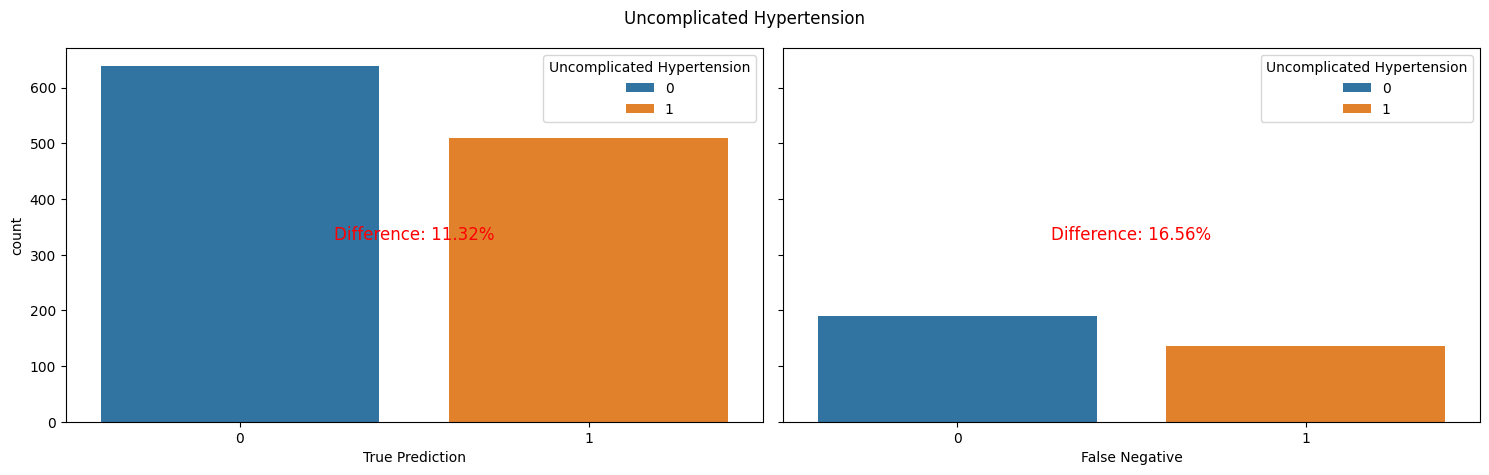

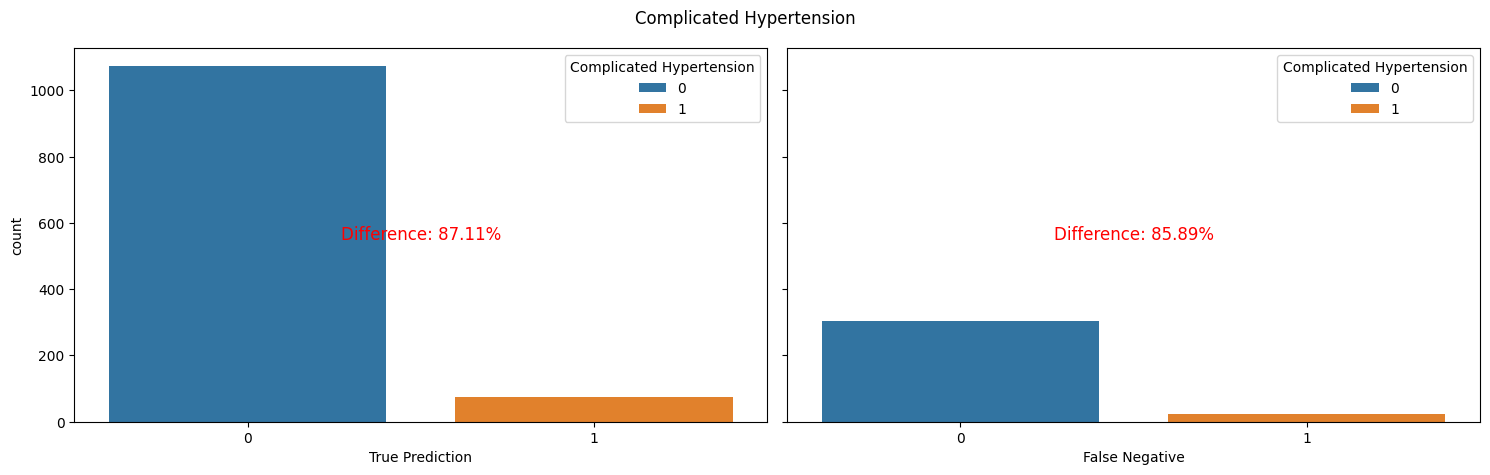

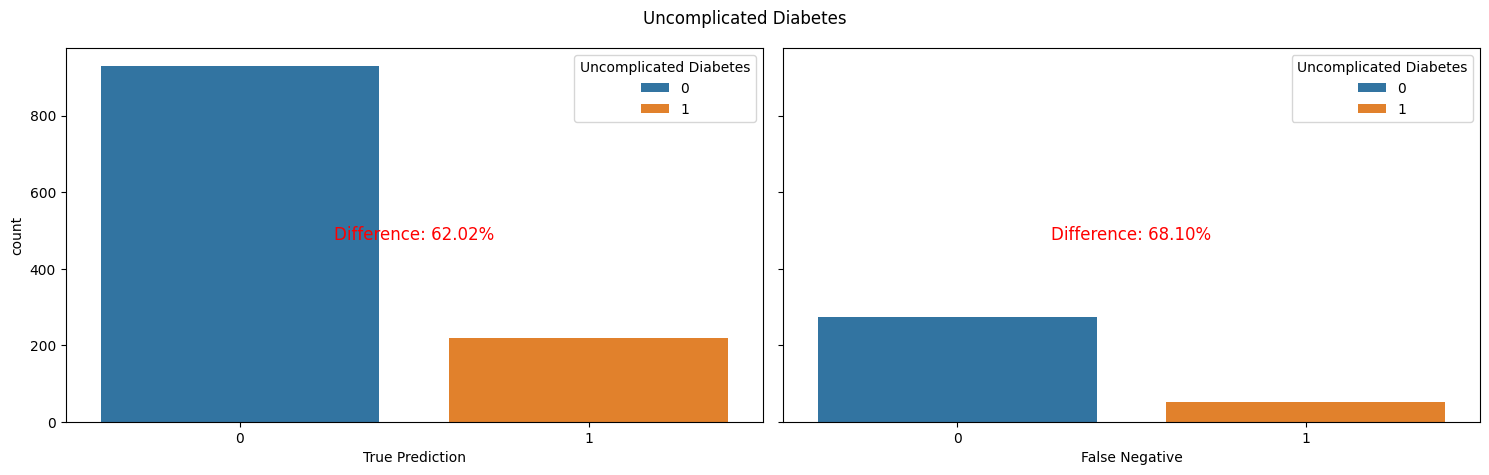

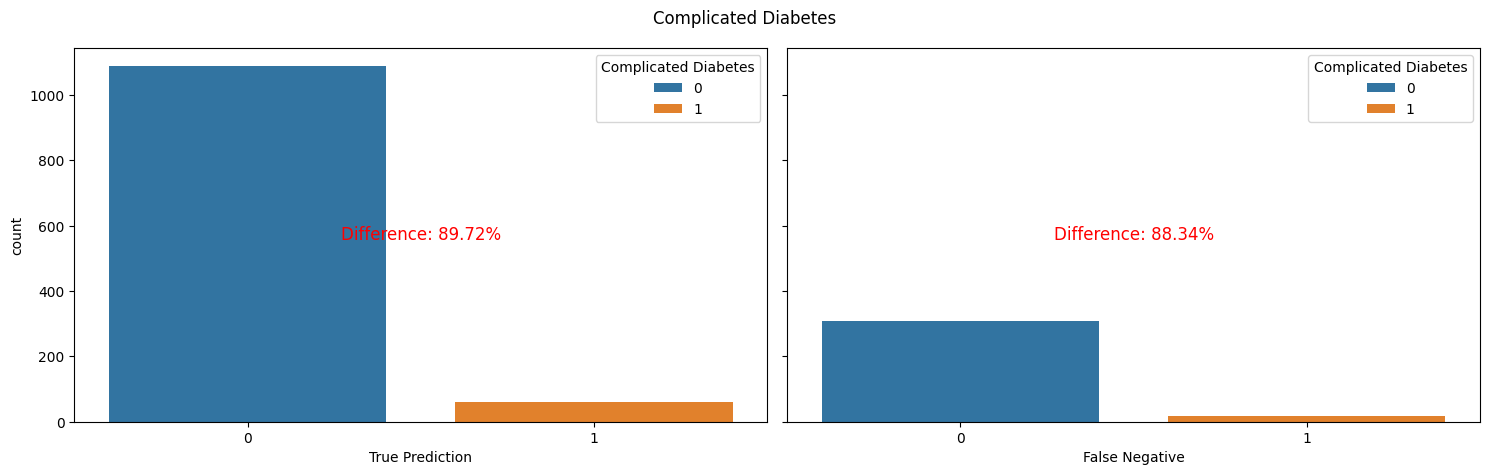

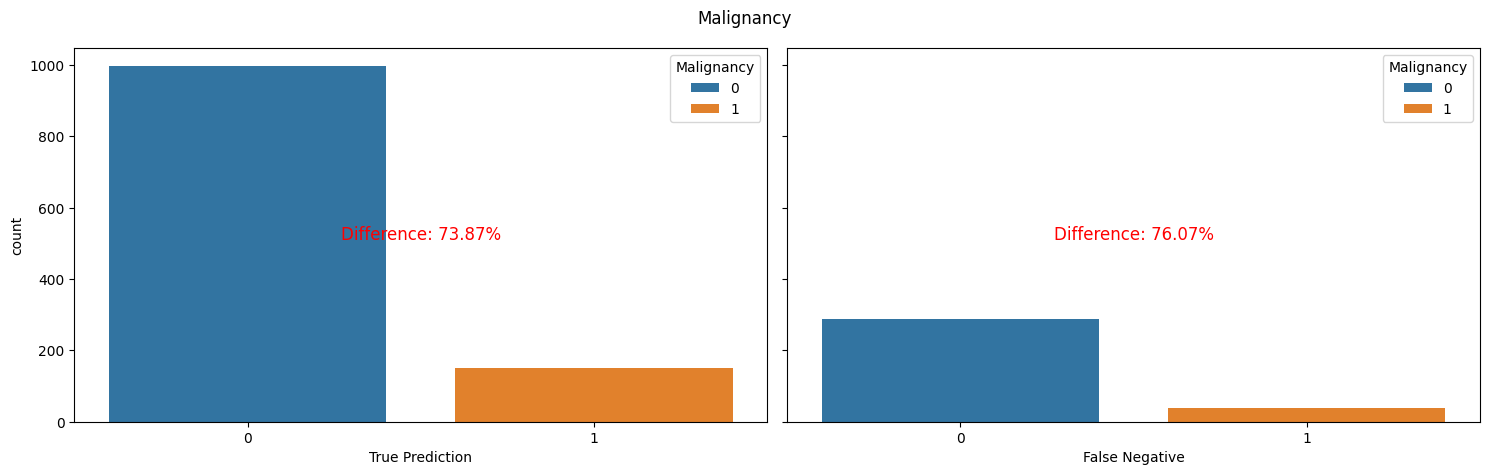

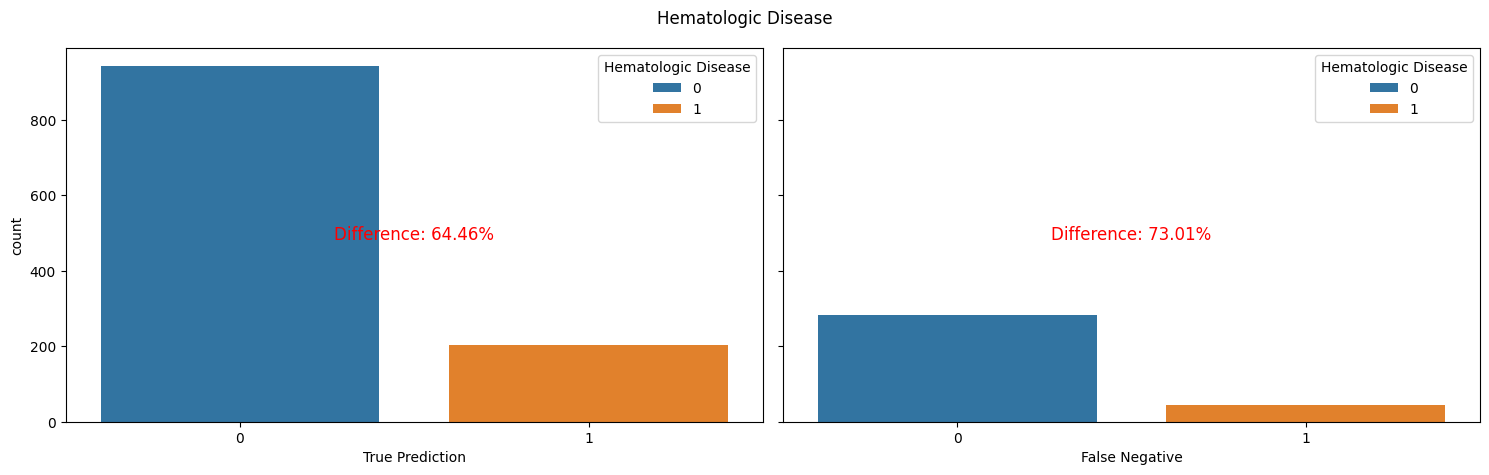

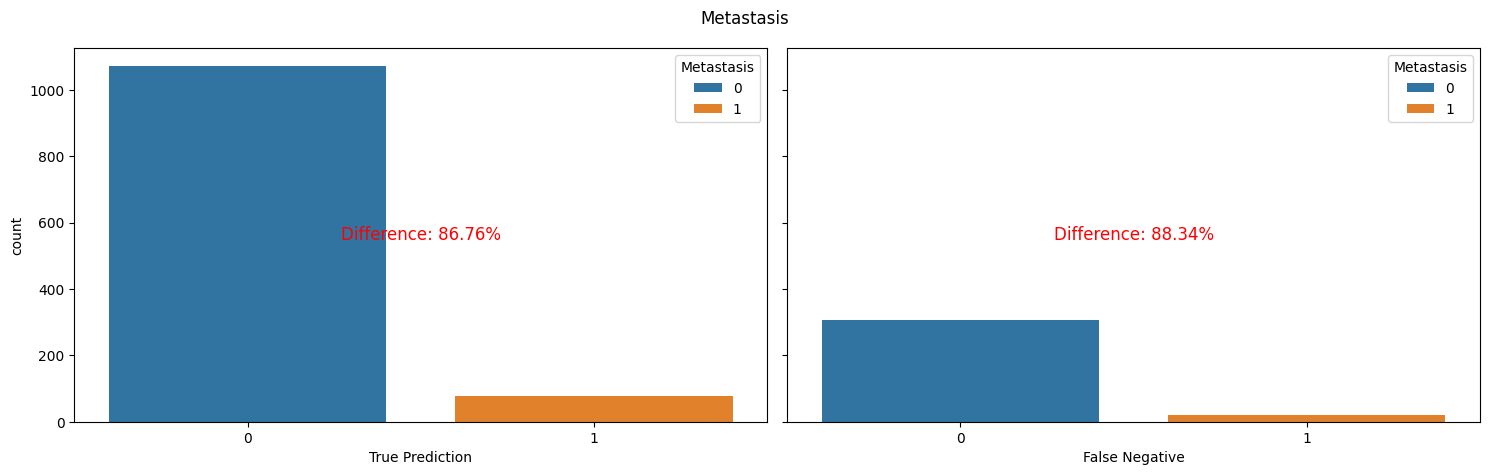

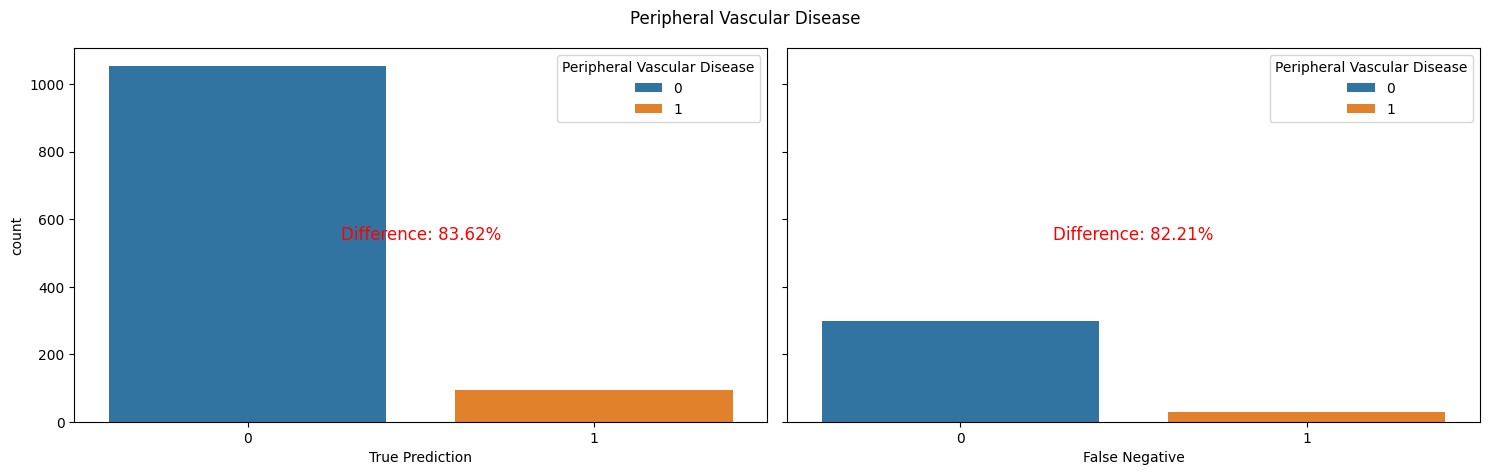

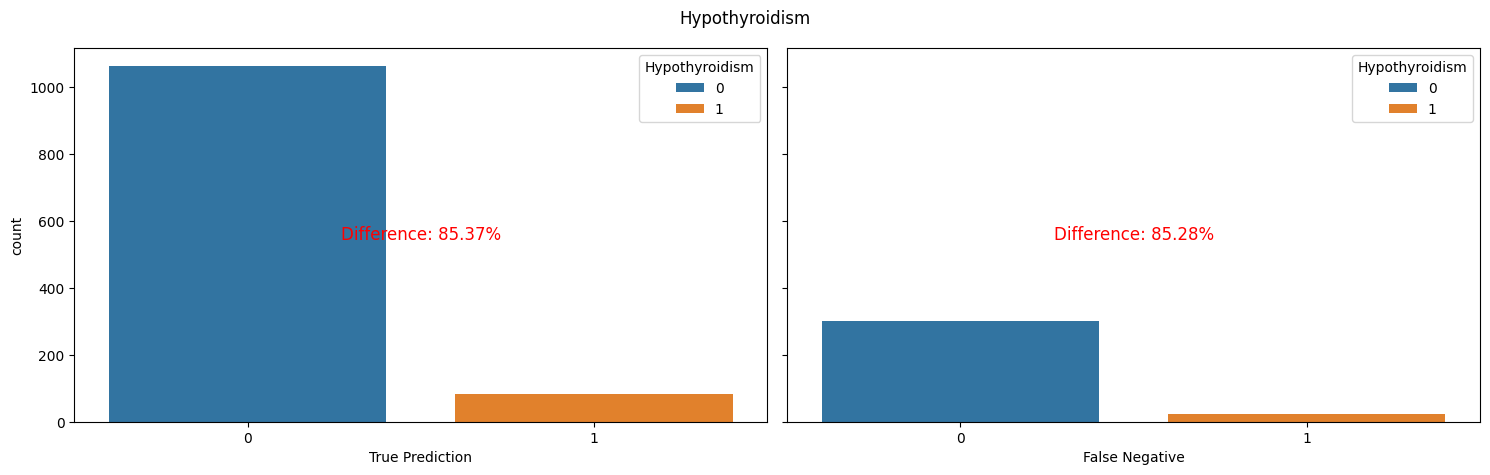

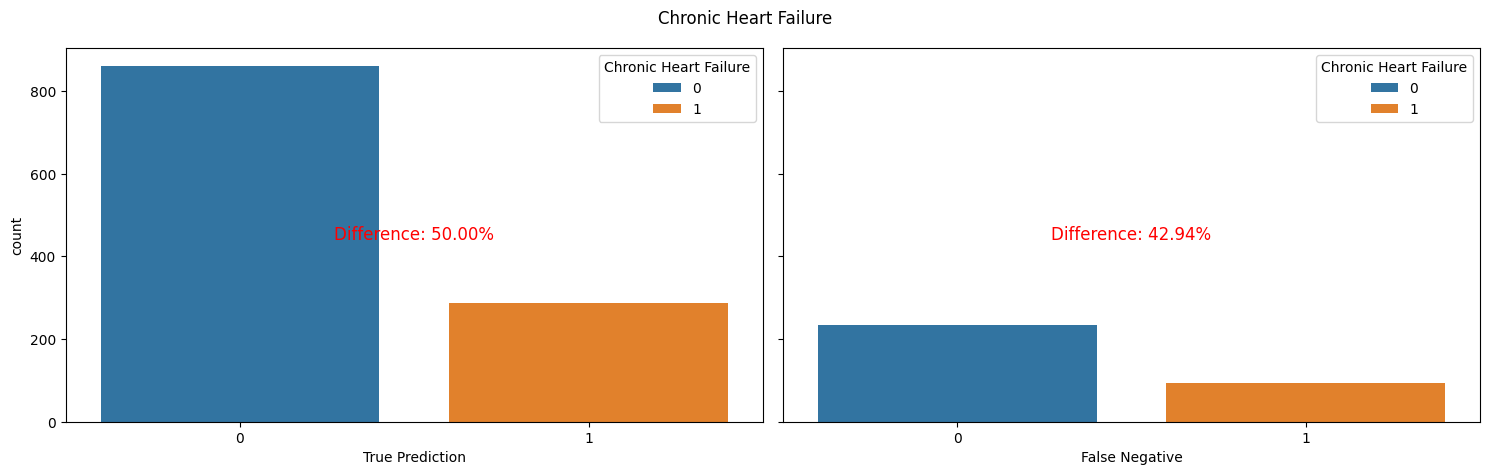

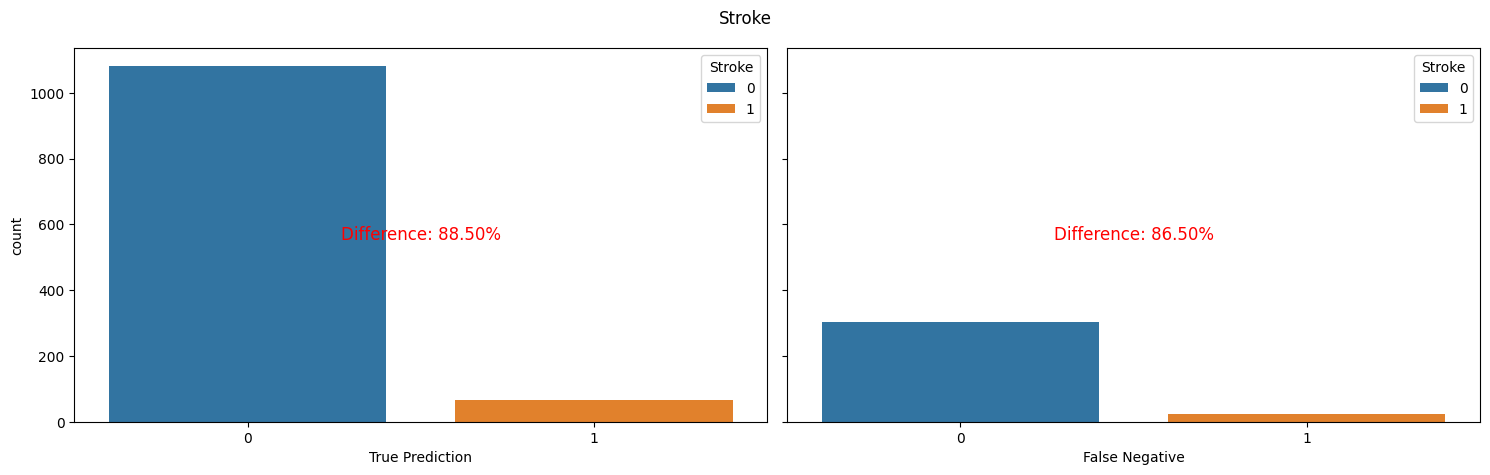

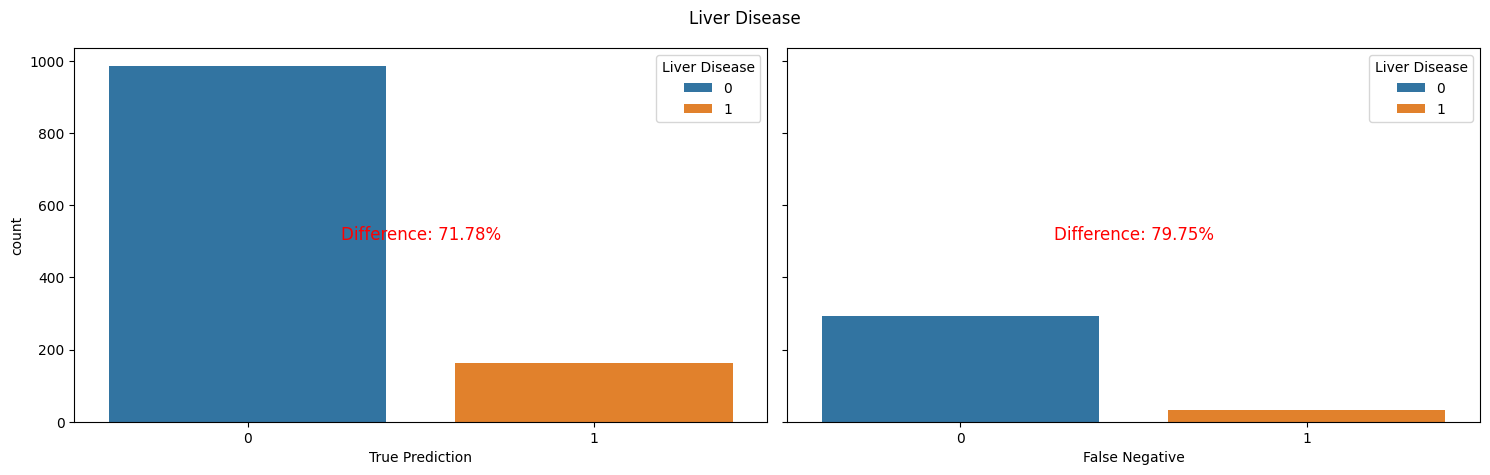

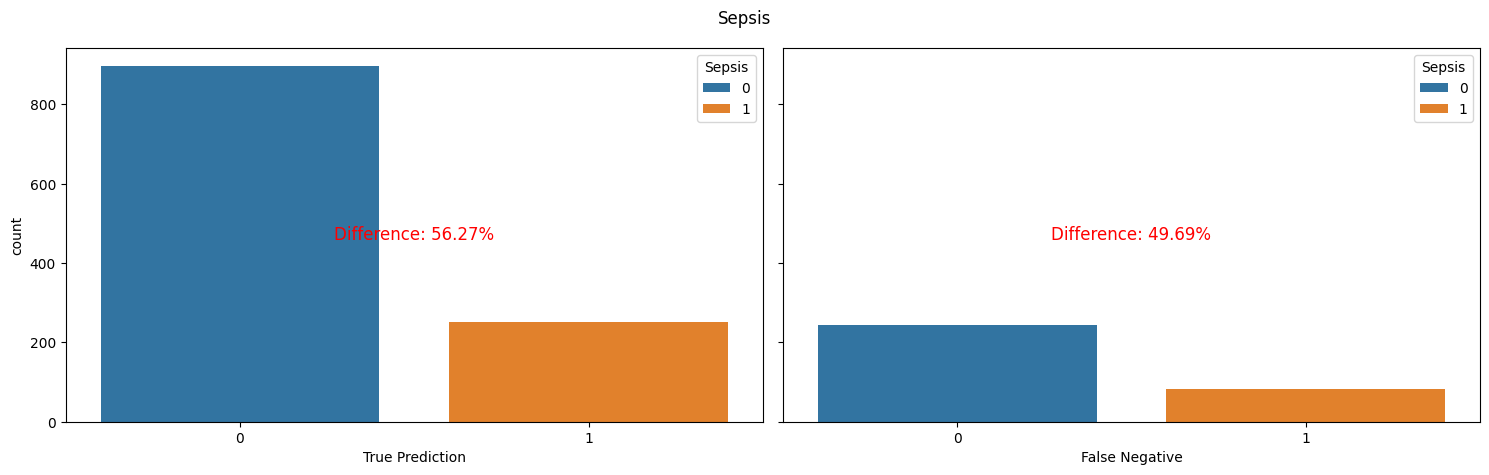

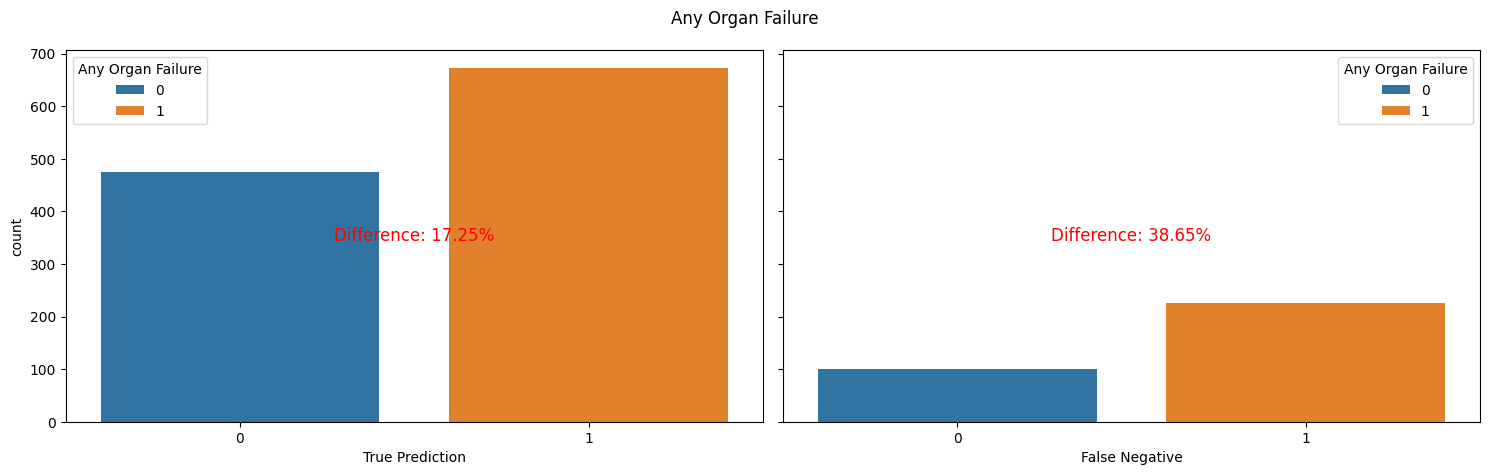

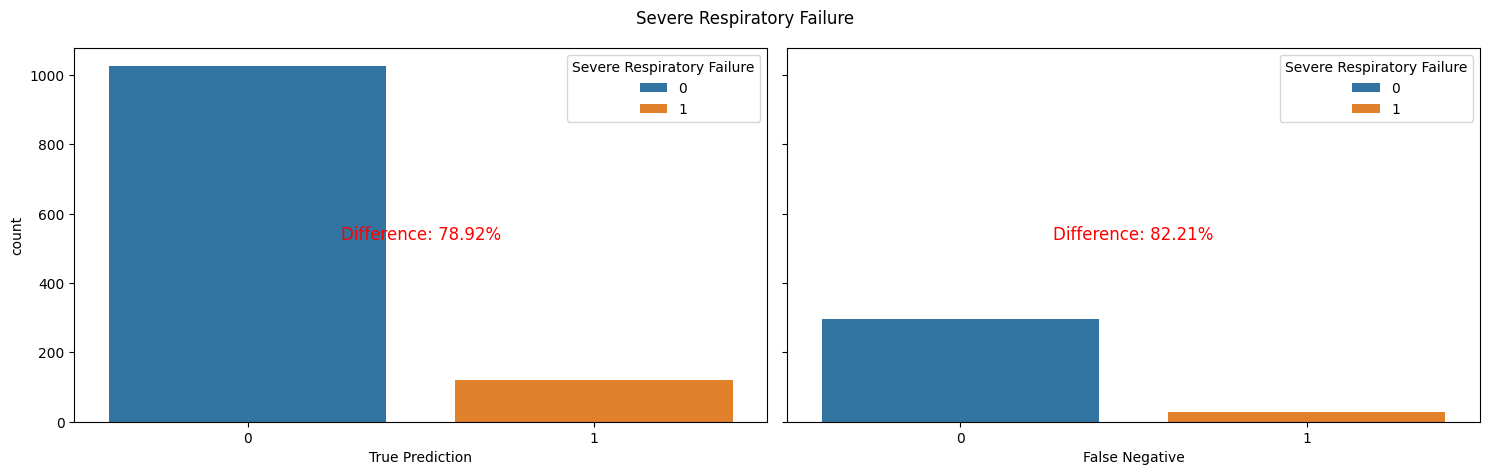

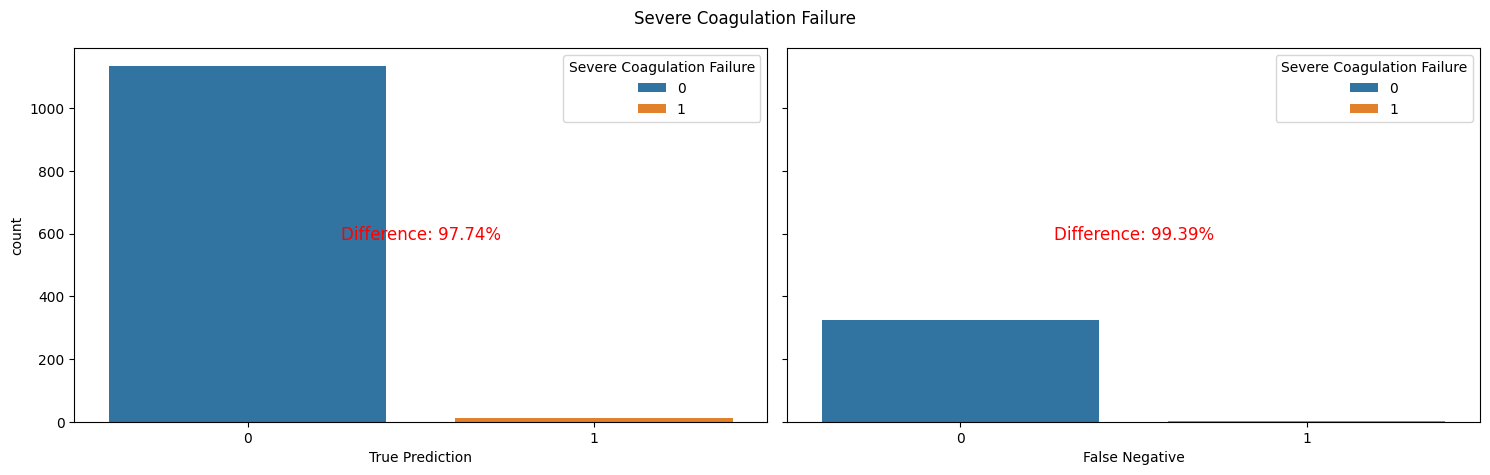

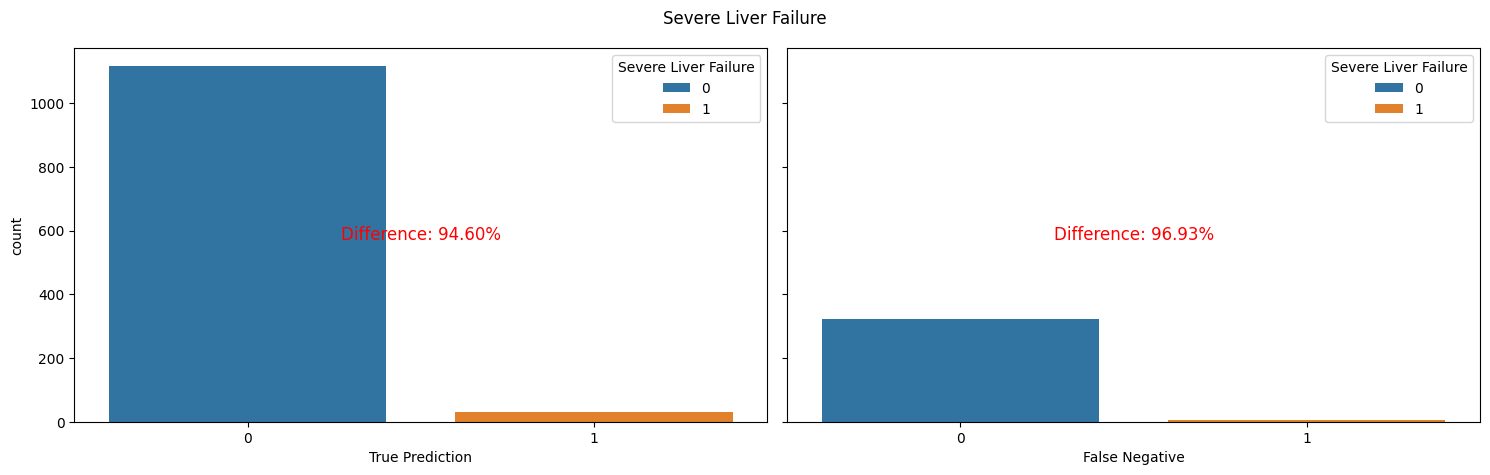

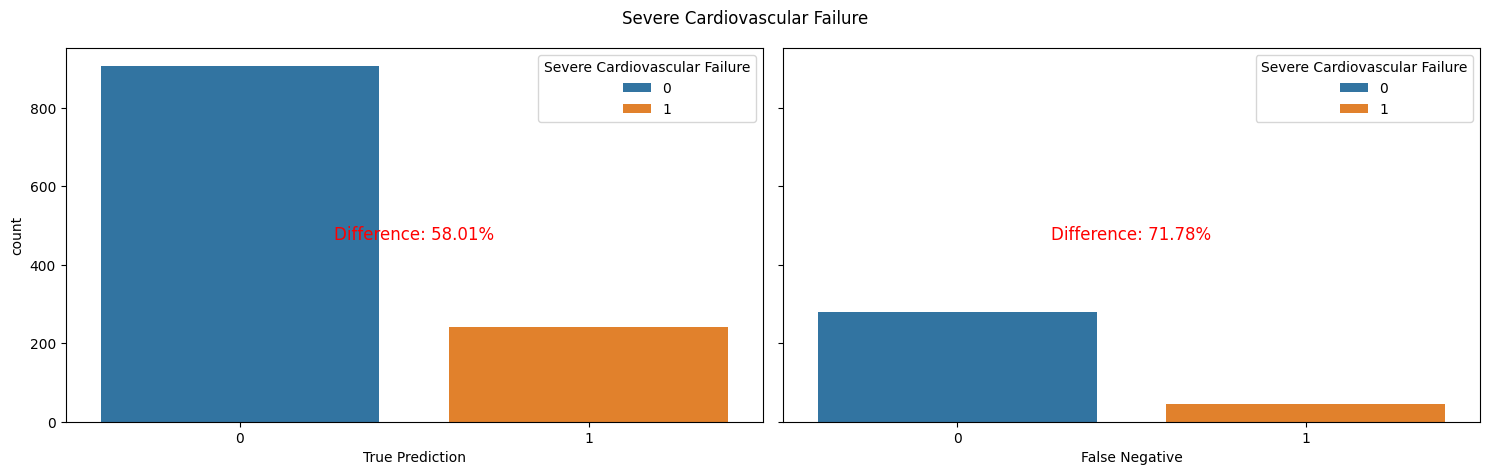

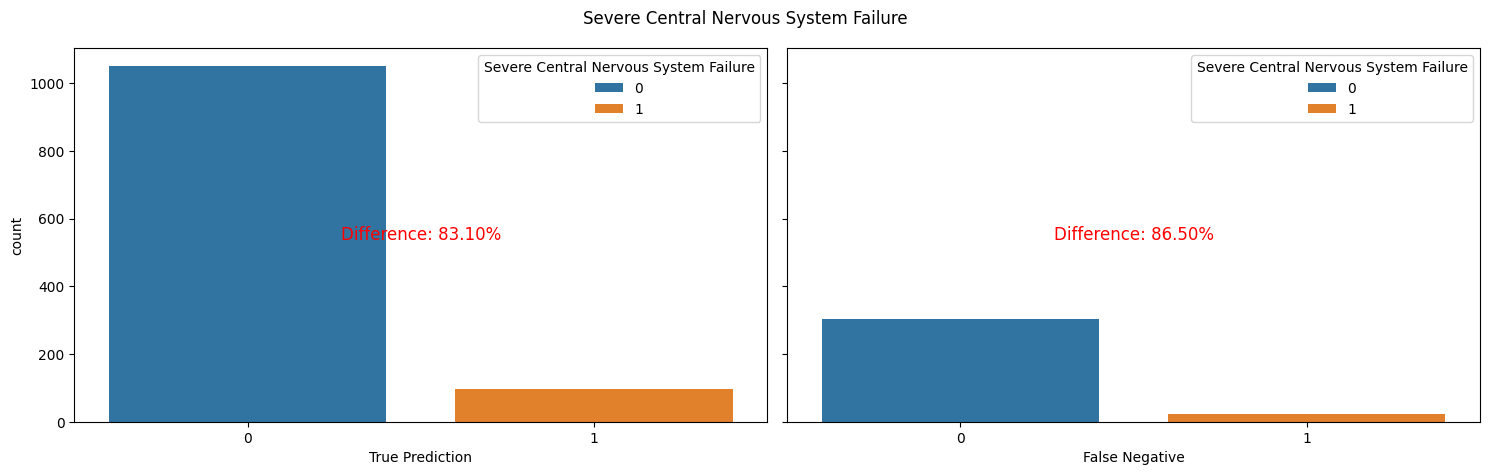

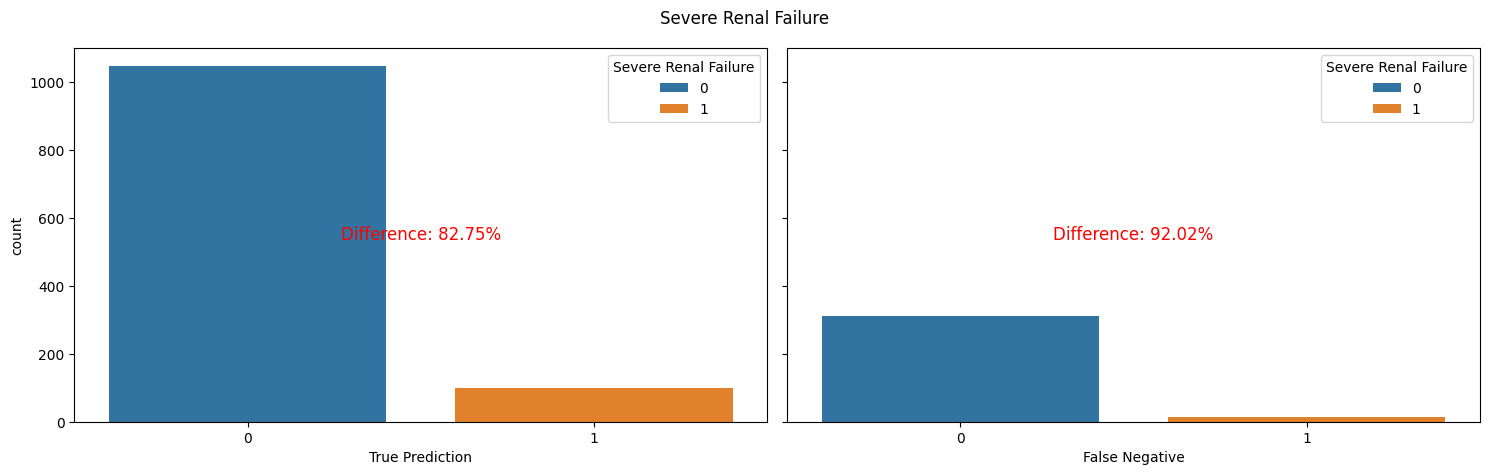

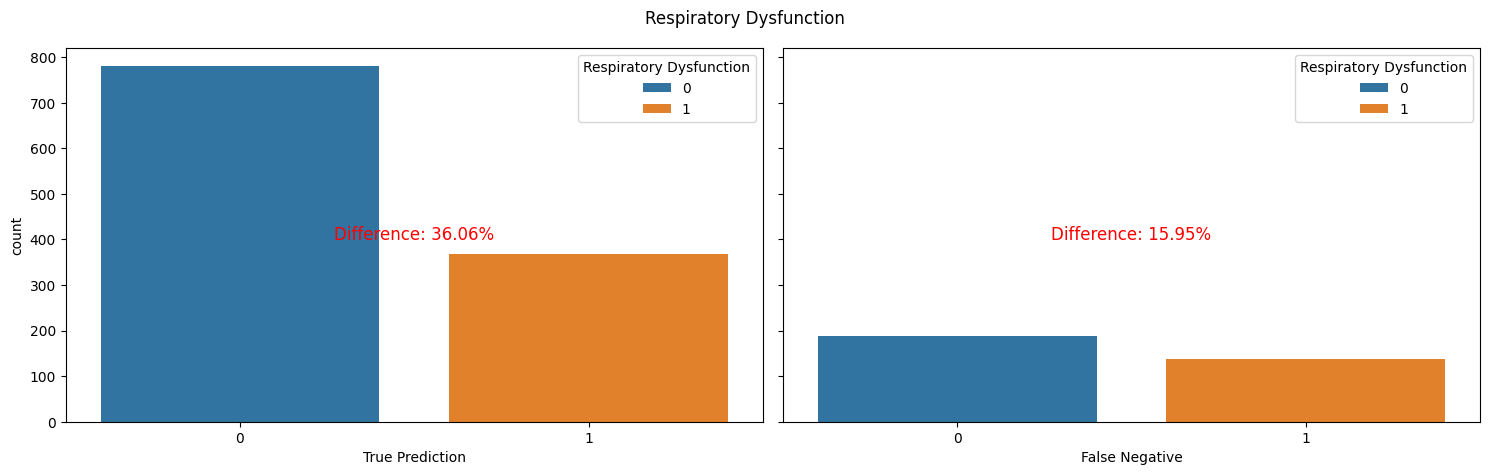

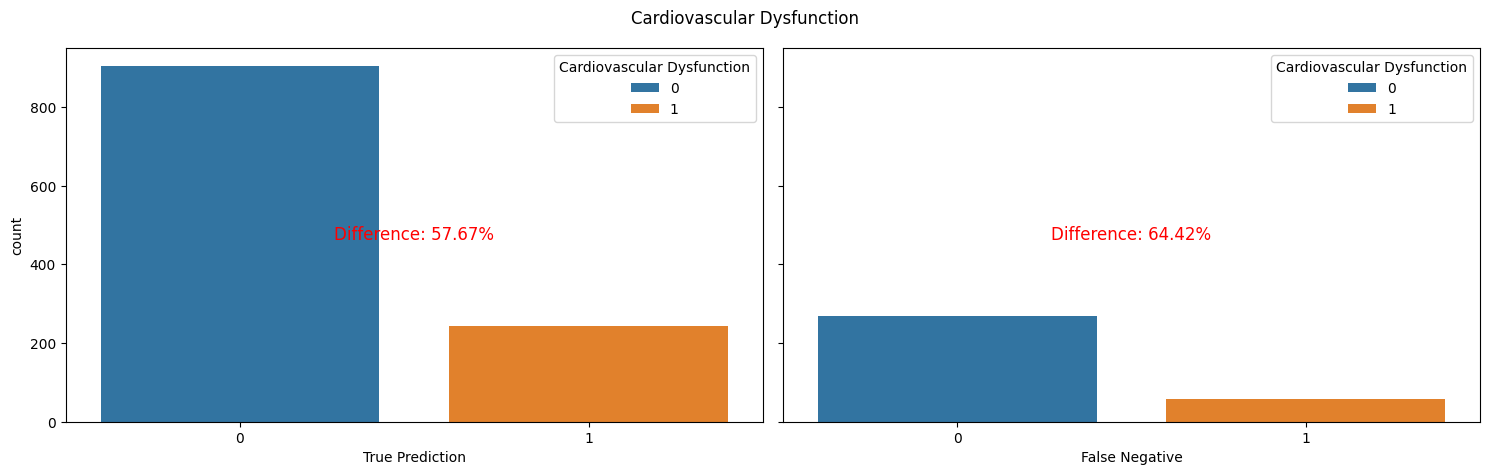

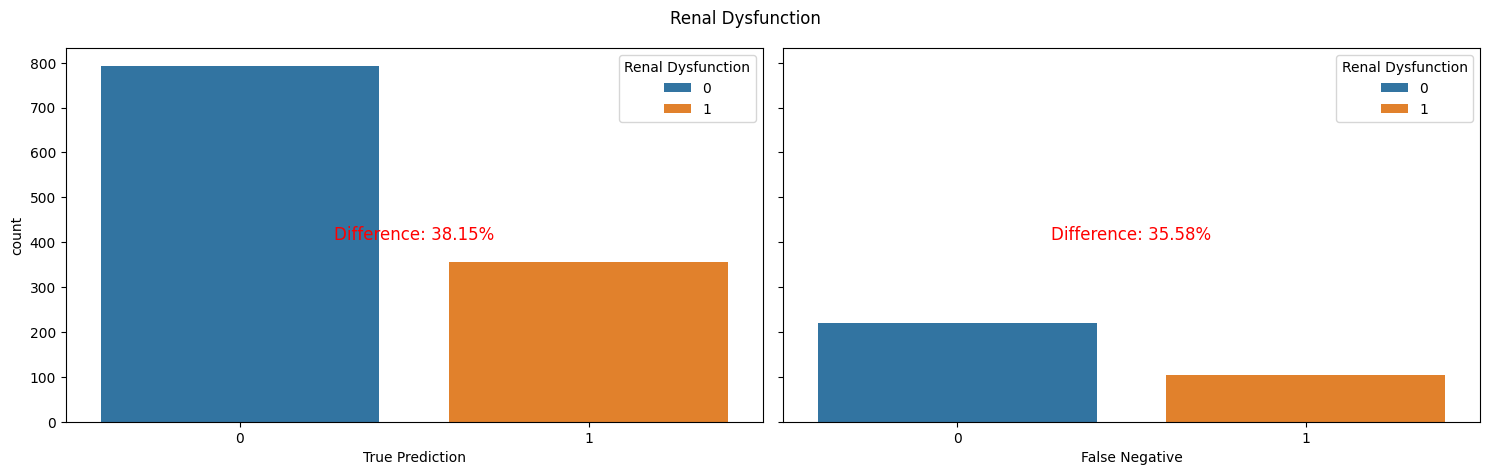

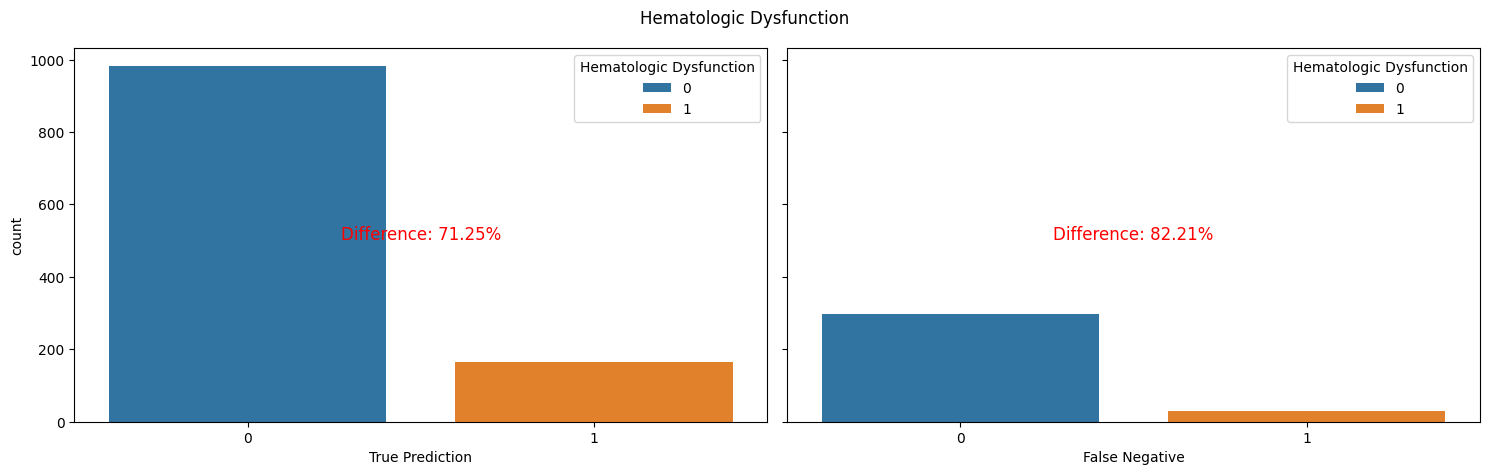

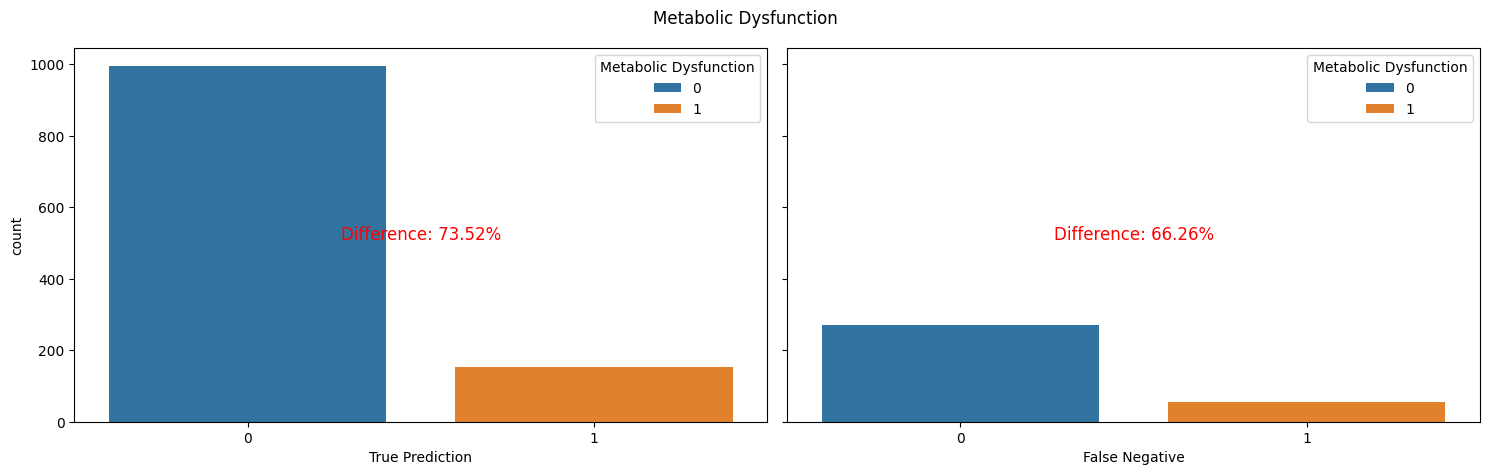

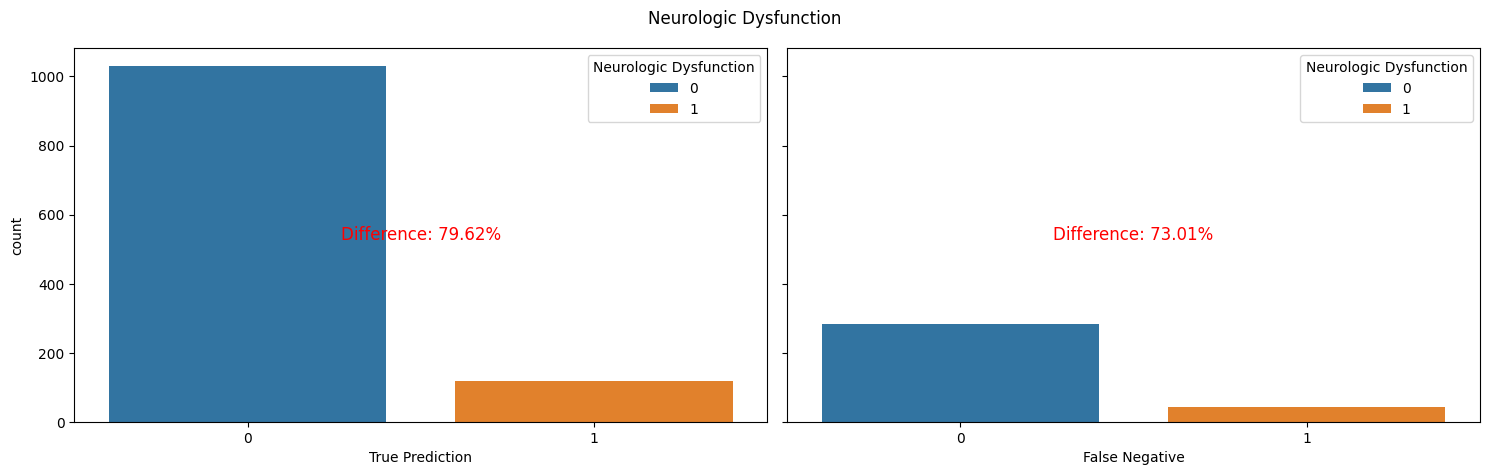

In [ ]:
cat_variables = ['Gender','Uncomplicated Hypertension', 'Complicated Hypertension', 'Uncomplicated Diabetes',
                 'Complicated Diabetes', 'Malignancy', 'Hematologic Disease',
                 'Metastasis', 'Peripheral Vascular Disease', 'Hypothyroidism',
                 'Chronic Heart Failure', 'Stroke', 'Liver Disease','Sepsis', 'Any Organ Failure',
                 'Severe Respiratory Failure',
                 'Severe Coagulation Failure', 'Severe Liver Failure',
                 'Severe Cardiovascular Failure','Severe Central Nervous System Failure', 'Severe Renal Failure',
                 'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
                 'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction', 'Neurologic Dysfunction']
df_concat = pd.concat([df_true_values, df_false_values], keys=['True Prediction', 'False Negative'], names=['Group'])

for category in cat_variables:
    fig, ax = plt.subplots(1, 2, sharey=True)
    #set the figure size
    fig.set_figwidth(15)

    sns.countplot(data = df_concat.loc['True Prediction'], x = category, hue = category, ax=ax[0])
    ax[0].set_xlabel('True Prediction')
    sns.countplot(data = df_concat.loc['False Negative'], x = category, hue = category, ax=ax[1])
    ax[1].set_xlabel('False Negative')

    # Calculate percentages
    true_pos_count_0 = df_concat[df_concat[category] == 0].loc['True Prediction'].shape[0]
    true_pos_count_1 = df_concat[df_concat[category] == 1].loc['True Prediction'].shape[0]
    true_pos_total = df_concat.loc['True Prediction'].shape[0]

    true_pos_percentage = (abs(true_pos_count_0 - true_pos_count_1) / true_pos_total) * 100

    flase_pos_count_0 = df_concat[df_concat[category] == 0].loc['False Negative'].shape[0]
    flase_pos_count_1 = df_concat[df_concat[category] == 1].loc['False Negative'].shape[0]
    flase_pos_total = df_concat.loc['False Negative'].shape[0]

    flase_pos_percentage = (abs(flase_pos_count_0 - flase_pos_count_1) / flase_pos_total) * 100

    # Annotate the plot with the percentage difference
    ax[0].text(0.5, 0.5, f'Difference: {true_pos_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes, fontsize=12, color='red')
    ax[1].text(0.5, 0.5, f'Difference: {flase_pos_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes, fontsize=12, color='red')

    plt.suptitle(category)

    plt.tight_layout()

# Bar Plot Categorical Variables

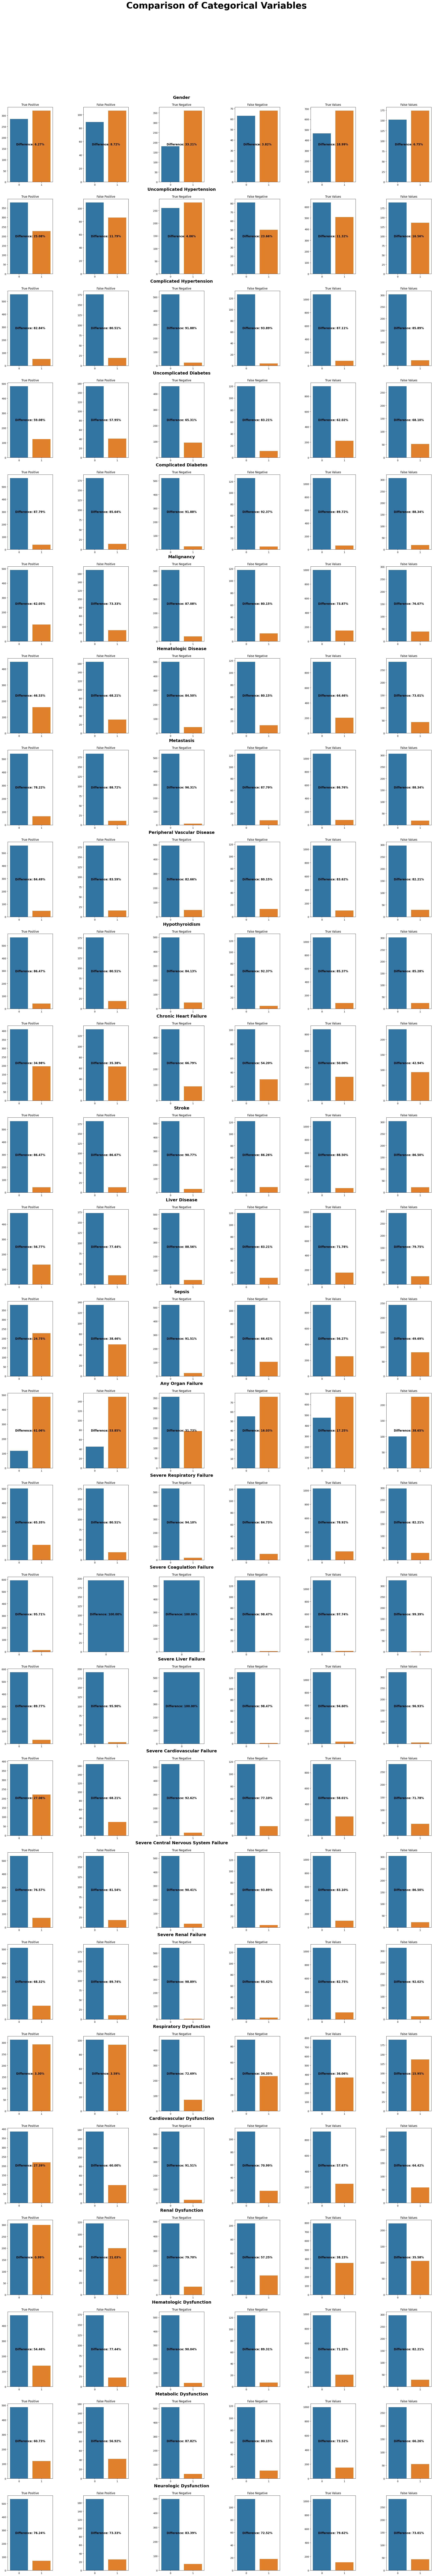

In [ ]:
cat_variables = ['Gender', 'Uncomplicated Hypertension', 'Complicated Hypertension', 'Uncomplicated Diabetes',
                 'Complicated Diabetes', 'Malignancy', 'Hematologic Disease',
                 'Metastasis', 'Peripheral Vascular Disease', 'Hypothyroidism',
                 'Chronic Heart Failure', 'Stroke', 'Liver Disease', 'Sepsis', 'Any Organ Failure',
                 'Severe Respiratory Failure',
                 'Severe Coagulation Failure', 'Severe Liver Failure',
                 'Severe Cardiovascular Failure', 'Severe Central Nervous System Failure', 'Severe Renal Failure',
                 'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
                 'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction', 'Neurologic Dysfunction']

# Concatenate all dataframes
df_concat = pd.concat([df_true_pos, df_false_pos, df_true_neg, df_false_neg, df_true_values, df_false_values],
                      keys=['True Positive', 'False Positive', 'True Negative', 'False Negative', 'True Values', 'False Values'],
                      names=['Group'])

fig, axes = plt.subplots(len(cat_variables), 6, figsize=(26, 6 * len(cat_variables)))
fig.suptitle('Comparison of Categorical Variables', fontsize=38, fontweight='bold')

for i, category in enumerate(cat_variables):
    axes[i, 2].text(0.5, 1.1, category, ha='center', va='bottom', transform=axes[i, 2].transAxes, fontsize=18, fontweight='bold')

    # True Positive
    sns.countplot(data=df_concat.loc['True Positive'], x=category, hue=category, ax=axes[i, 0])
    axes[i, 0].set_title('True Positive')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    axes[i, 0].legend().remove()

    # False Positive
    sns.countplot(data=df_concat.loc['False Positive'], x=category, hue=category, ax=axes[i, 1])
    axes[i, 1].set_title('False Positive')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')
    axes[i, 1].legend().remove()

    # True Negative
    sns.countplot(data=df_concat.loc['True Negative'], x=category, hue=category, ax=axes[i, 2])
    axes[i, 2].set_title('True Negative')
    axes[i, 2].set_xlabel('')
    axes[i, 2].set_ylabel('')
    axes[i, 2].legend().remove()

    # False Negative
    sns.countplot(data=df_concat.loc['False Negative'], x=category, hue=category, ax=axes[i, 3])
    axes[i, 3].set_title('False Negative')
    axes[i, 3].set_xlabel('')
    axes[i, 3].set_ylabel('')
    axes[i, 3].legend().remove()

    # True Values
    sns.countplot(data=df_concat.loc['True Values'], x=category, hue=category, ax=axes[i, 4])
    axes[i, 4].set_title('True Values')
    axes[i, 4].set_xlabel('')
    axes[i, 4].set_ylabel('')
    axes[i, 4].legend().remove()

    # False Values
    sns.countplot(data=df_concat.loc['False Values'], x=category, hue=category, ax=axes[i, 5])
    axes[i, 5].set_title('False Values')
    axes[i, 5].set_xlabel('')
    axes[i, 5].set_ylabel('')
    axes[i, 5].legend().remove()

    # Calculate percentage difference for each group
    for j, group in enumerate(['True Positive', 'False Positive', 'True Negative', 'False Negative', 'True Values', 'False Values']):
        try:
            count_0 = df_concat[df_concat[category] == 0].loc[group].shape[0]
            count_1 = df_concat[df_concat[category] == 1].loc[group].shape[0]
            total = df_concat.loc[group].shape[0]
            percentage = (abs(count_0 - count_1) / total) * 100
        except KeyError:
            percentage = 100  # Assign a default value if KeyError occurs

        axes[i, j].text(0.5, 0.5, f'Difference: {percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=axes[i, j].transAxes, fontsize=12, color='black', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()